In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline
import matplotlib.pyplot as pl
pl.ion()
import numpy as np
import sys
sys.path.append('../')

import os
import copy
from qiskit import *
from qiskit_utilities.utilities import *

from qiskit.visualization import plot_histogram

from newbeginning import *

In [2]:
backend = Aer.get_backend('statevector_simulator')

In [3]:
# from qiskit.providers.aer import StatevectorSimulator
# backend = StatevectorSimulator(device="gpu")

In [4]:
# FR = np.array([[1, 0],
#               [0, 1]])
# CR=np.array([1,1])

# # Normalize weights
# CR = CR/np.max(CR)

In [5]:
FR = np.array([[1, 1],
              [1, 1]])
CR=np.array([1,10])

# Normalize weights
CR = CR/np.max(CR)

In [6]:
# FR = np.array([[1, 0,1, 0],
#               [0, 1,1, 0],
#               [0, 0,0, 1]])
# # CR=np.array([1,1,2.125,1])
# CR=np.random.rand(4)

# # Normalize weights
# CR = CR/np.max(CR)

In [7]:
# from data.tailassignment_loader import *
# FR,CR = npy_loader(f'../data//tailassignment_samples/npy_samples/FRCR_6_24_3_1.npy')

# # Normalize weights
# CR = CR/np.max(CR)

In [8]:
# F, R  = np.shape(FR)

In [9]:
CR

array([0.1, 1. ])

In [10]:
# c=cost_vector(CR,FR,1,plotsolutions=True)

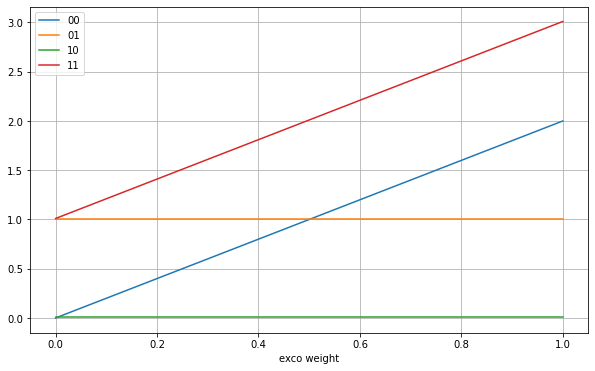

In [15]:
x, e, es, ue, lab = getSpectrum(CR, FR,mumax=1)

pl.figure(figsize=(10,6))
for key in ue:
    pl.plot(x,ue[key],label=lab[key])
pl.xlabel("exco weight")
pl.legend()
pl.grid()

# pl.figure(figsize=(10,6))
# for i in range(e.shape[0]):
#     pl.plot(x,es[i,:])
# pl.xlabel("exco weight")
# pl.grid()

mu= 0.1
Optimization terminated successfully.
         Current function value: 0.163201
         Iterations: 11
         Function evaluations: 23
mu= 0.2
Optimization terminated successfully.
         Current function value: 0.288940
         Iterations: 12
         Function evaluations: 24
mu= 1
Optimization terminated successfully.
         Current function value: 0.532567
         Iterations: 11
         Function evaluations: 23
mu= 10
Optimization terminated successfully.
         Current function value: 0.552850
         Iterations: 15
         Function evaluations: 27


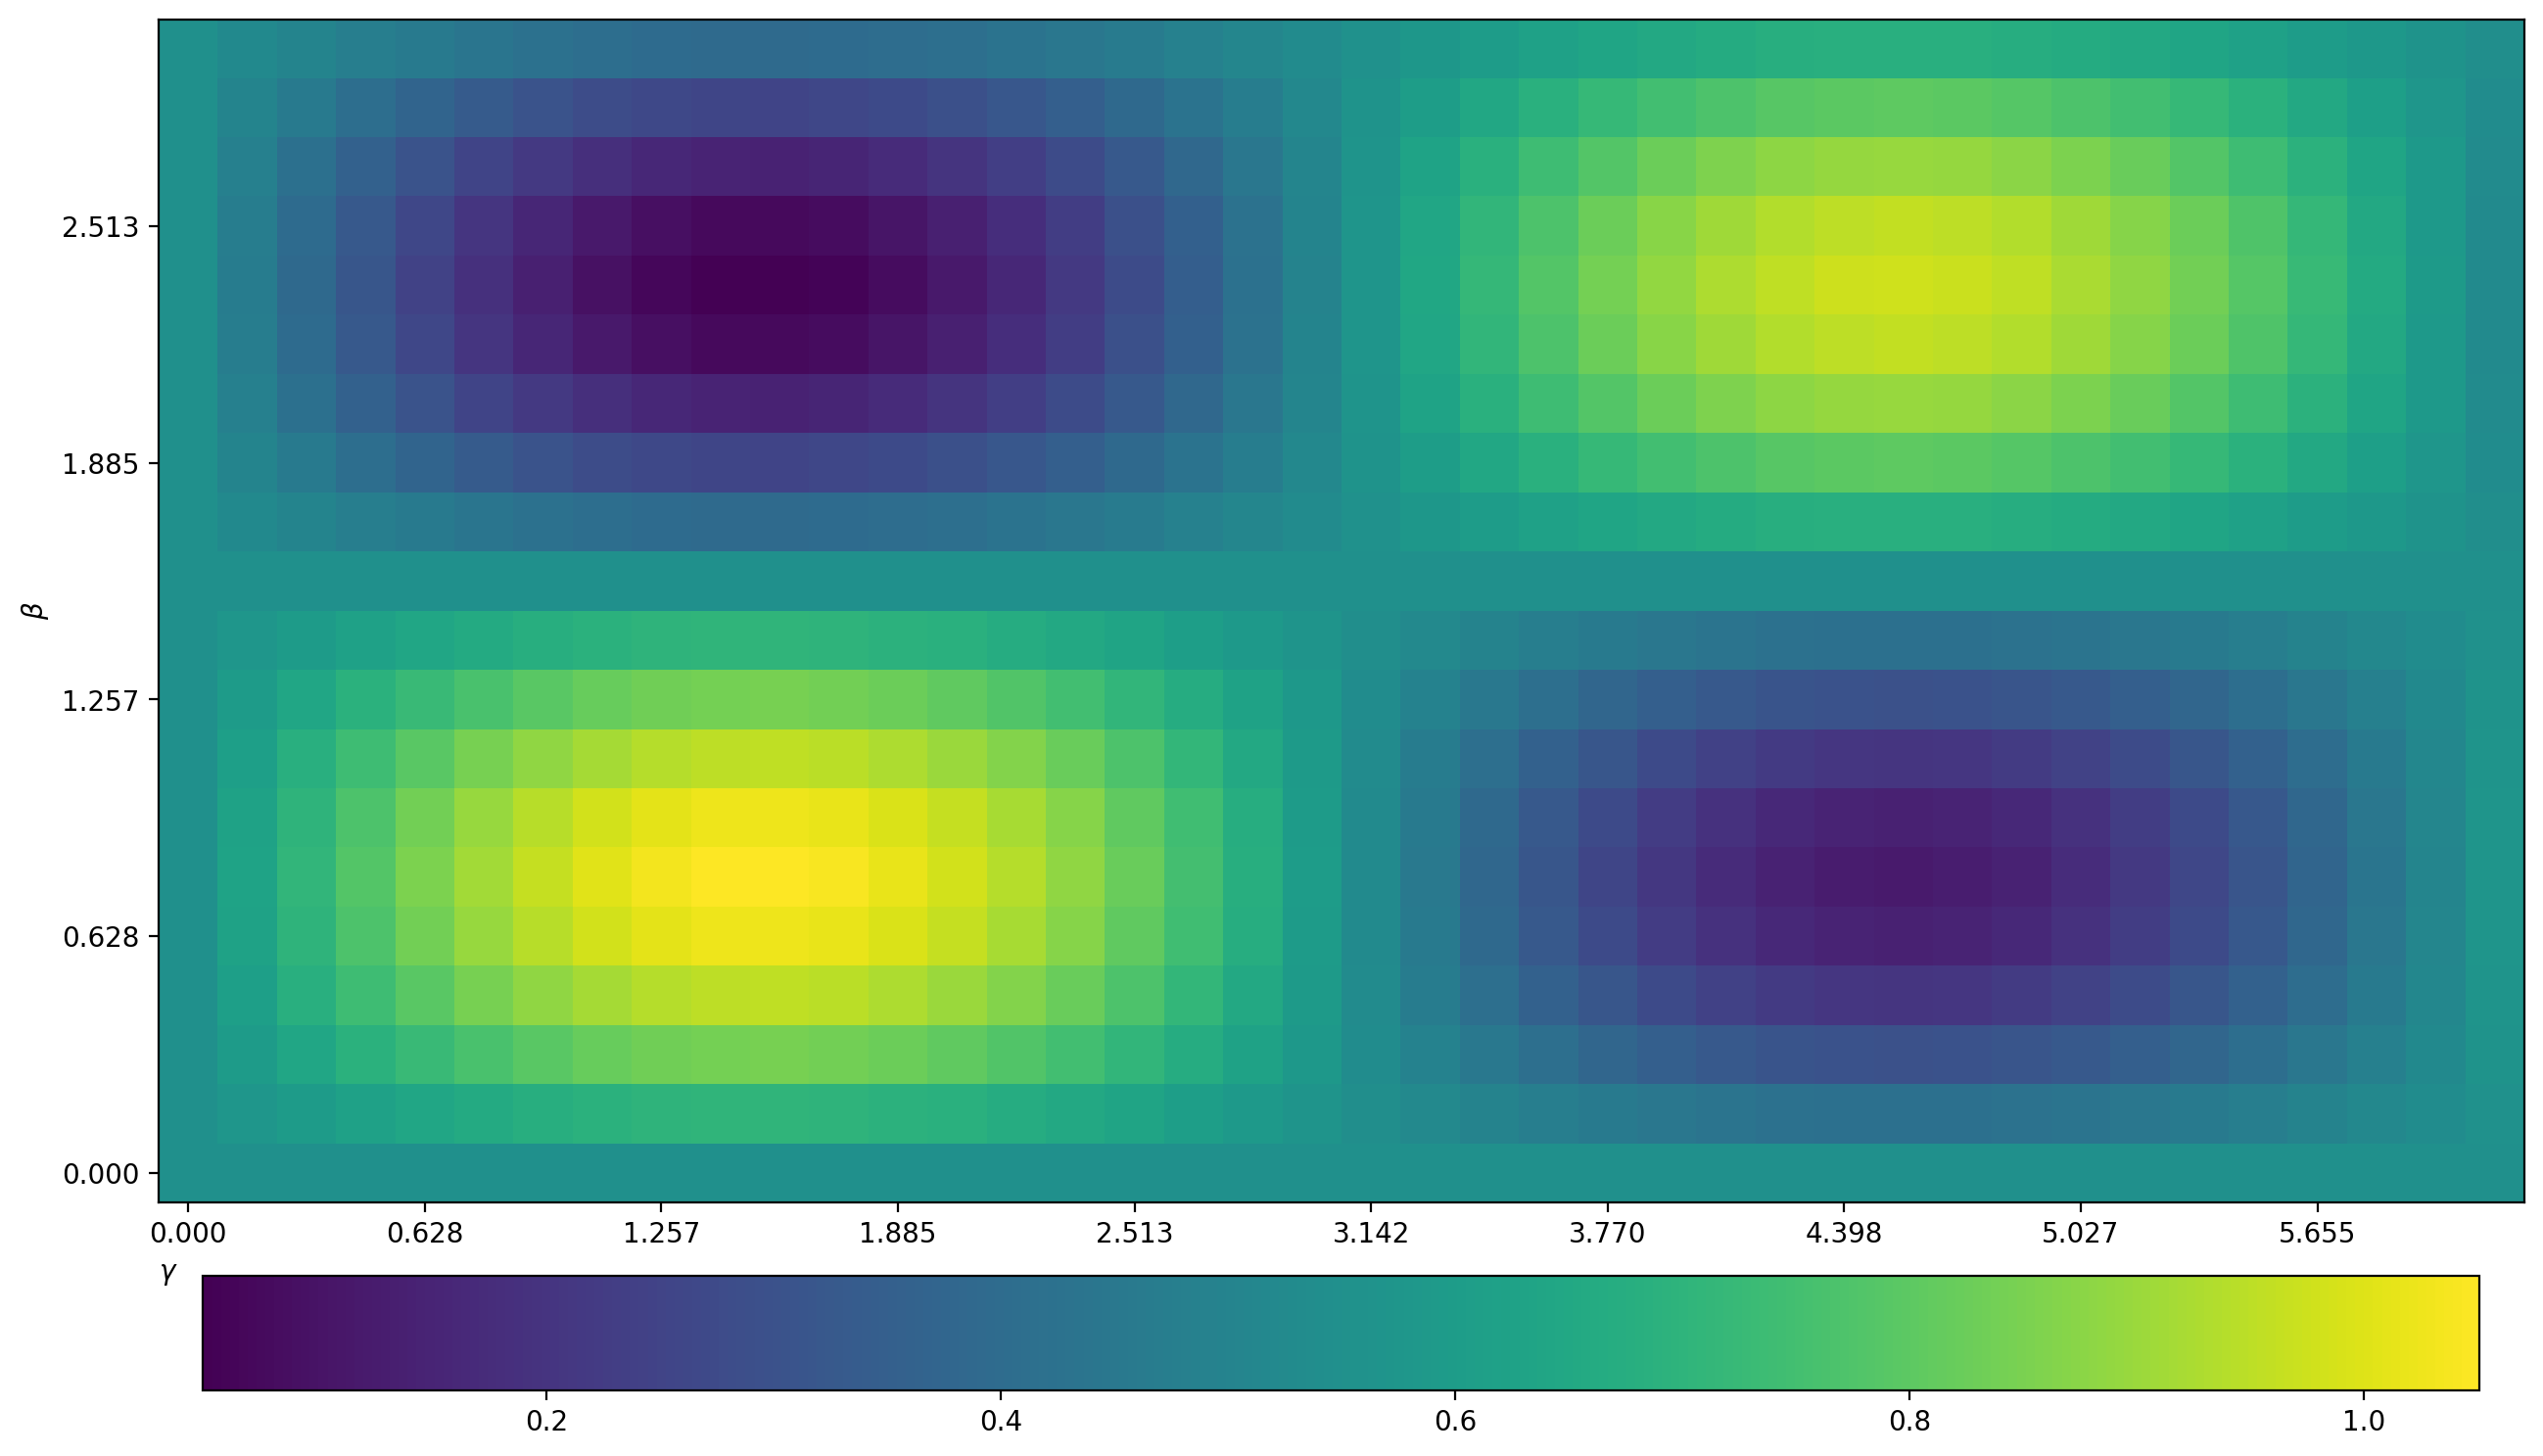

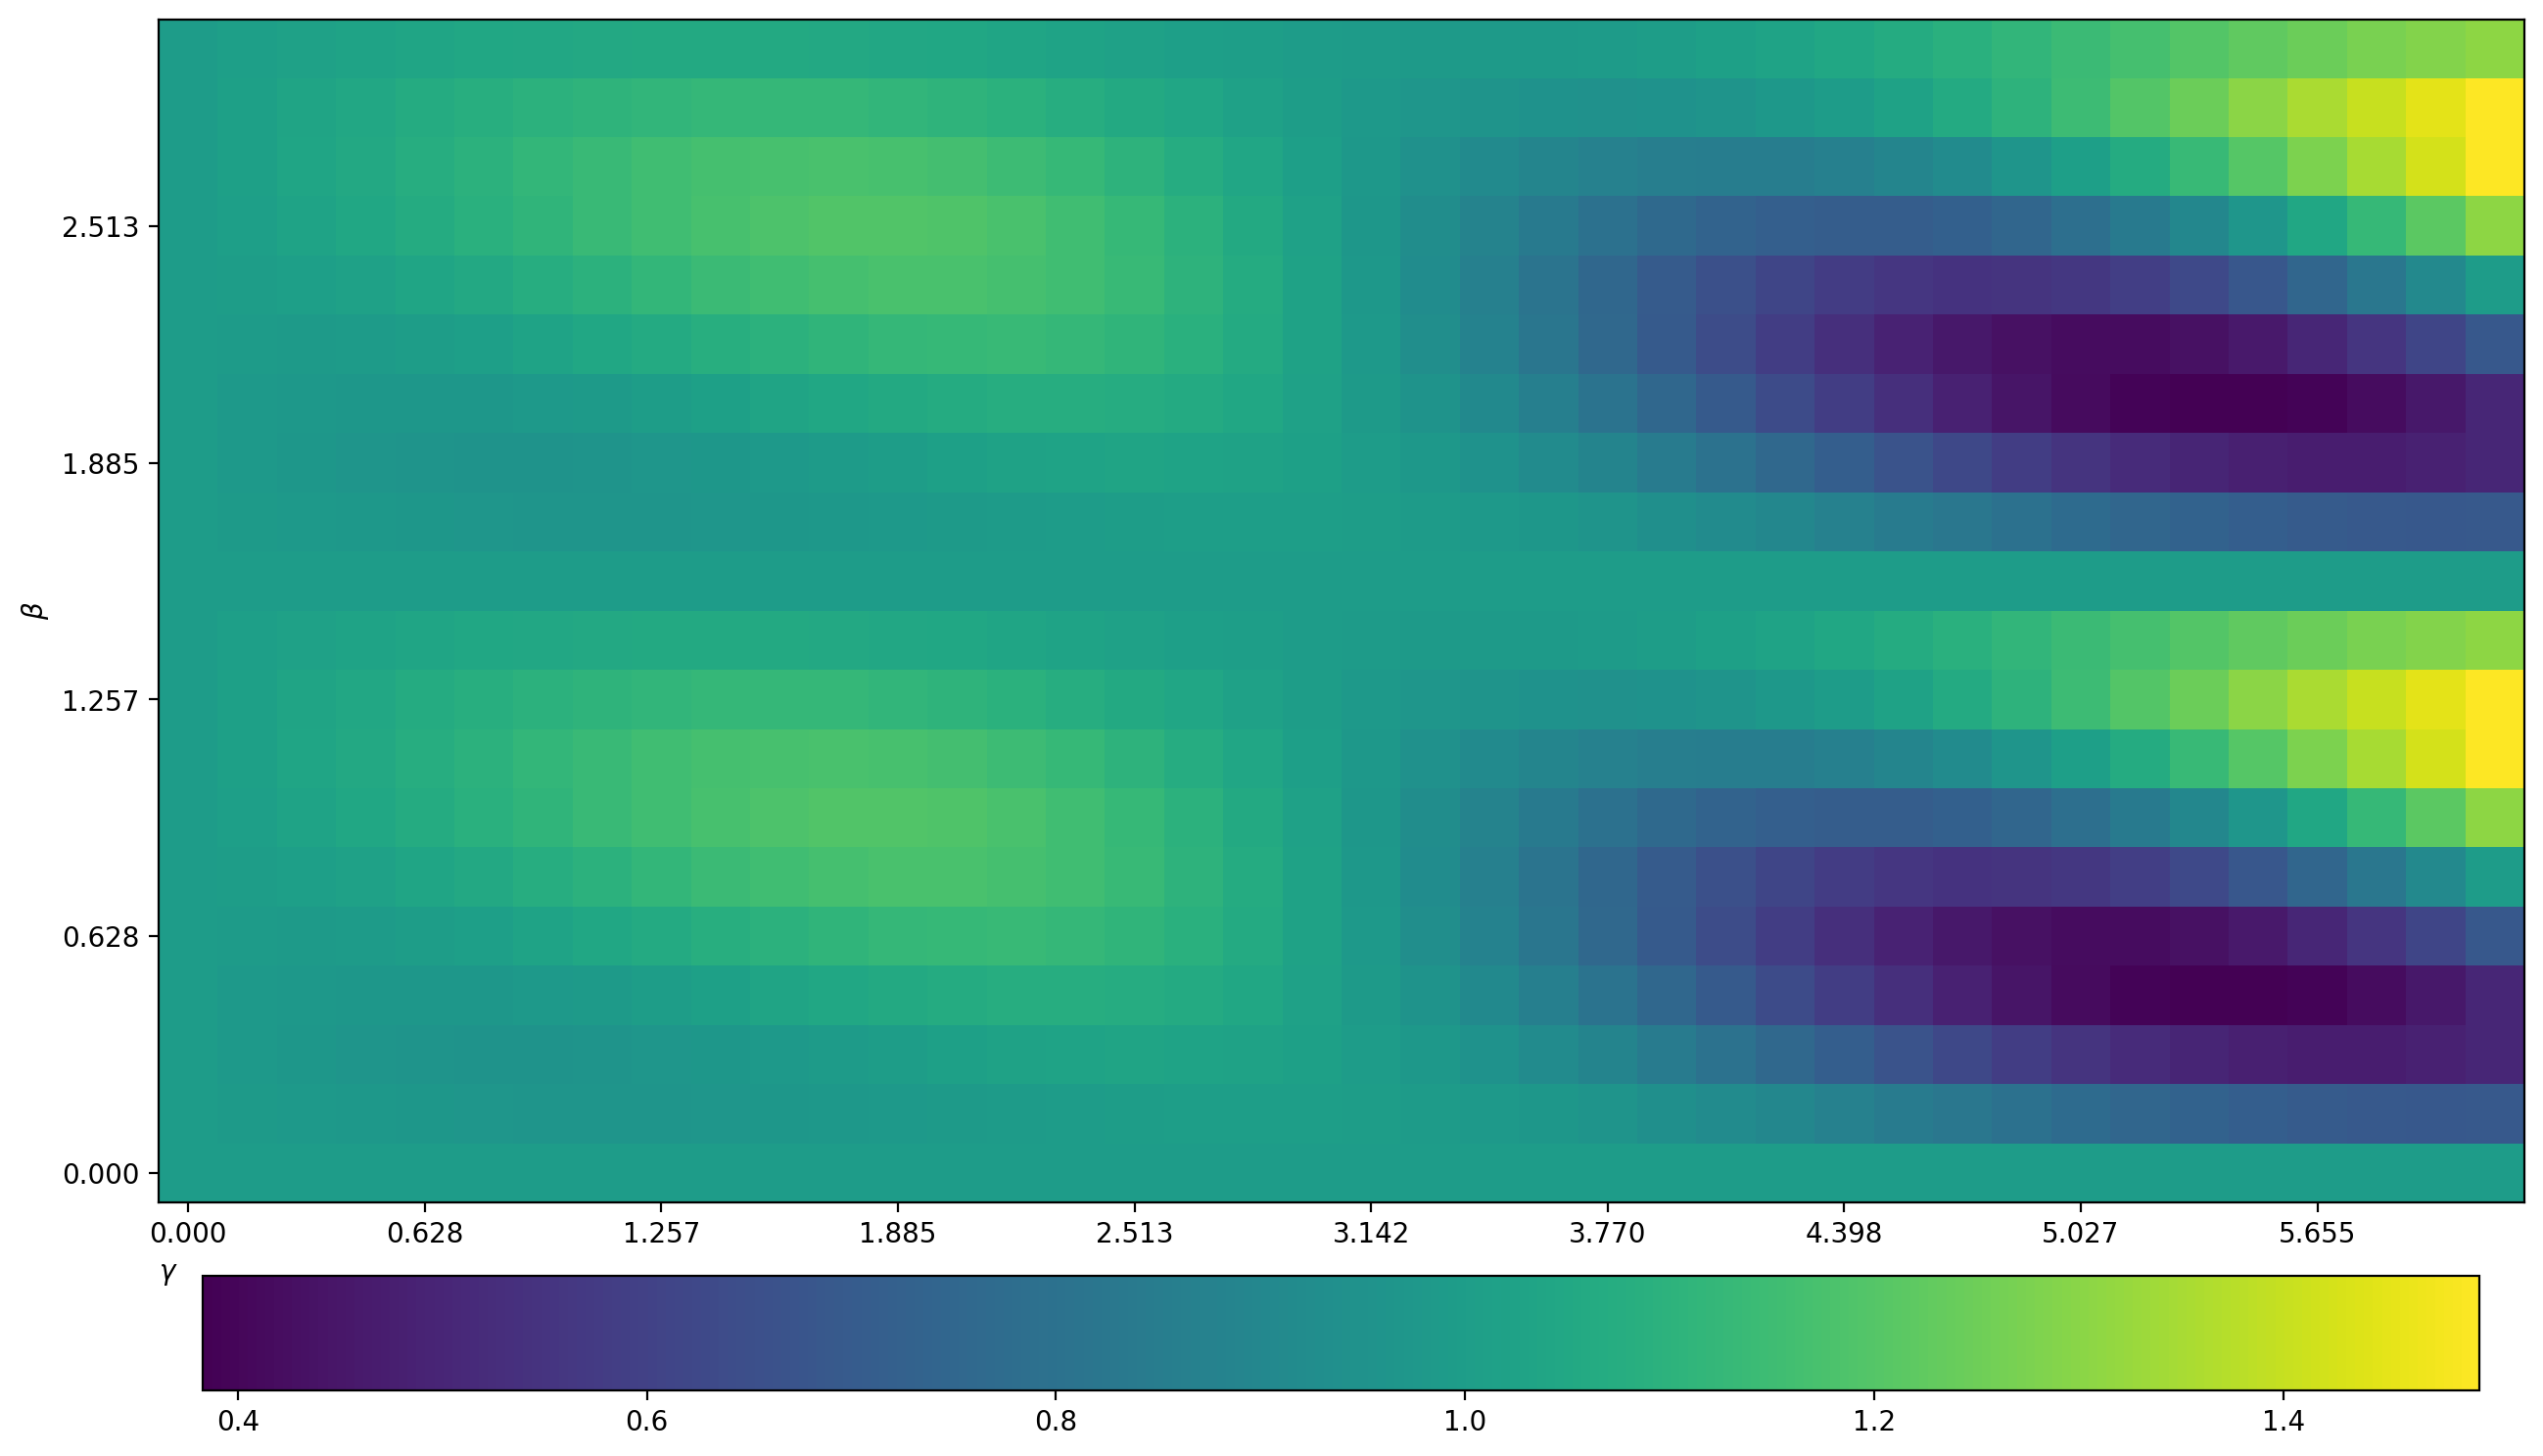

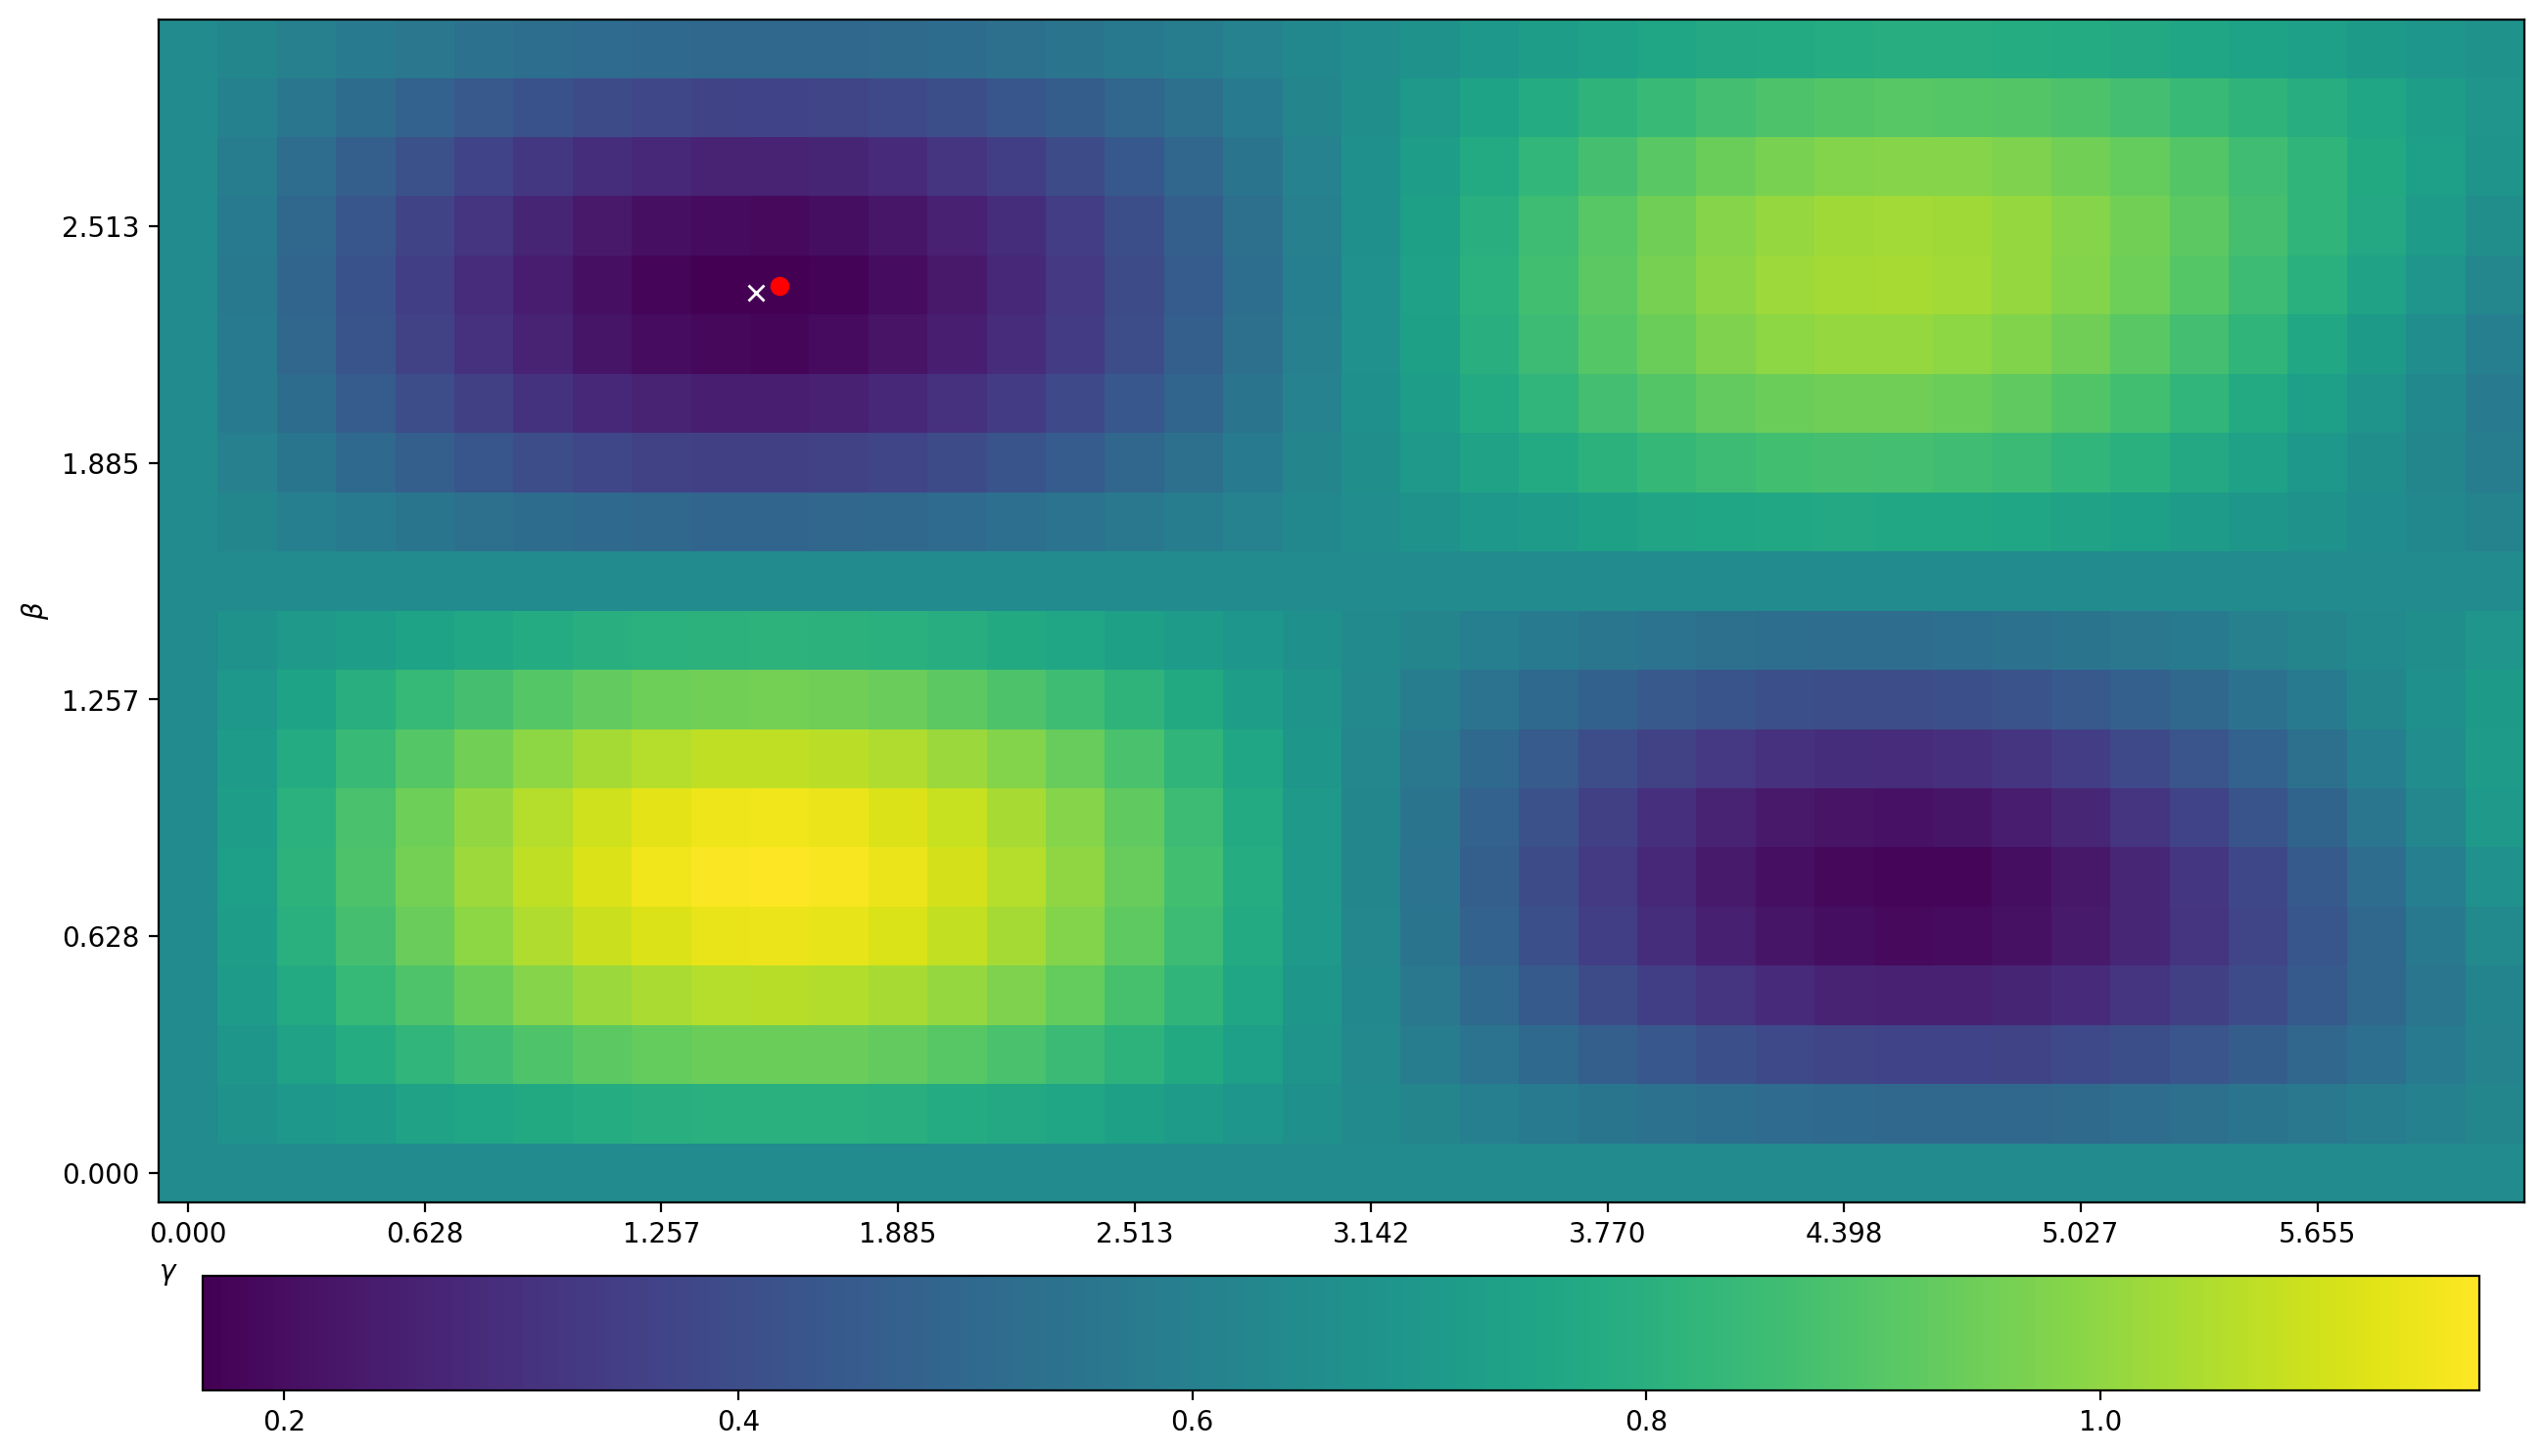

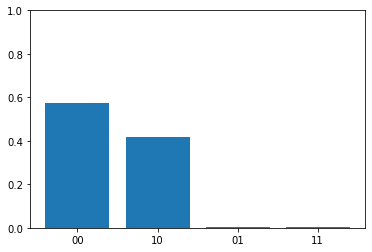

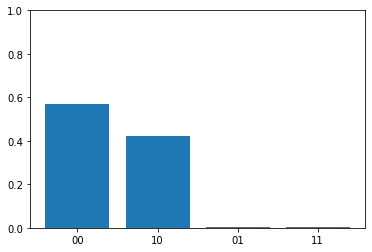

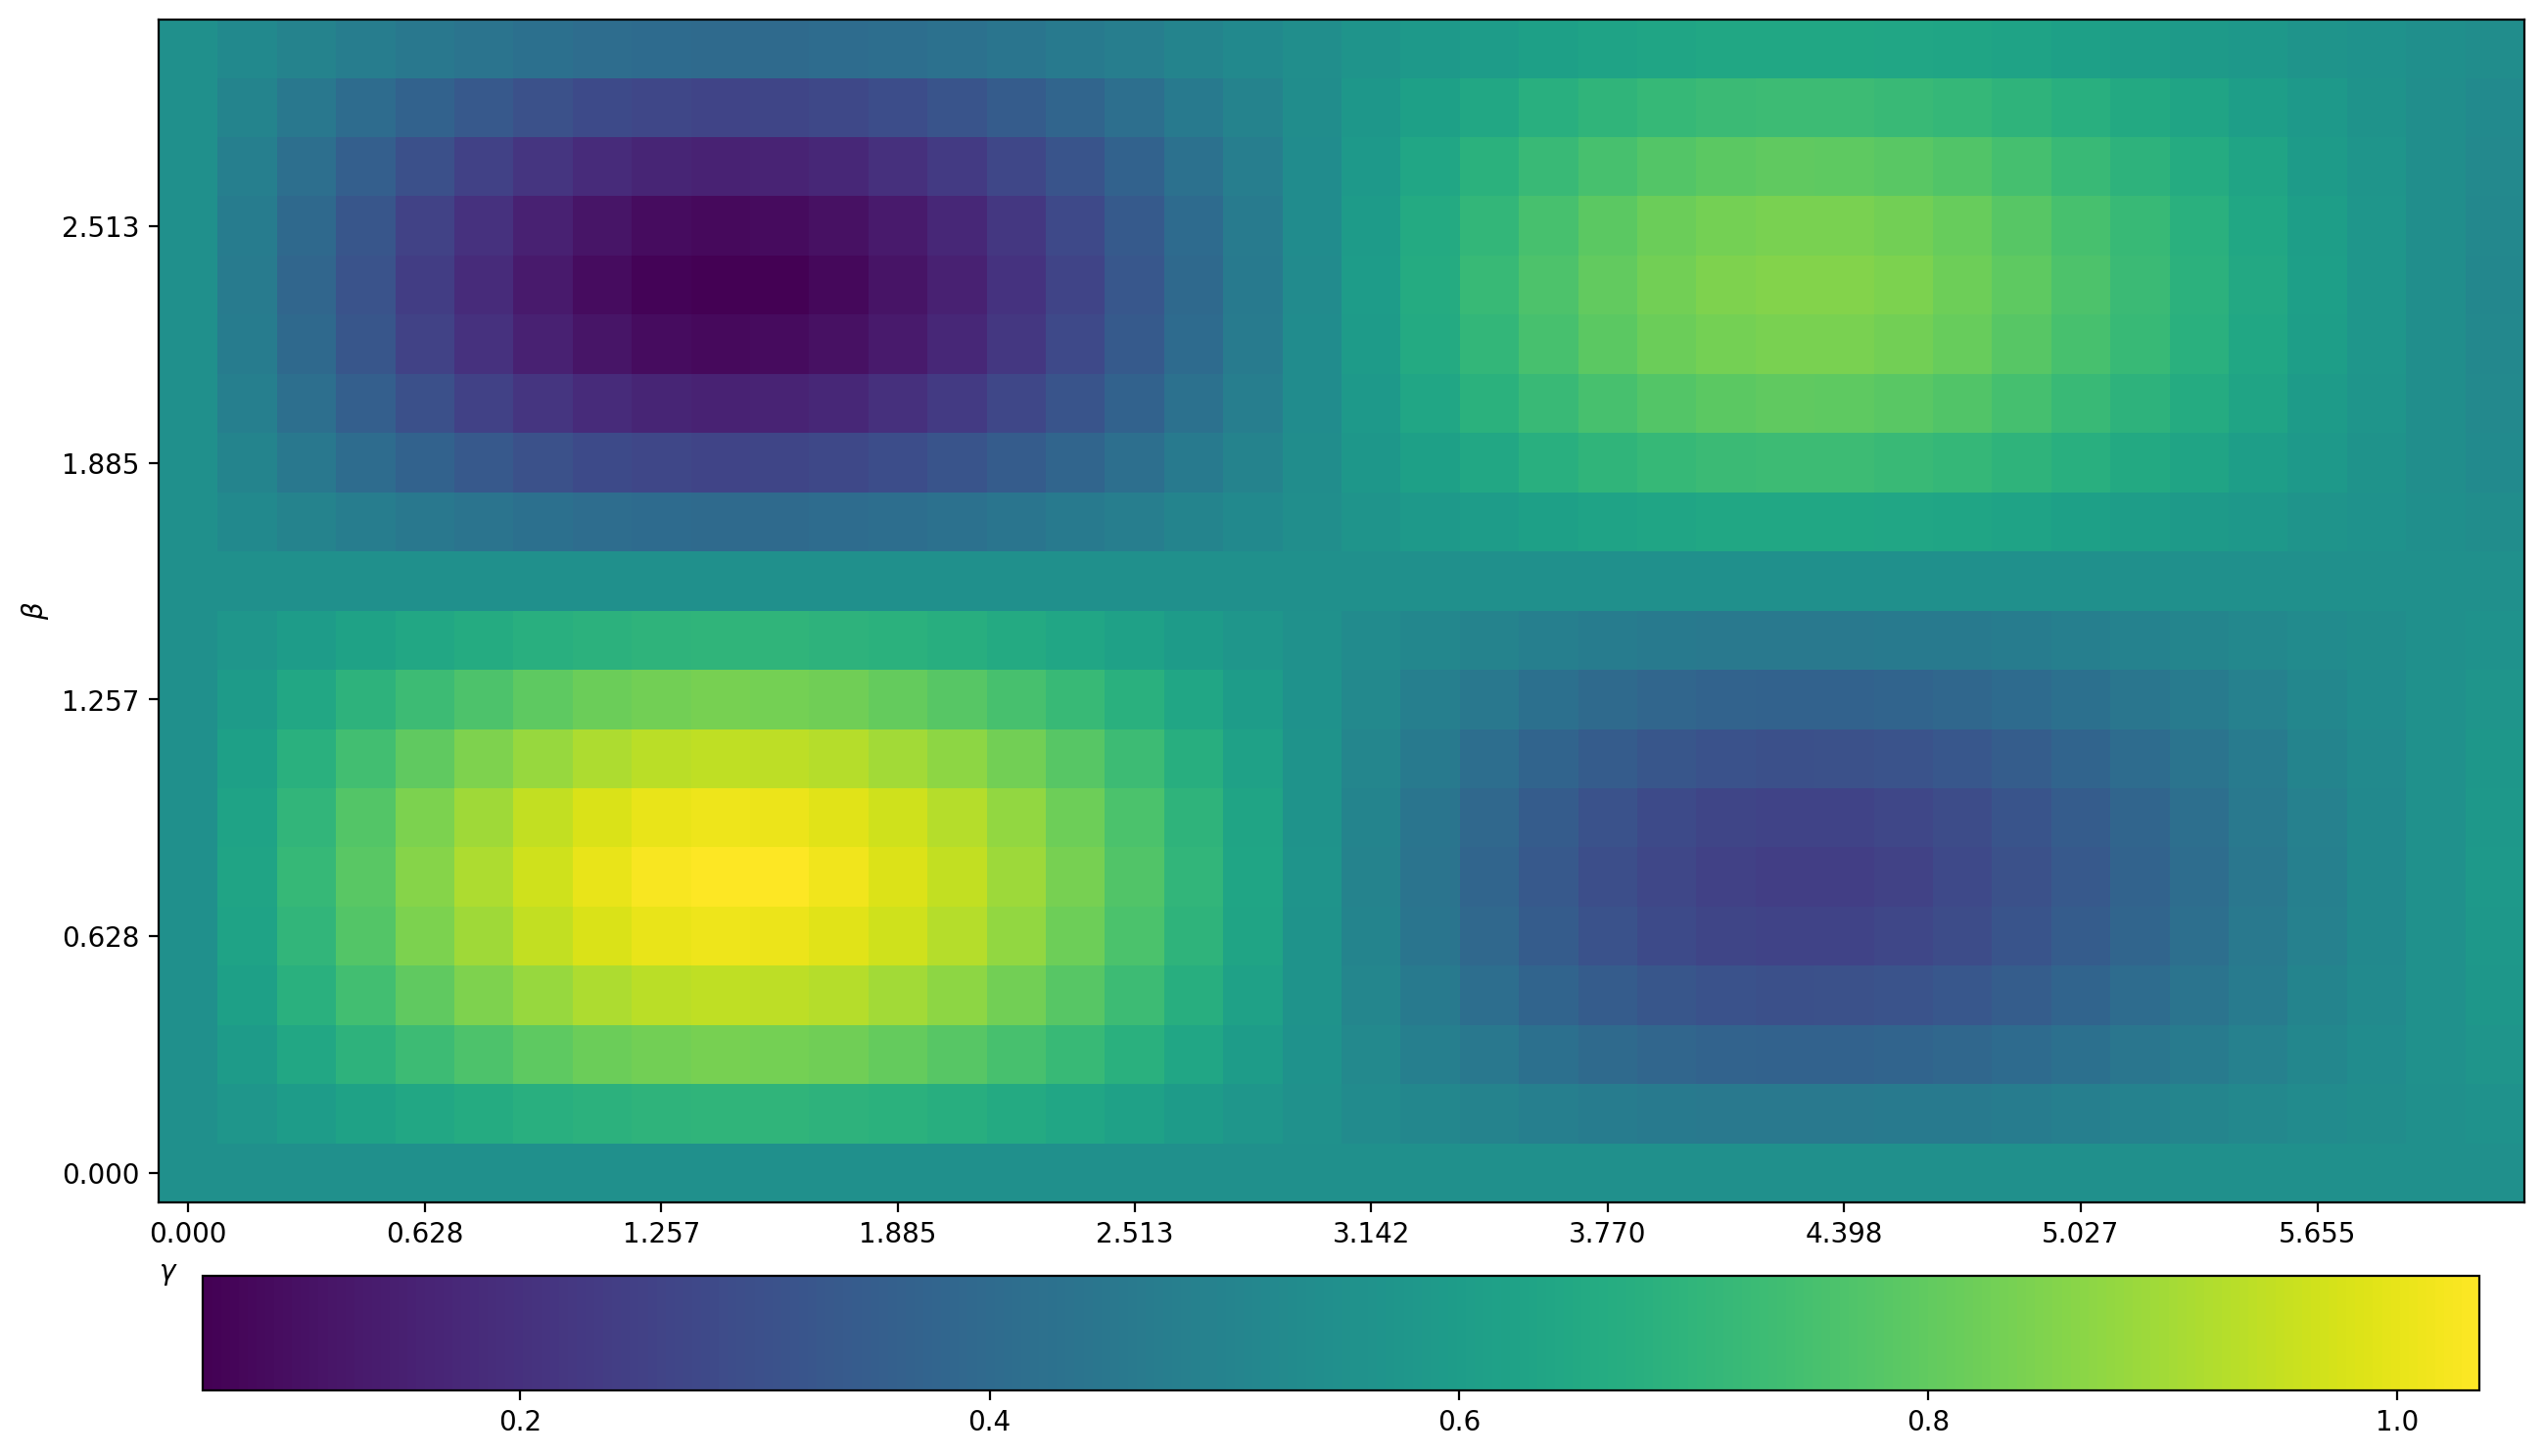

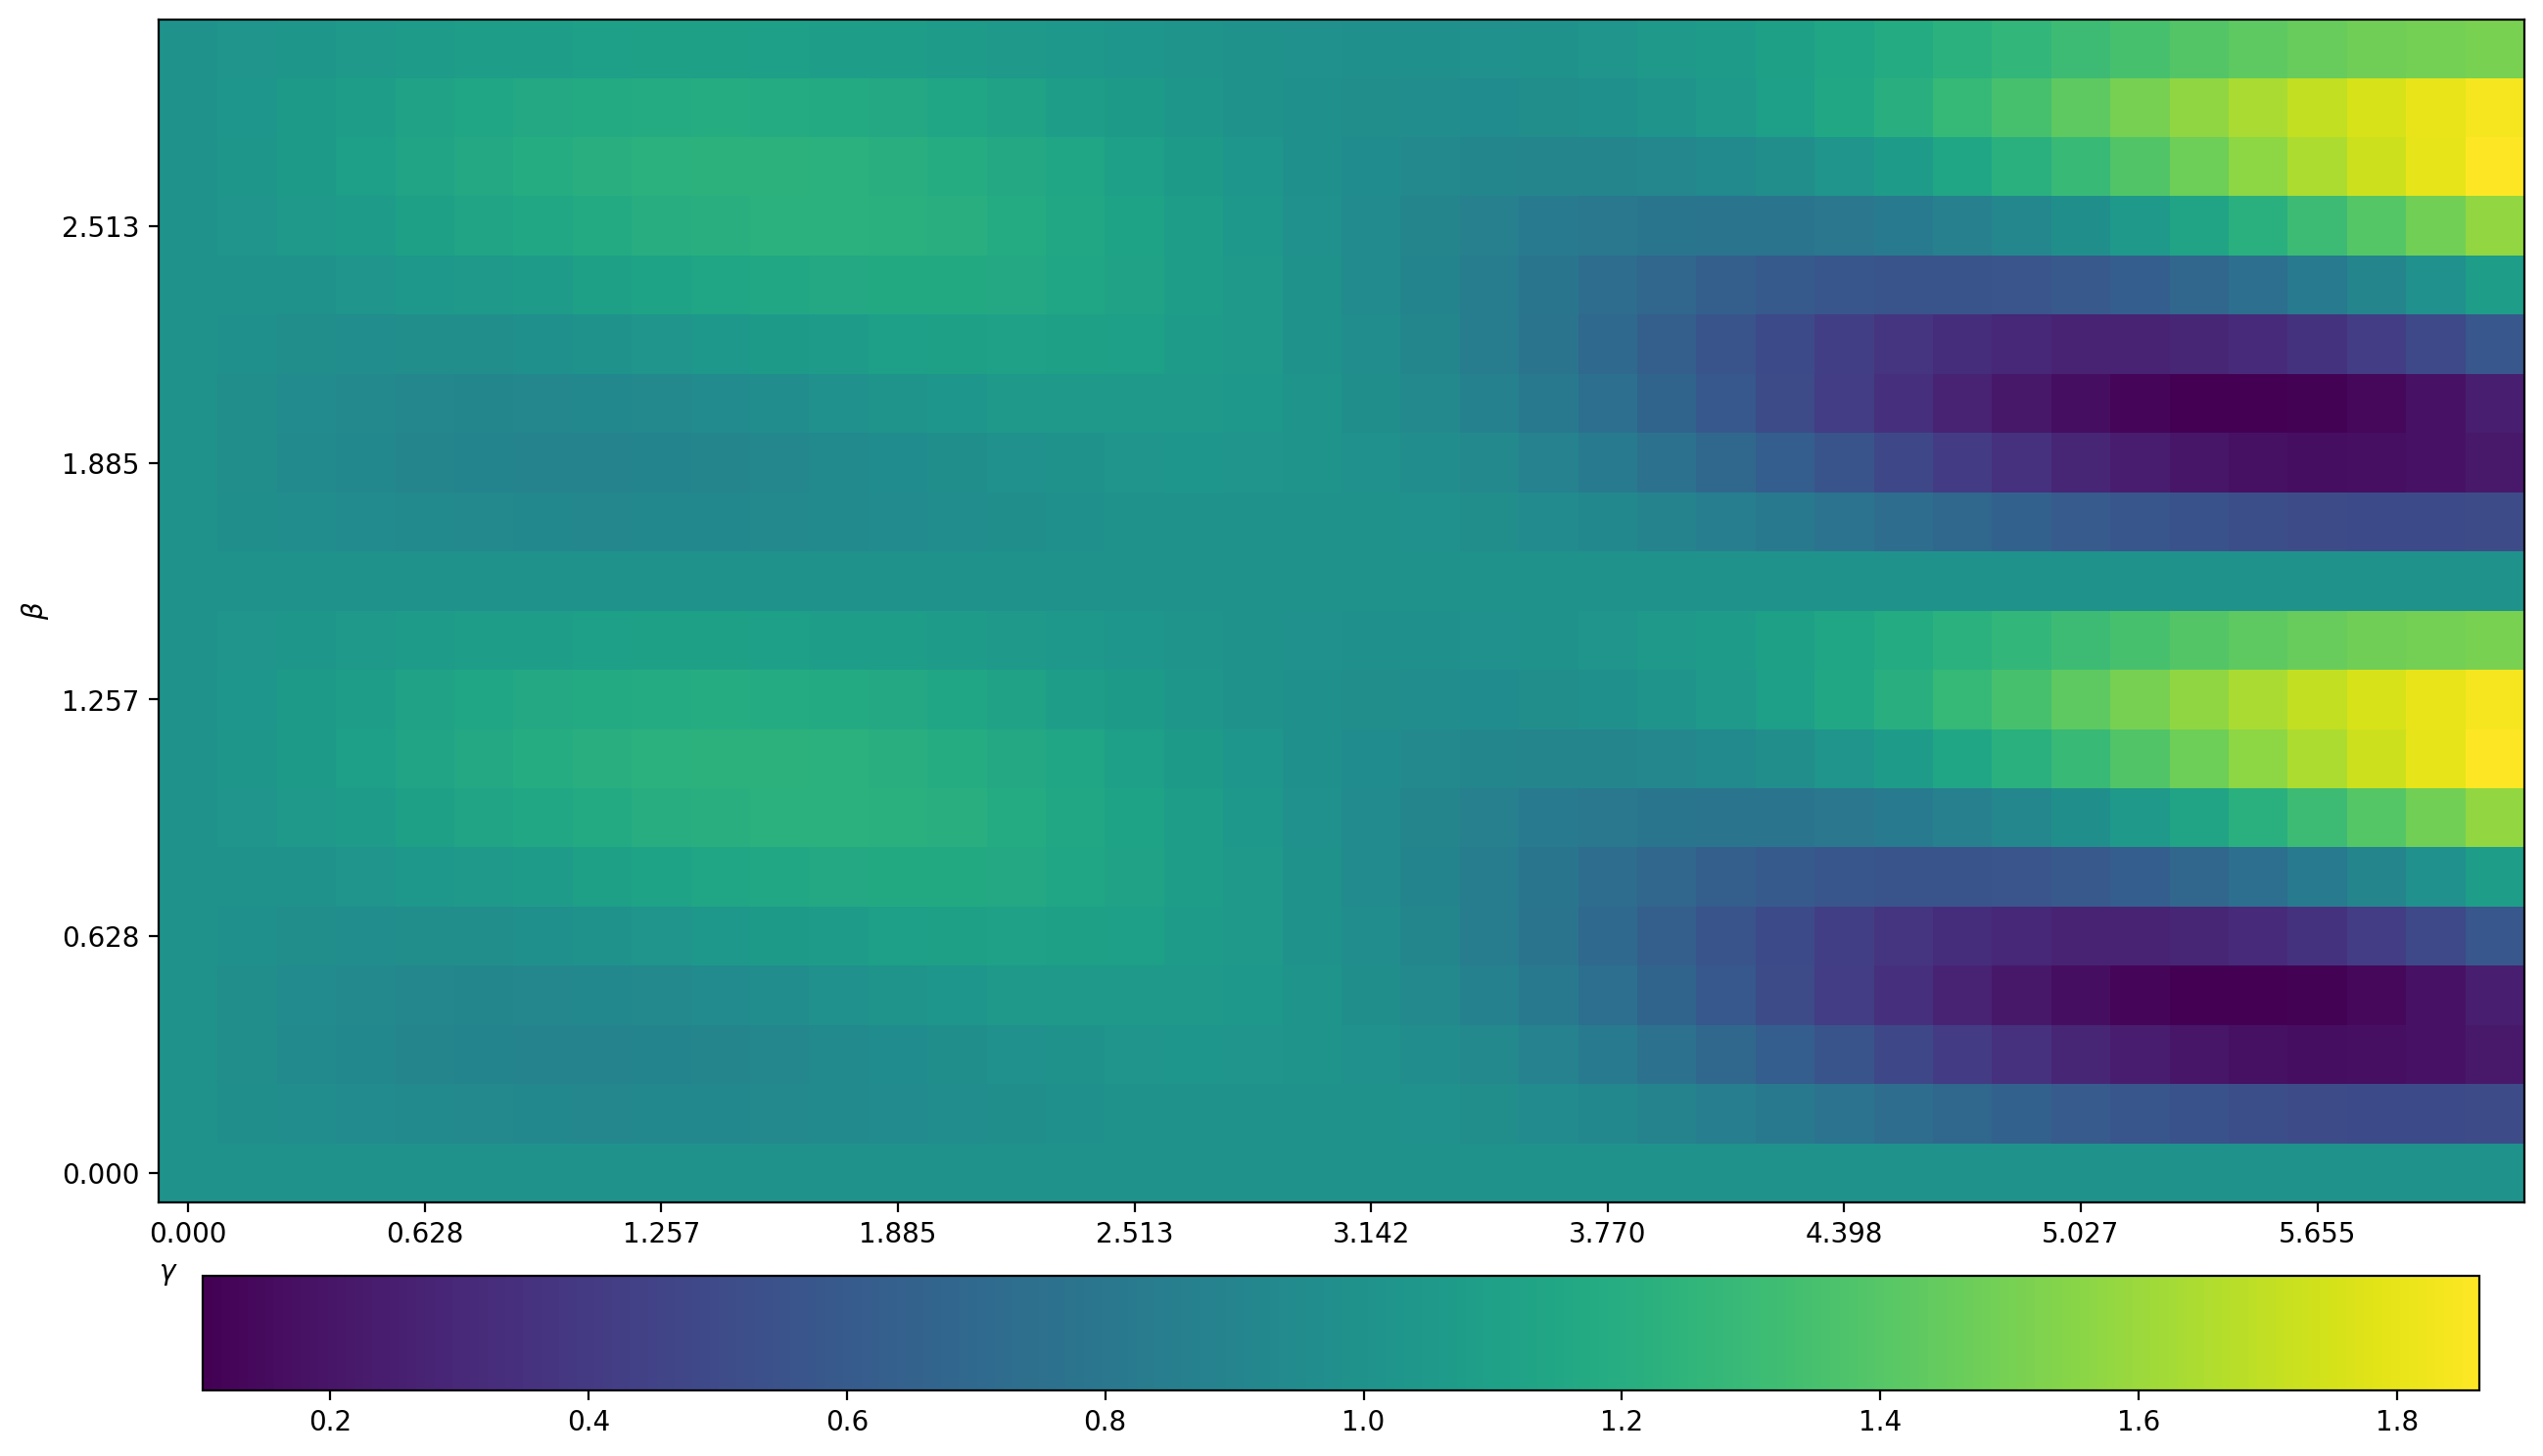

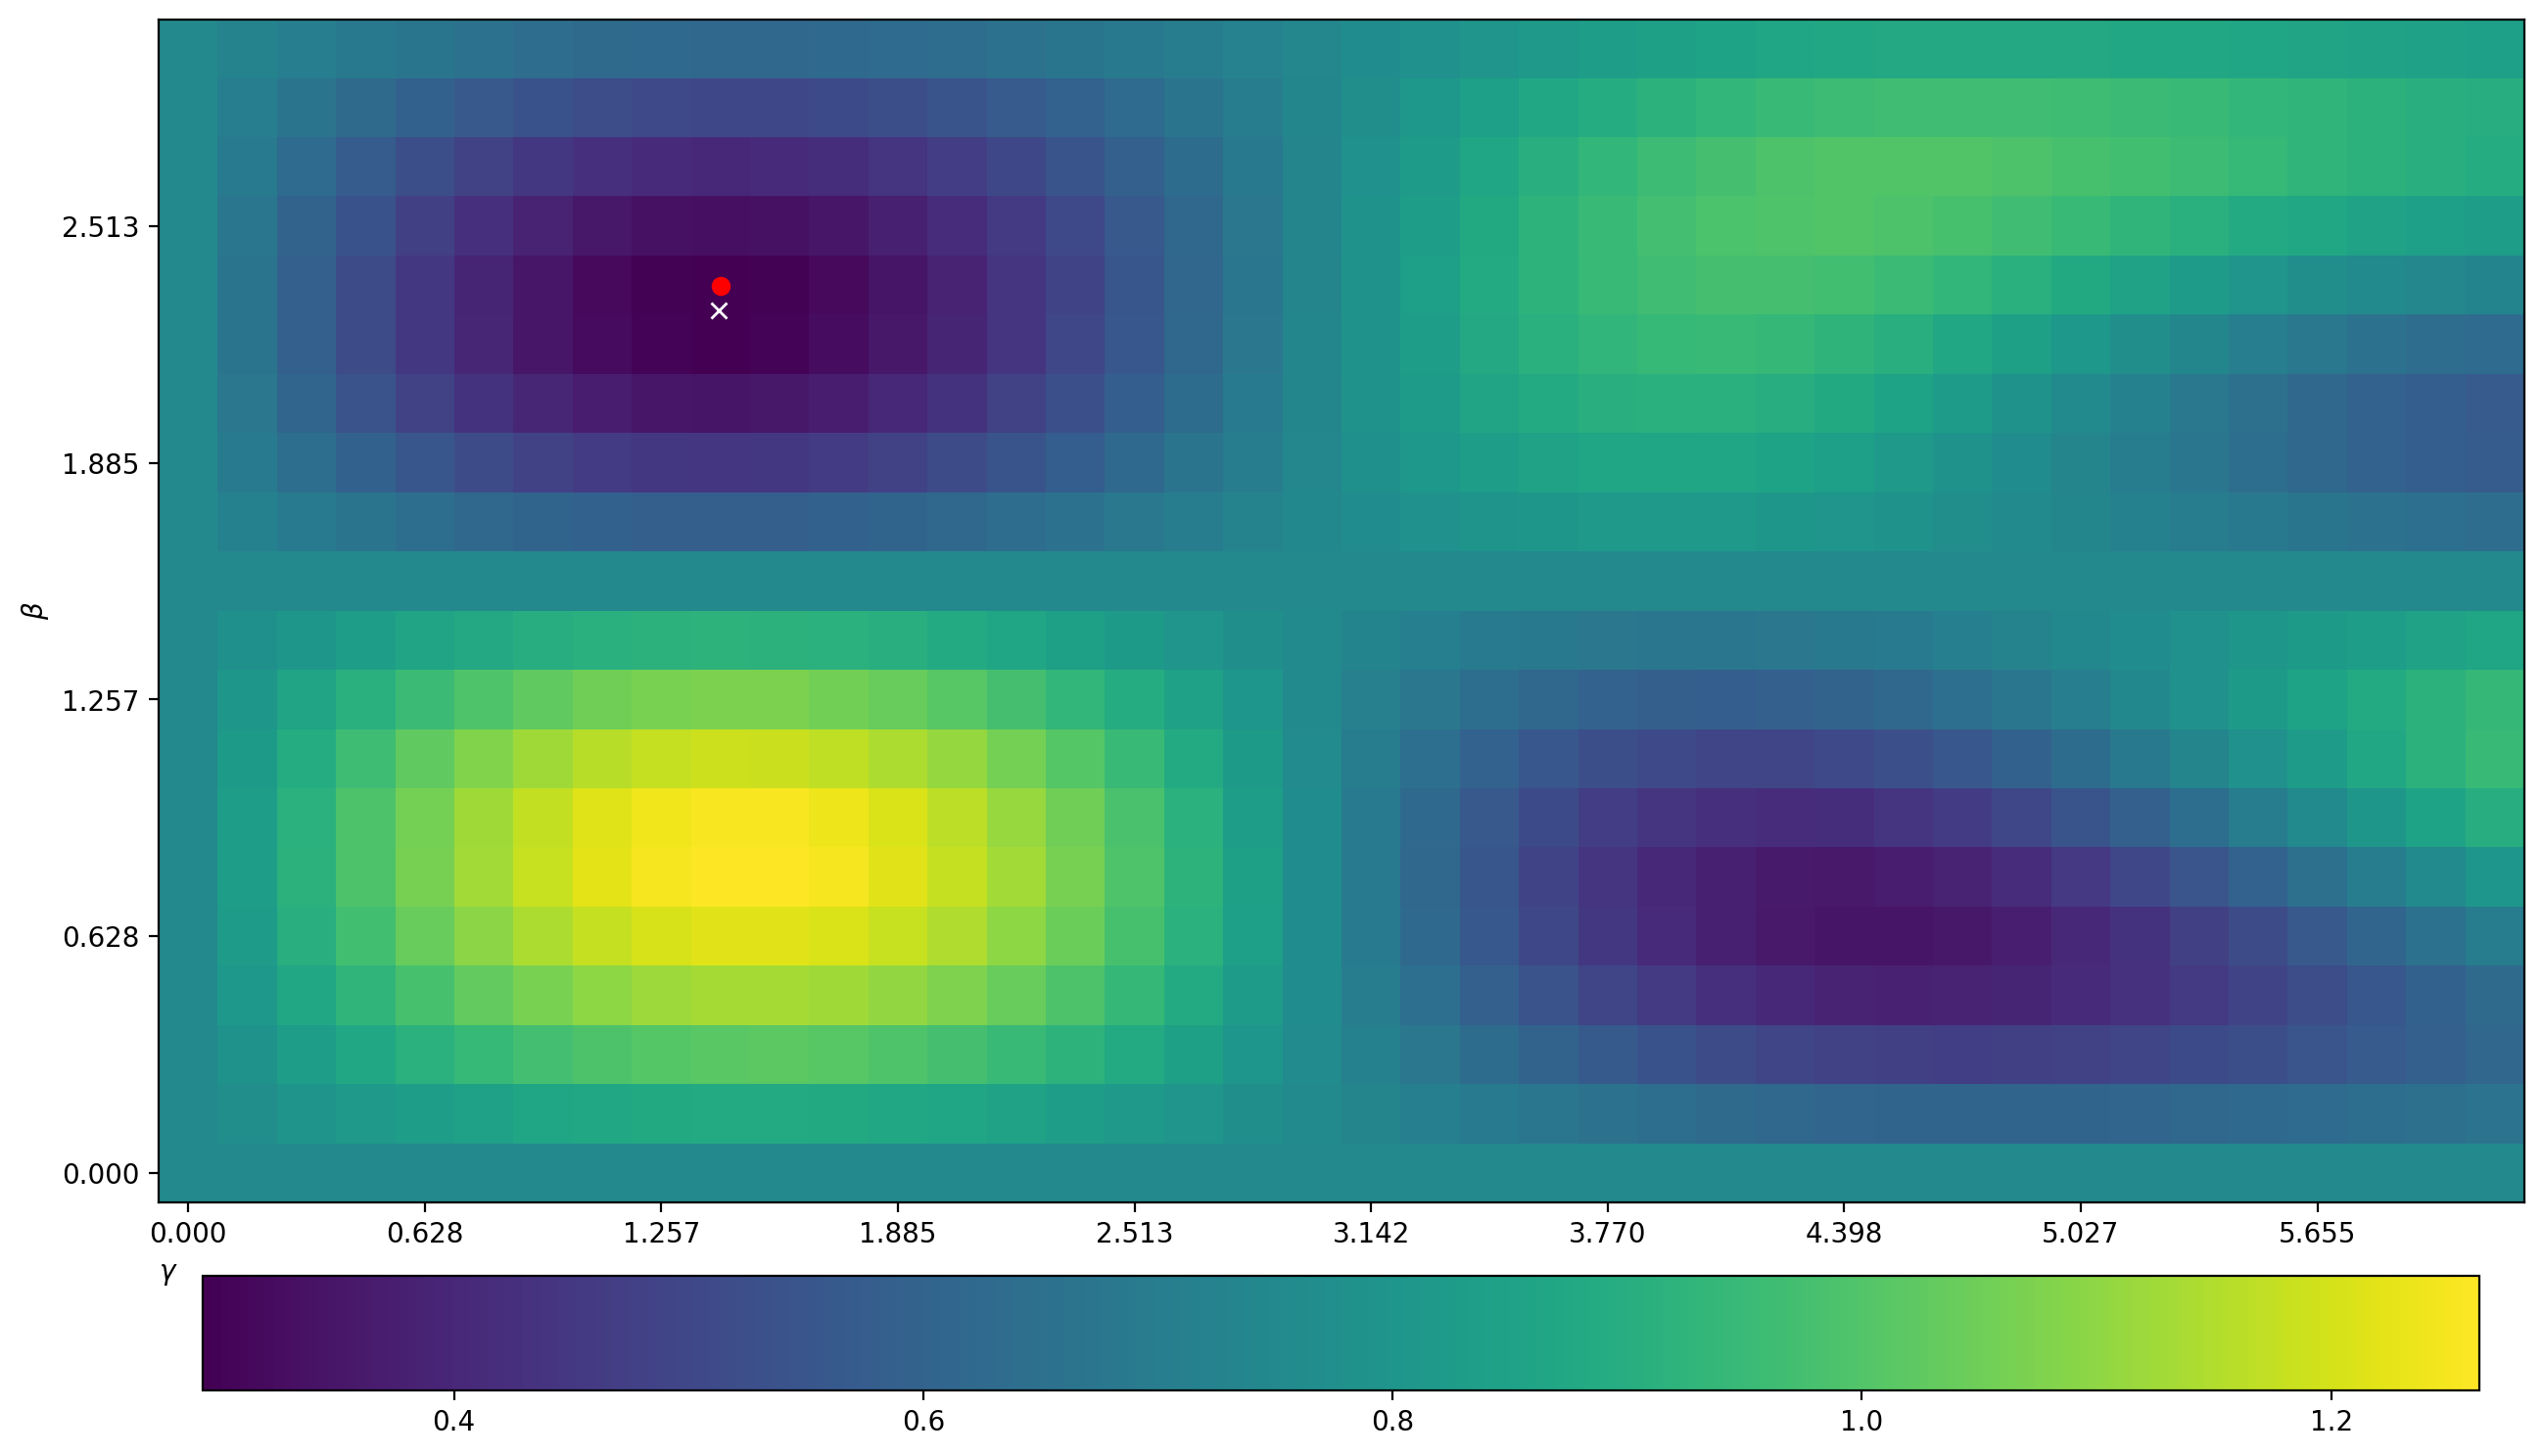

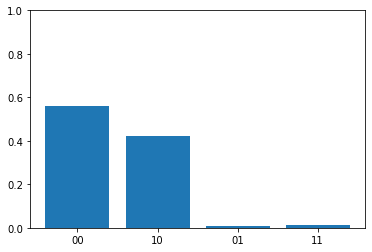

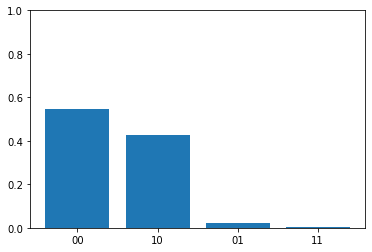

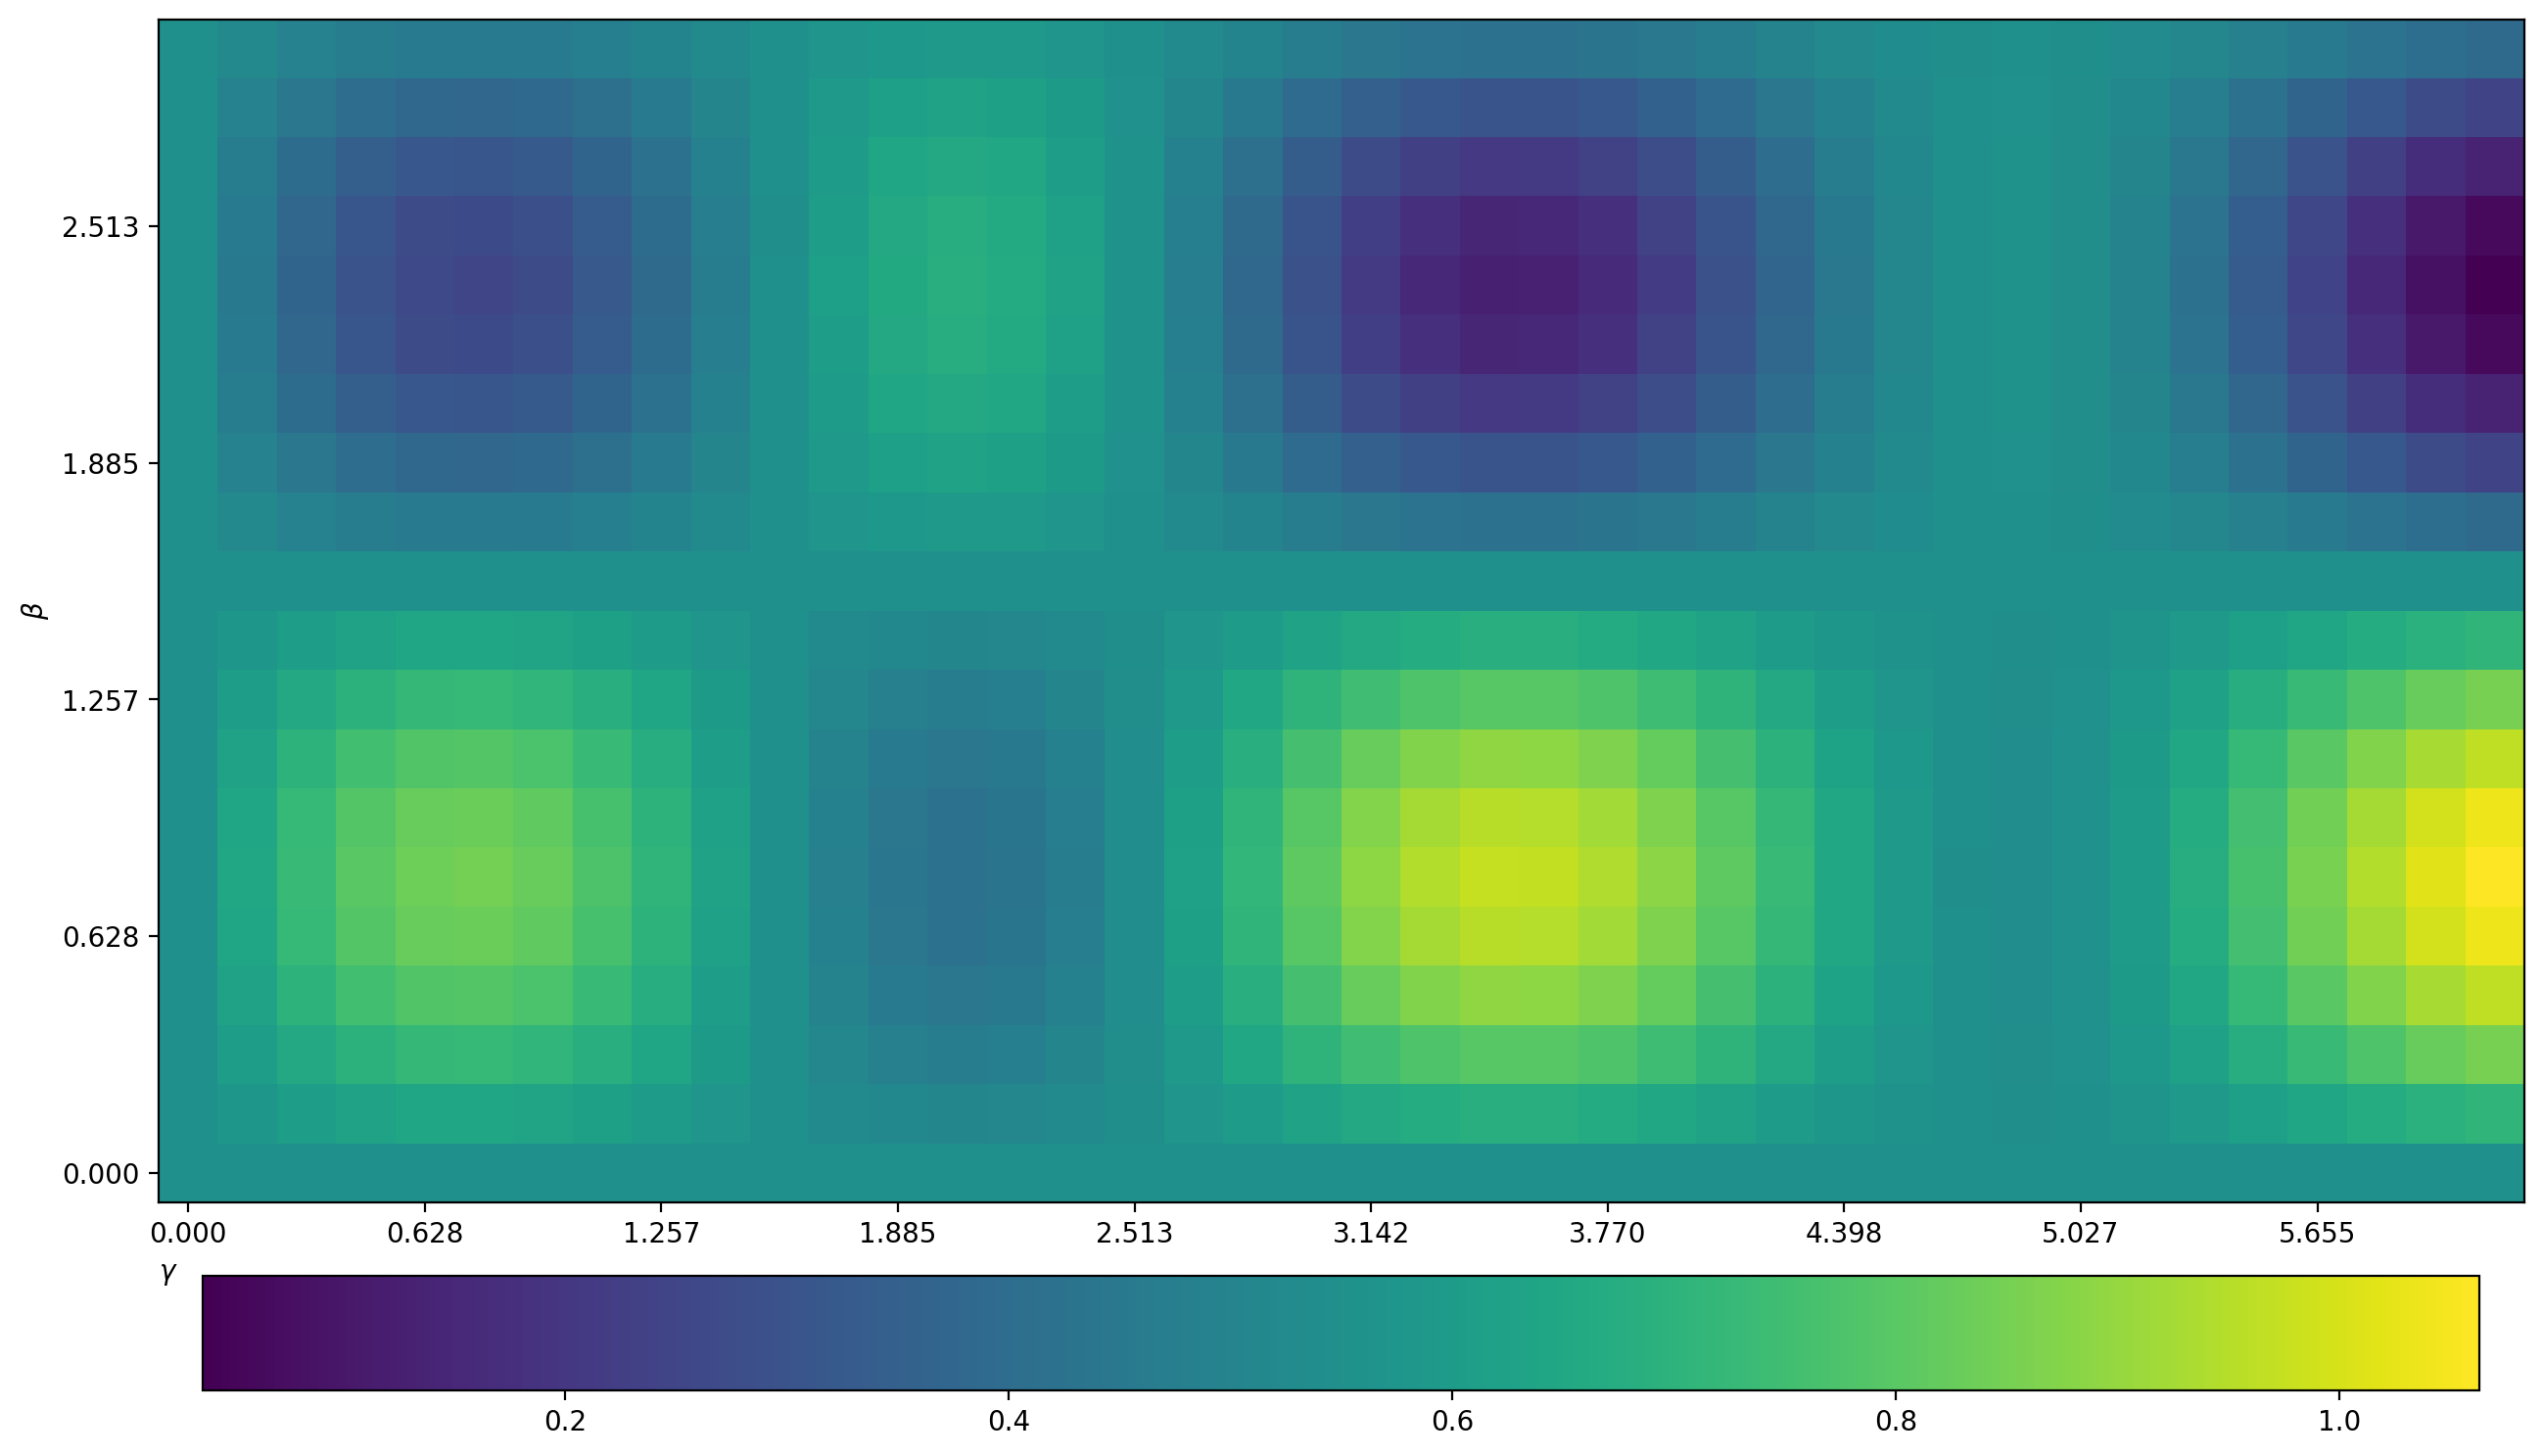

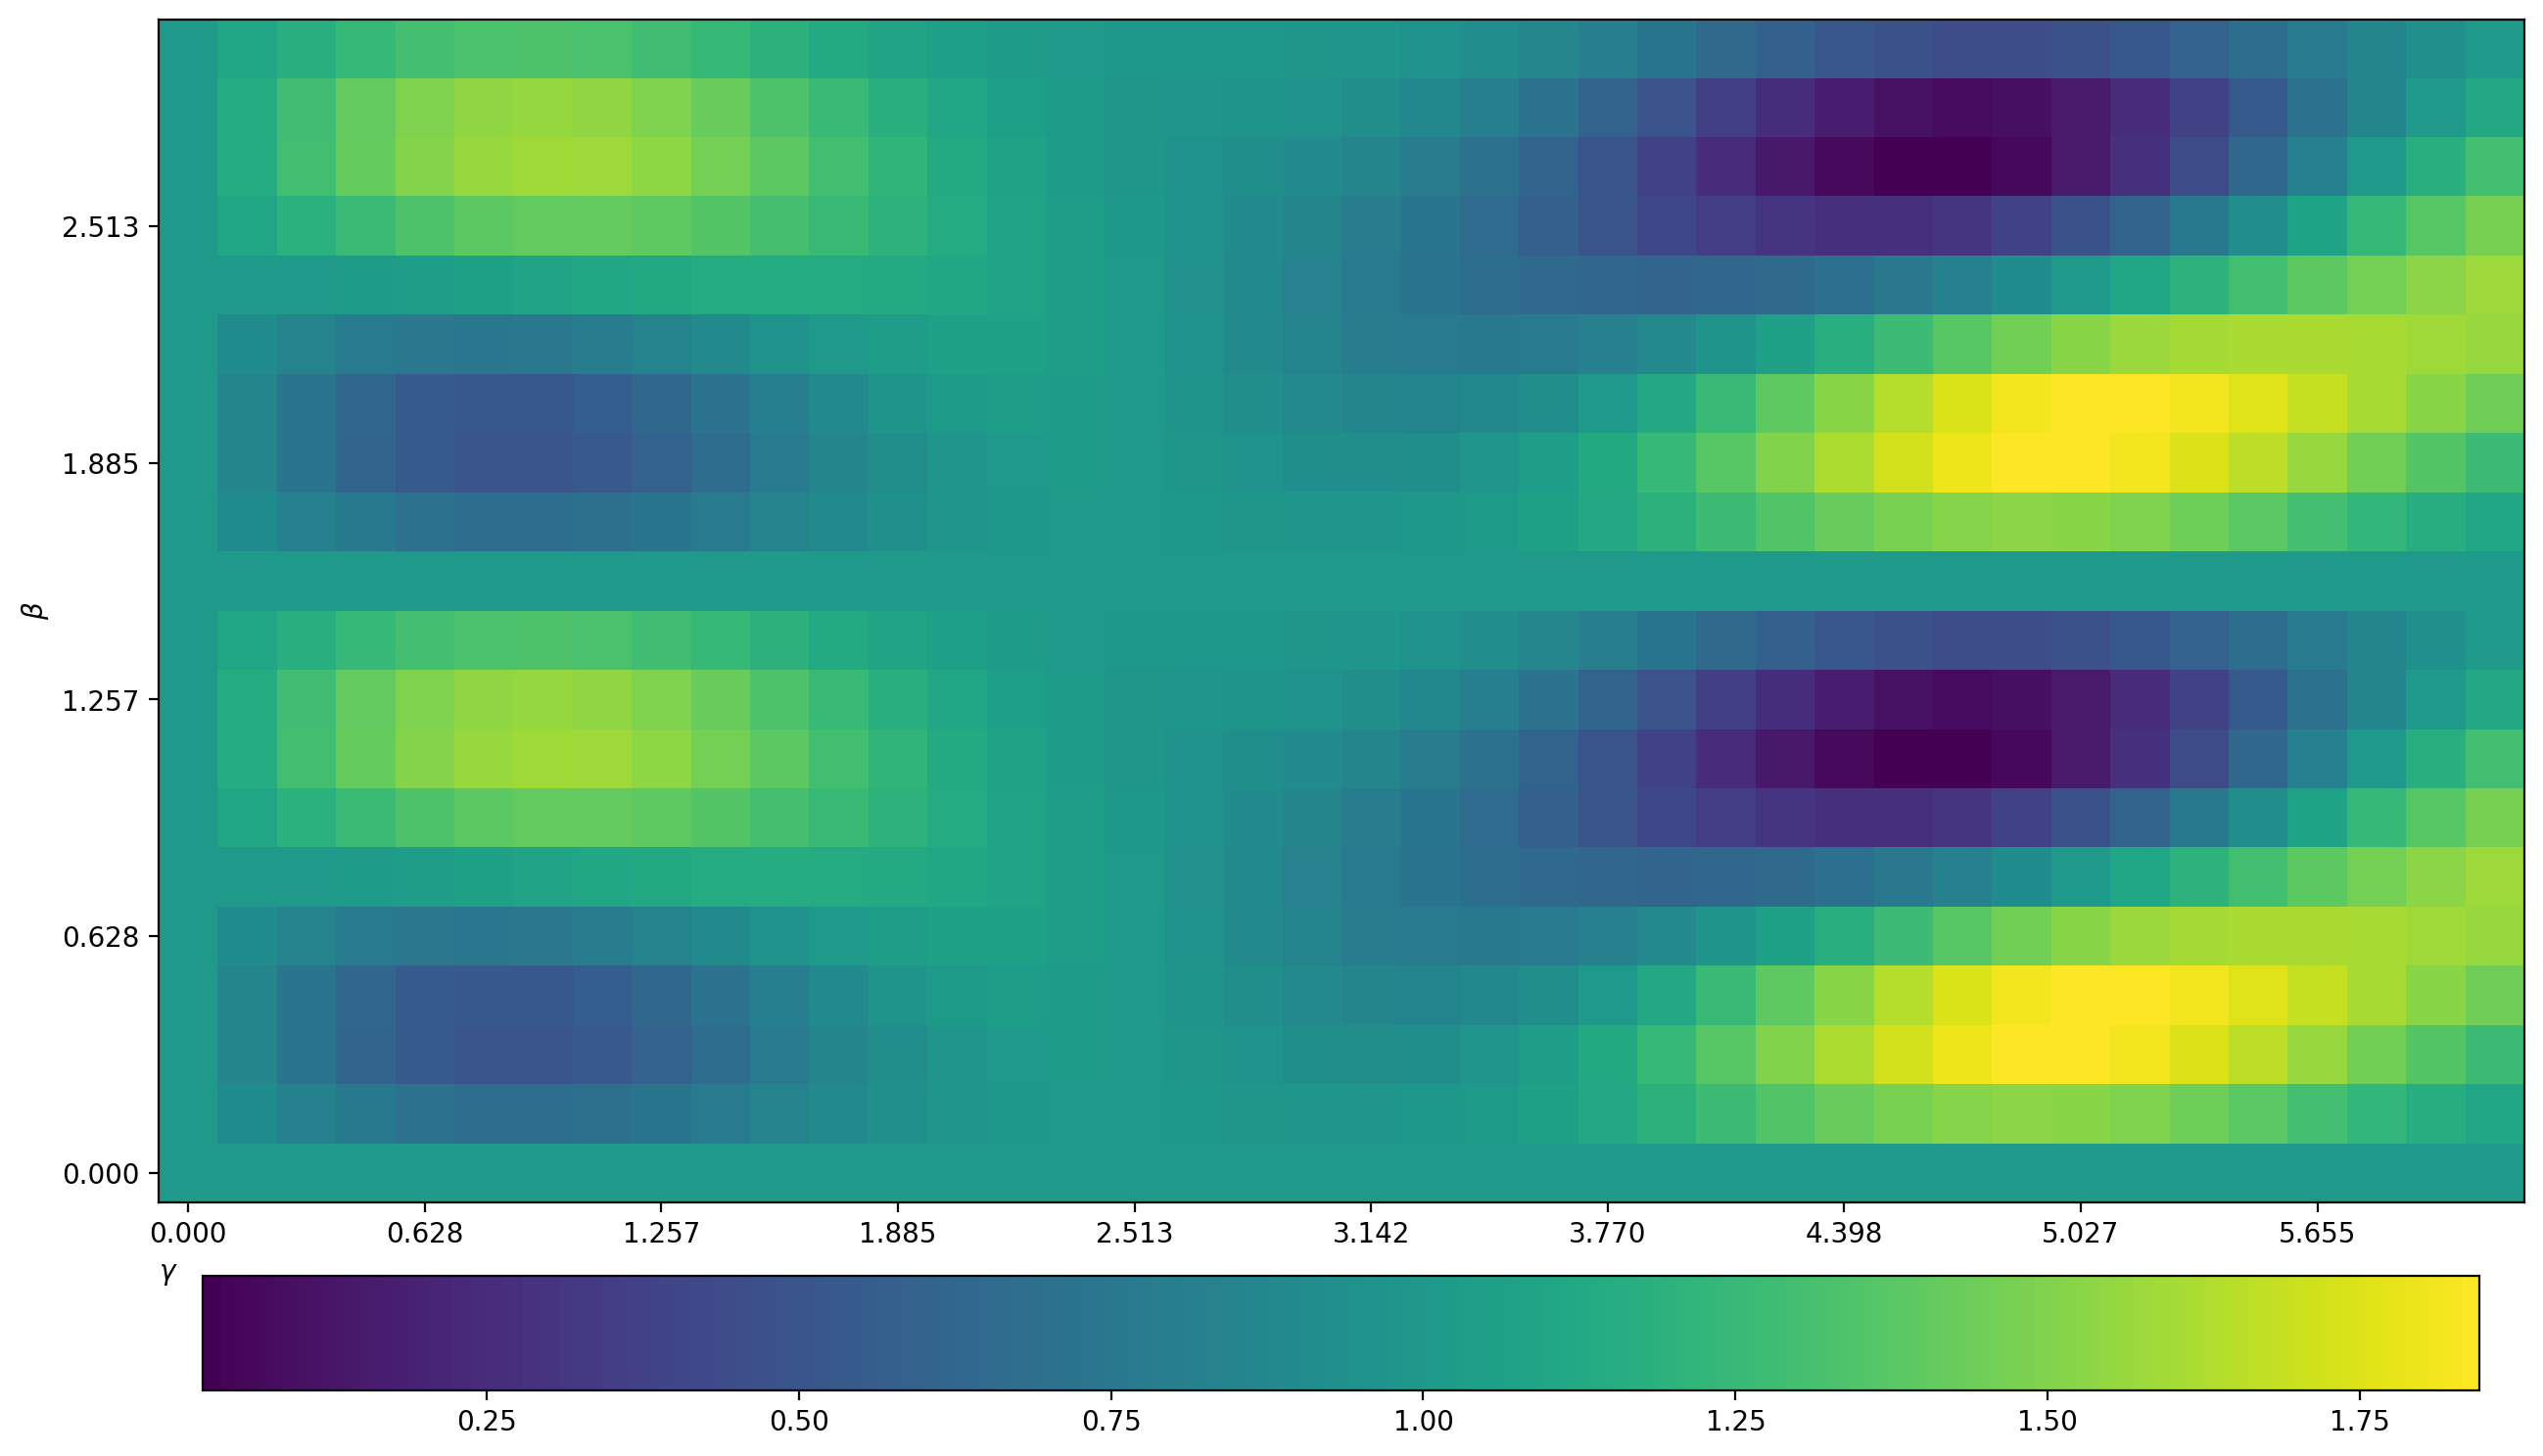

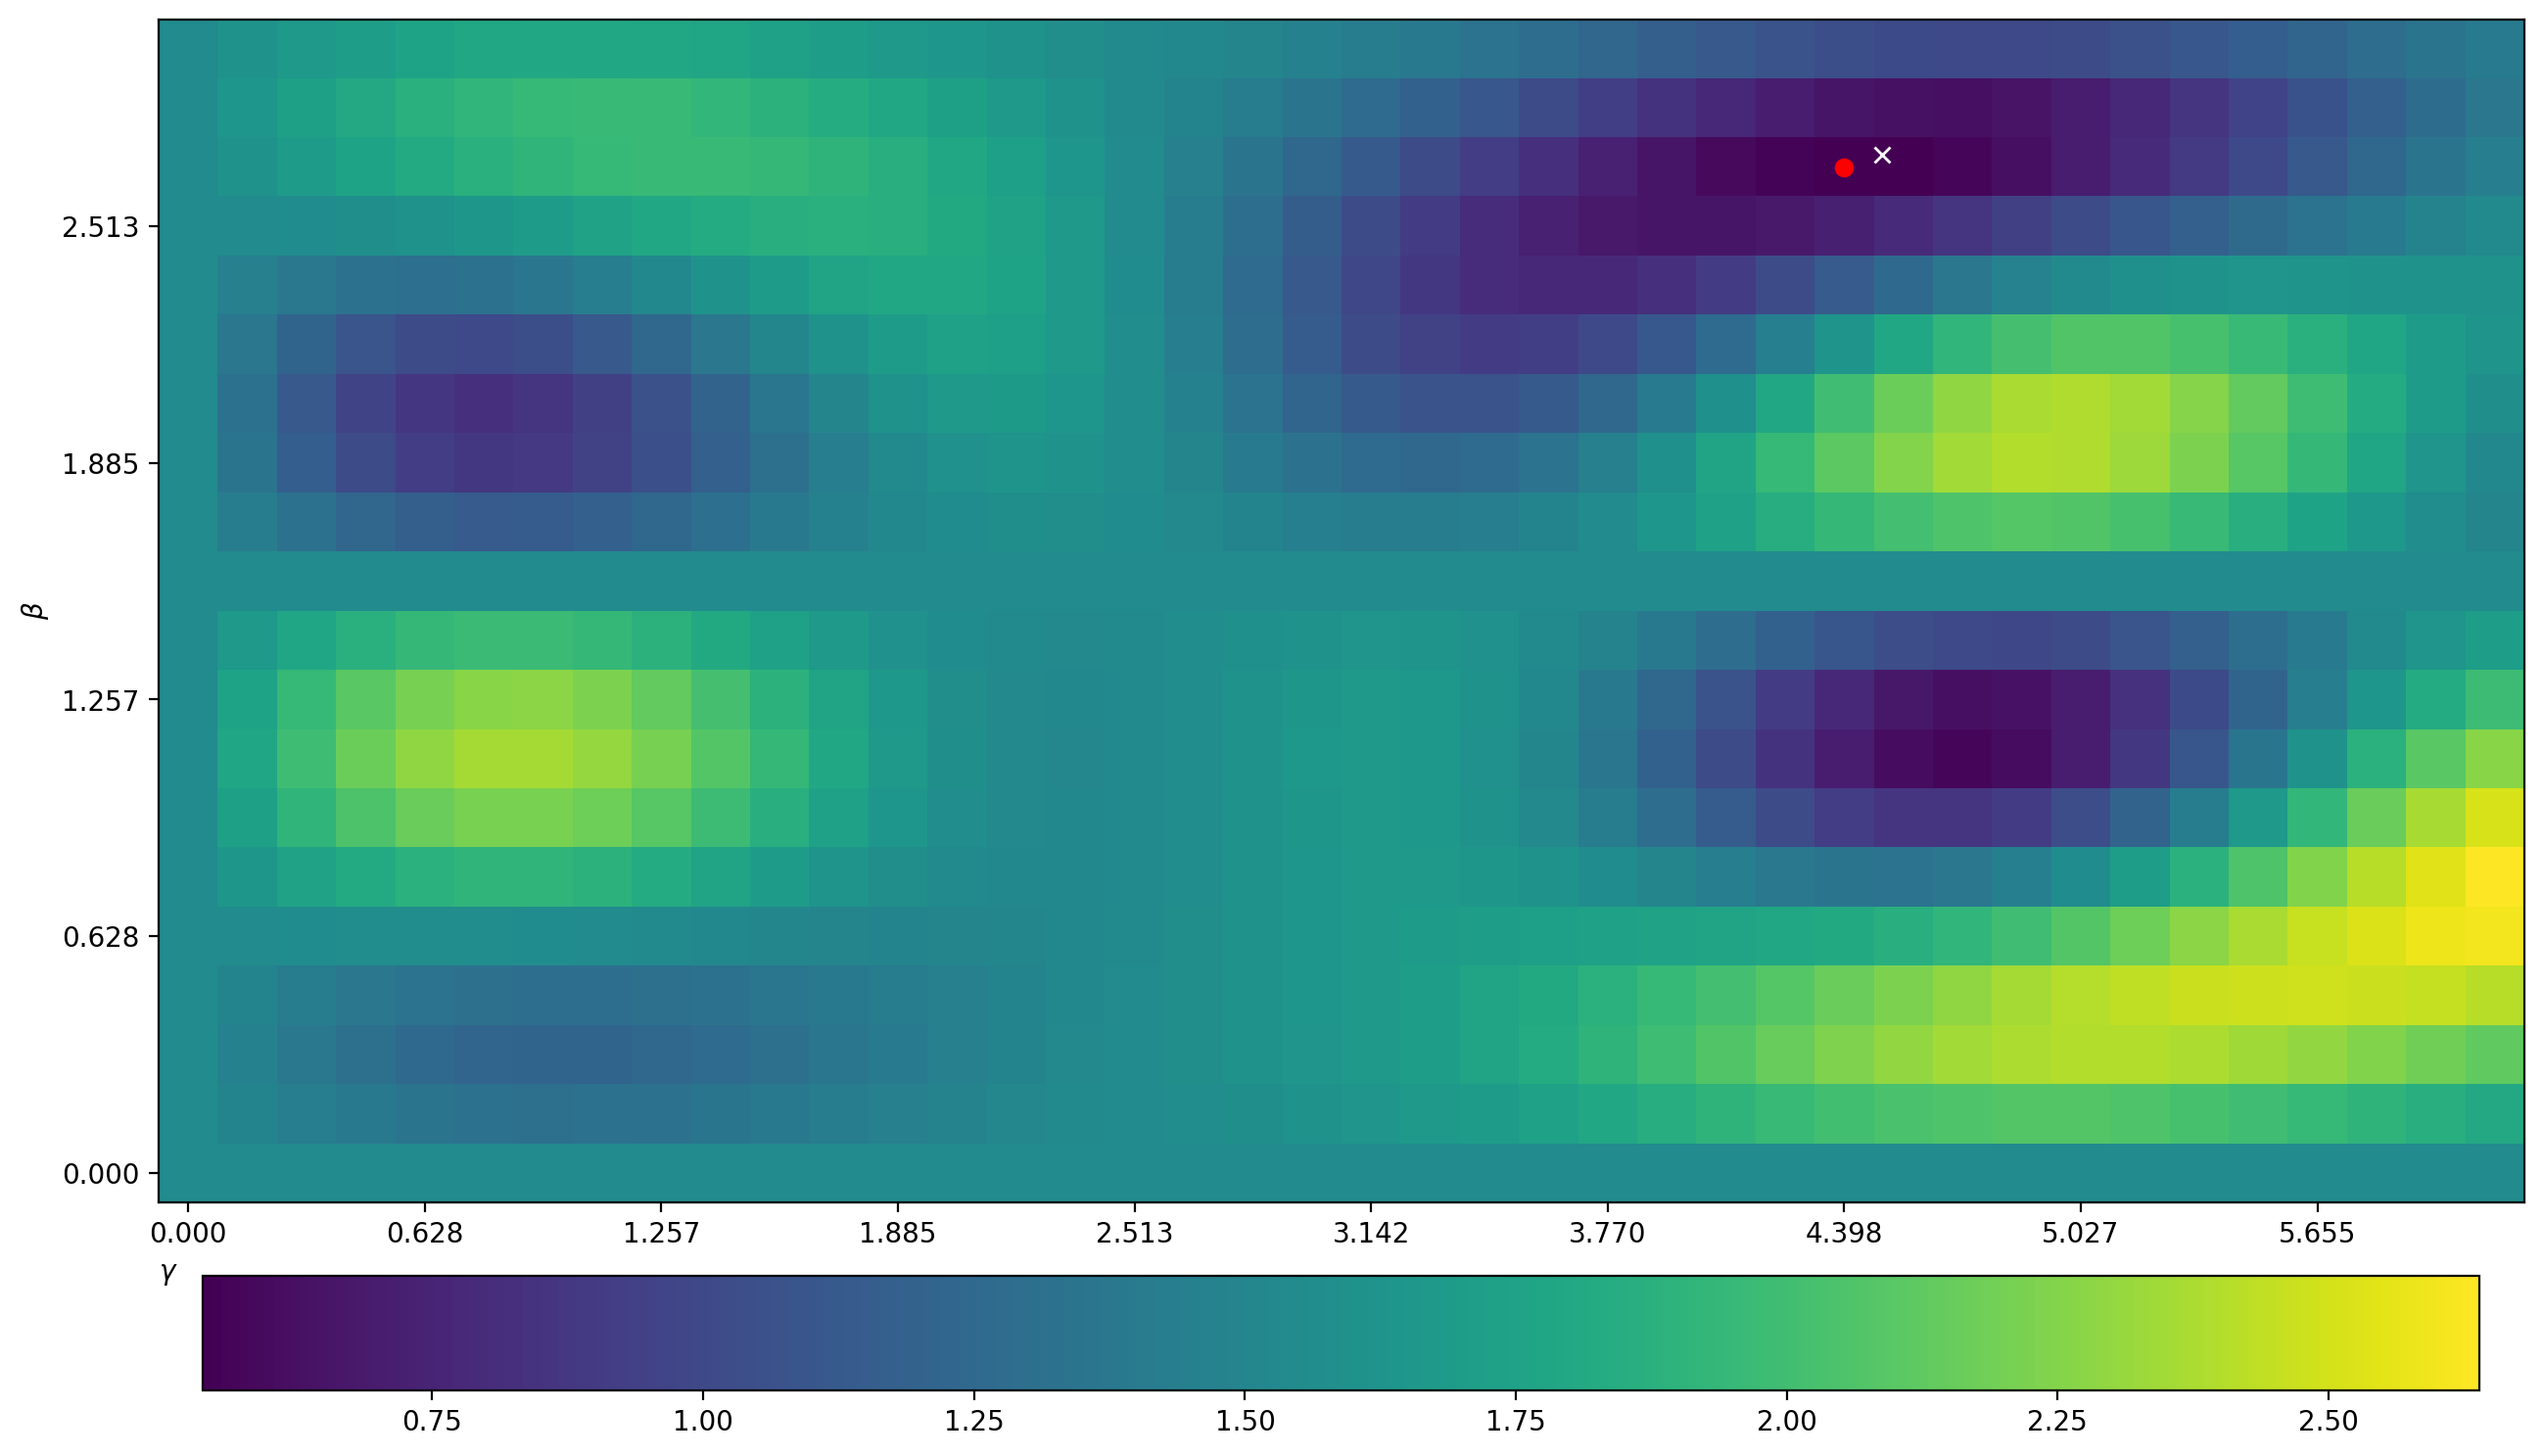

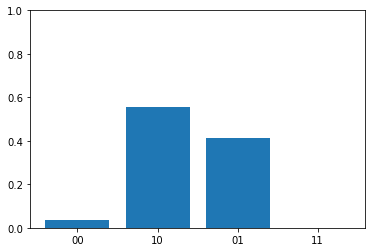

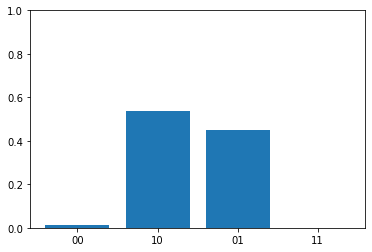

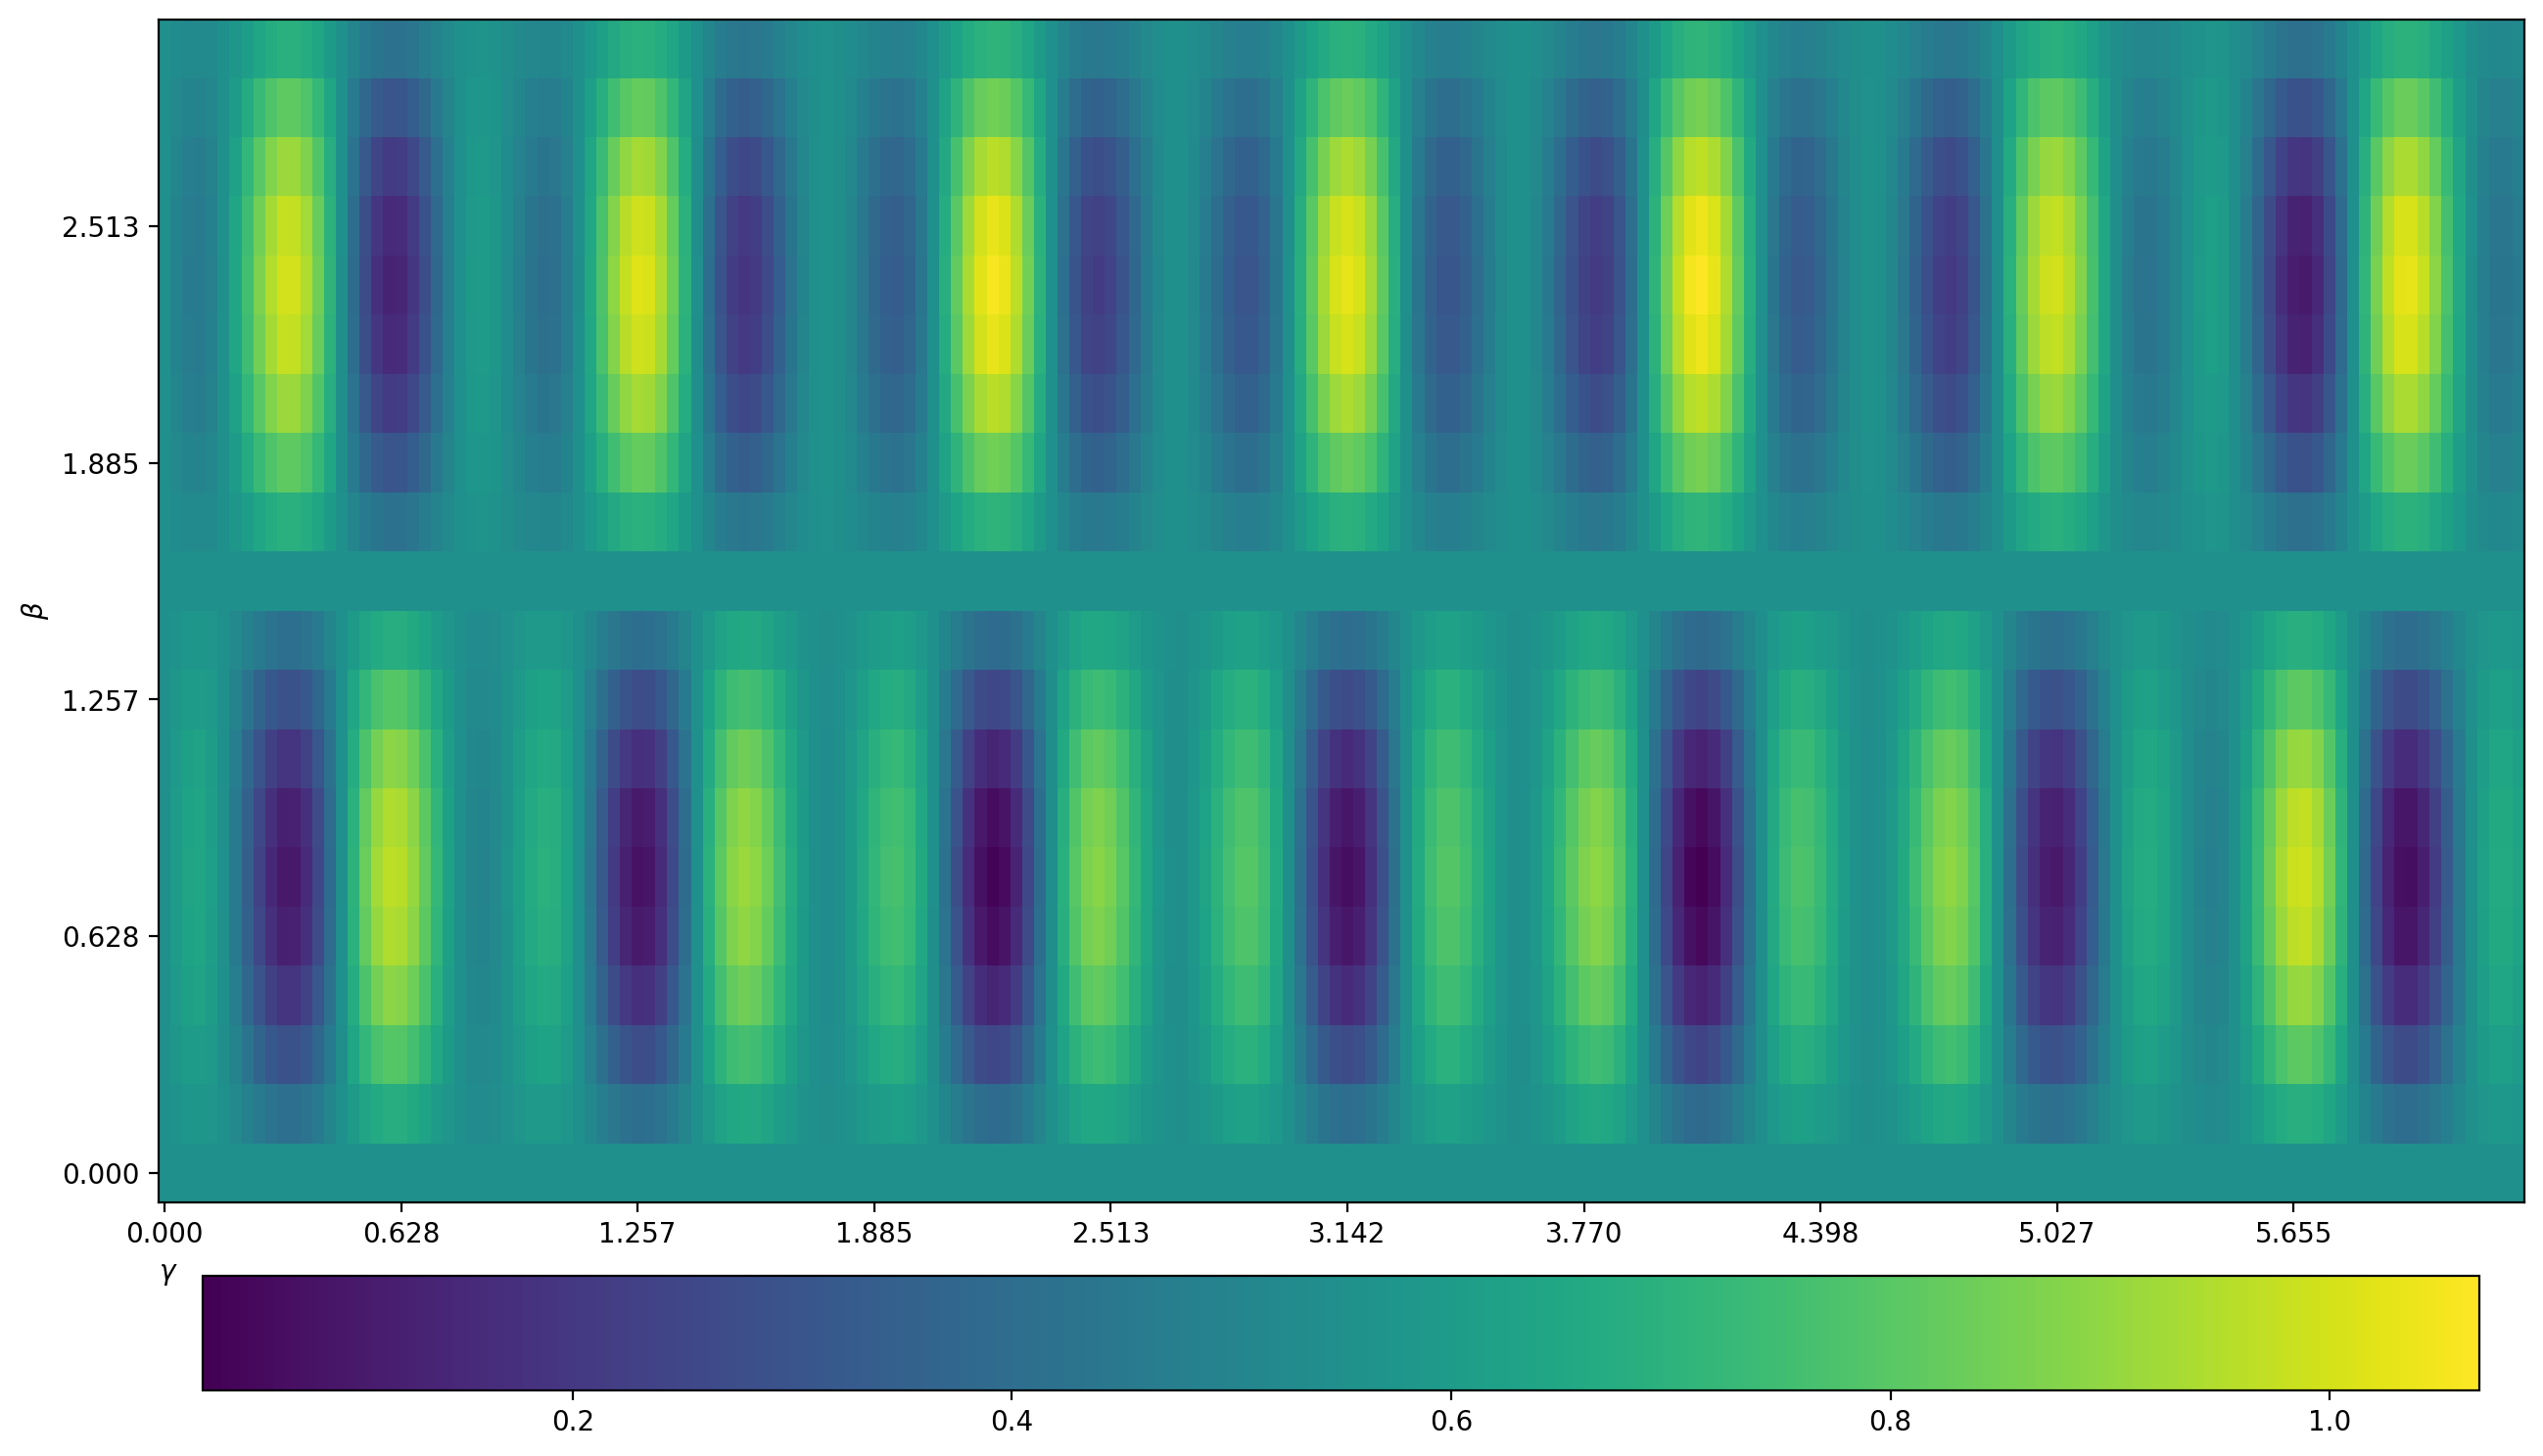

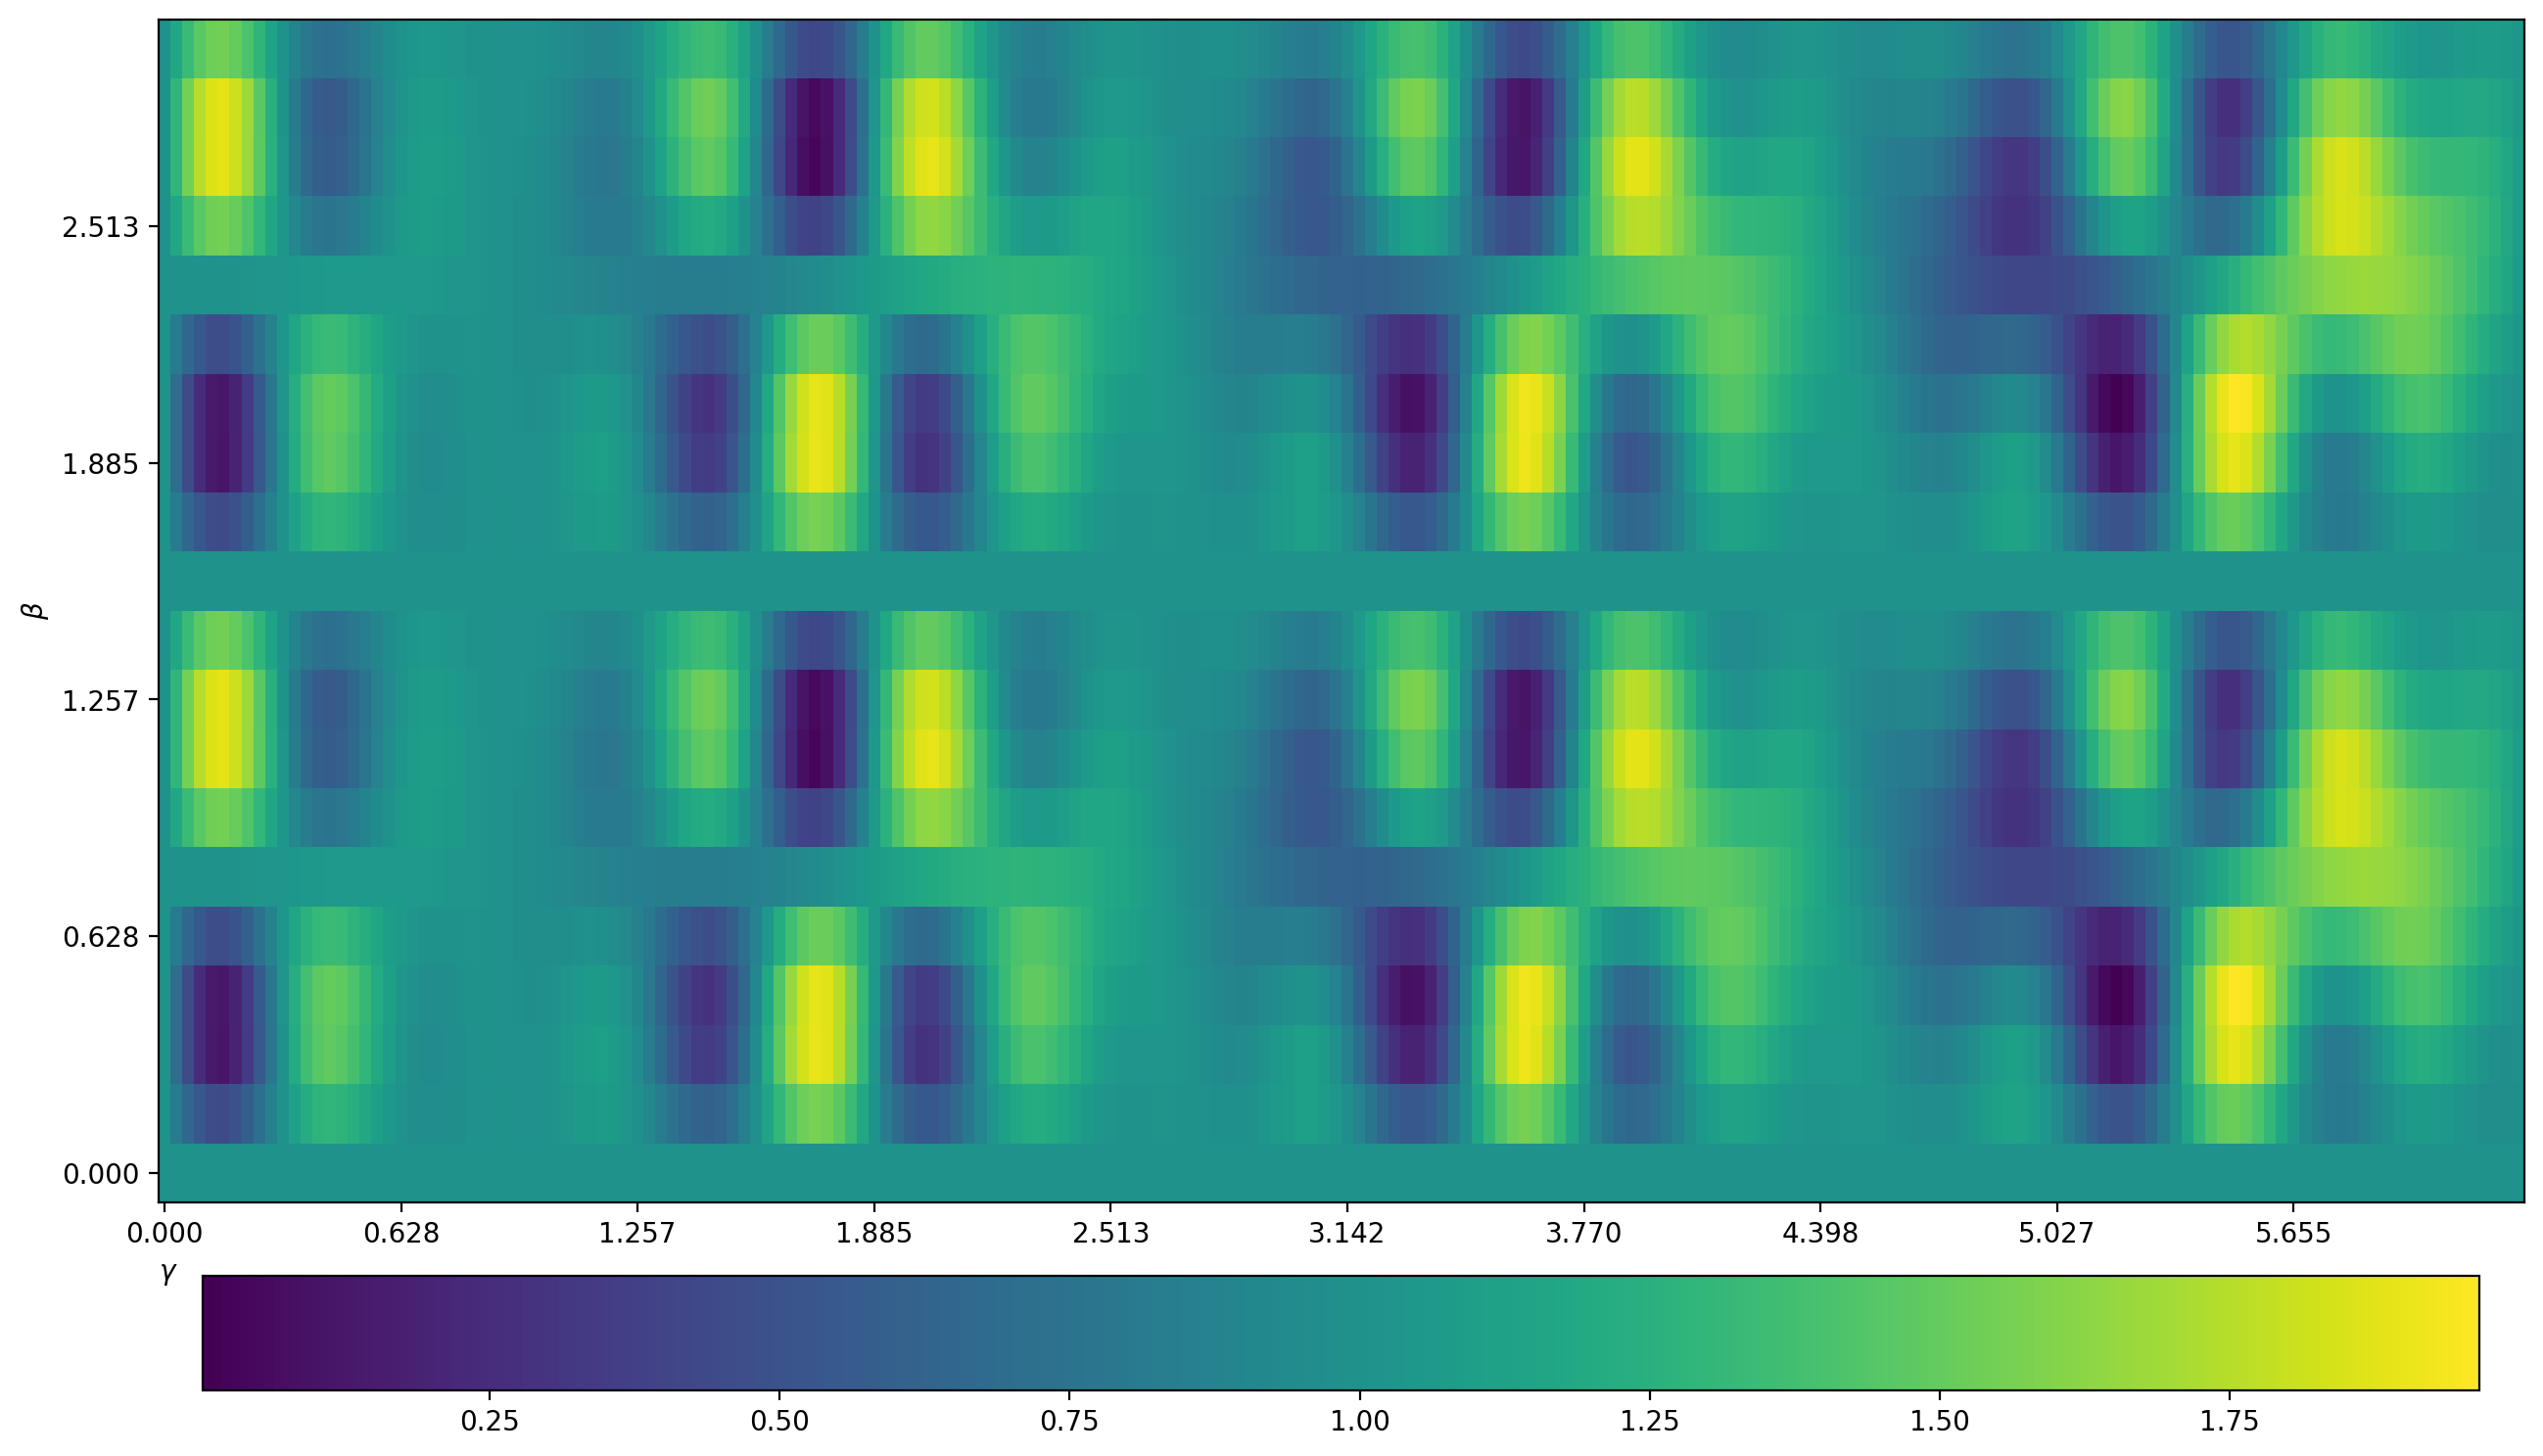

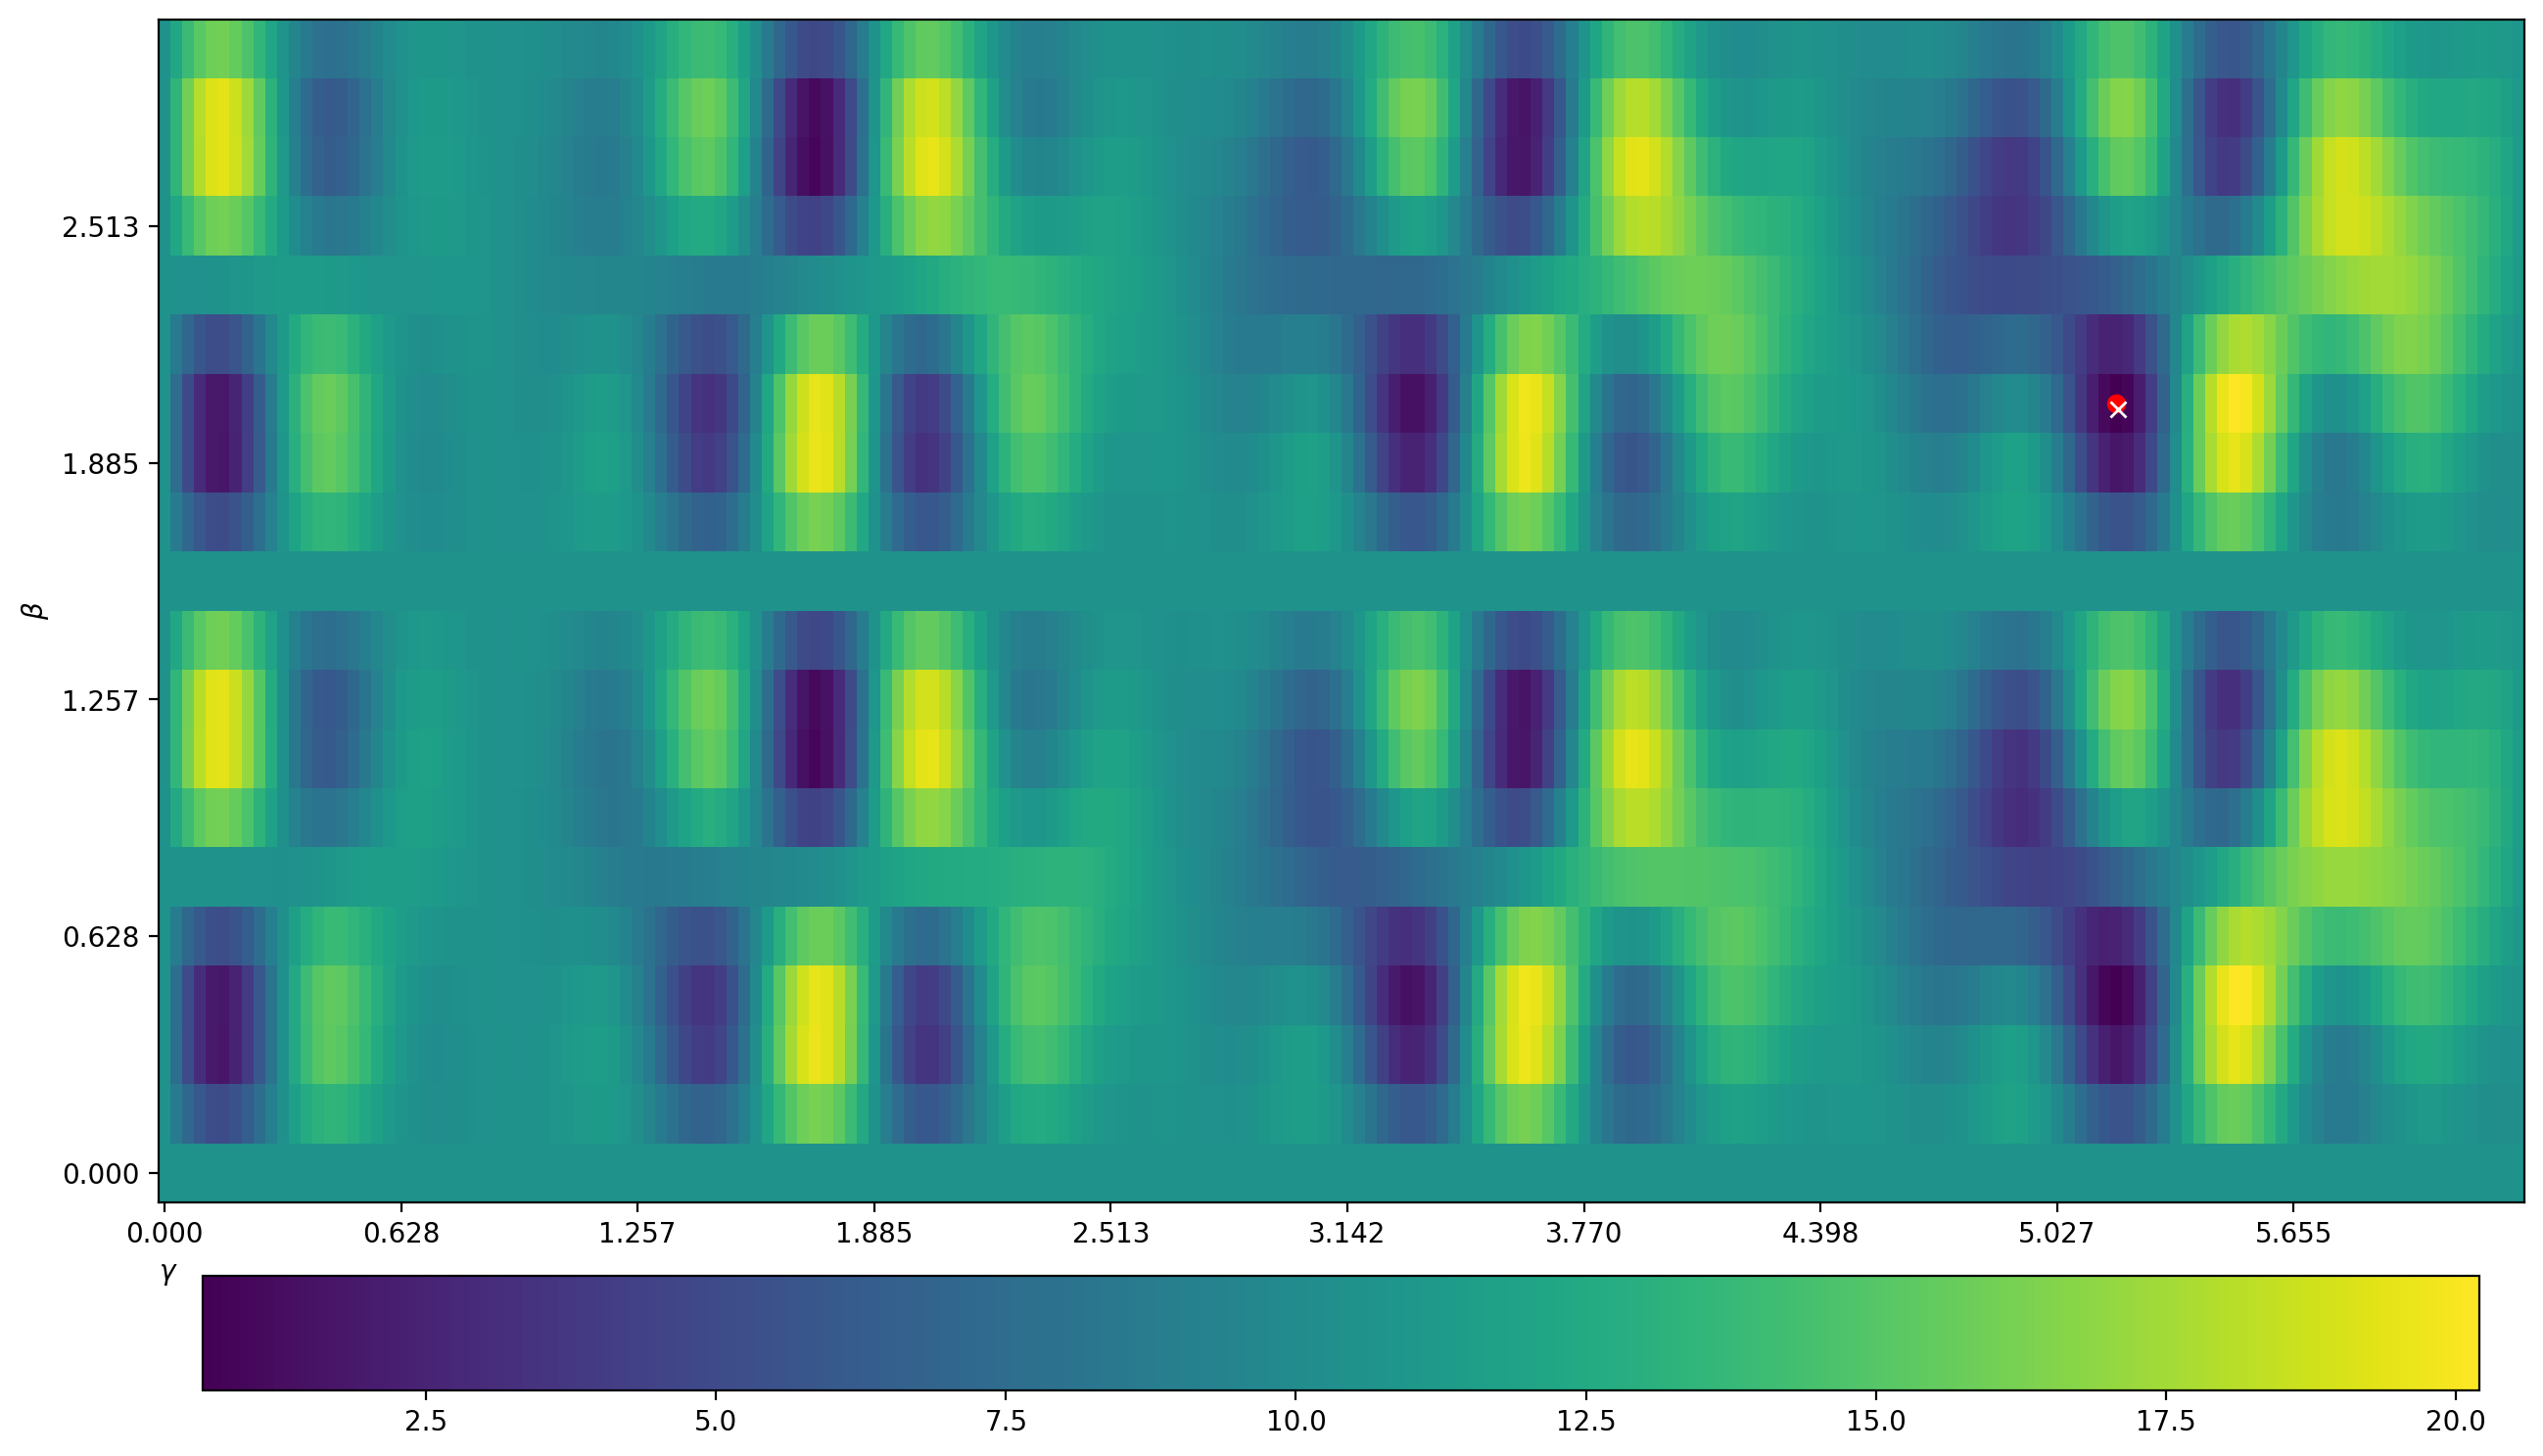

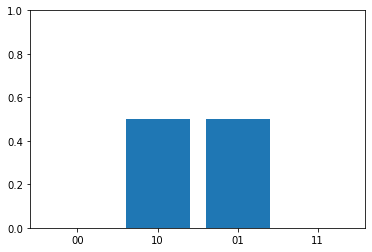

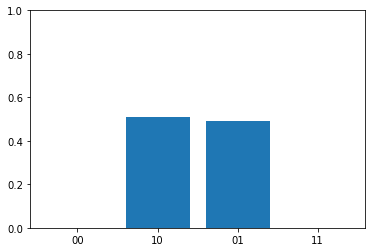

In [12]:
qaoa=QAOASwe(CR, FR)

for mu in [0.1, 0.2,1,10]: 
    print("mu=",mu)
    if mu>1:
        m=40*5
    else:
        m=40
    E, Ecost, Eexco, x0, job, ji = qaoa.getElandscape(backend,mu,ng=m)
    out, job_b, xb = qaoa.getlocalmin(x0, backend, mu)
    # plot landscape
    _=getfig(Ecost,ng=m)
    # plot landscape
    _=getfig(Eexco,ng=m)
    # plot landscape
    _=getfig(E,ng=m)
    pl.plot(x0[0],x0[1],'ro')
    pl.plot(xb[0],xb[1],'wx')
    
    # plot histogram
    md=job.result().get_counts()[int(ji)]
    pl.figure()
    pl.bar([k[::-1] for k in md.keys()], md.values())
    pl.ylim([0,1])
    
    # plot histogram
    md=job_b.result().get_counts()
    pl.figure()
    pl.bar([k[::-1] for k in md.keys()], md.values())
    pl.ylim([0,1])

mu= 0.1 useExco= True
Optimization terminated successfully.
         Current function value: 0.150789
         Iterations: 11
         Function evaluations: 22
mu= 0.2 useExco= True
Optimization terminated successfully.
         Current function value: 0.252361
         Iterations: 13
         Function evaluations: 25
mu= 1 useExco= True
Optimization terminated successfully.
         Current function value: 0.574270
         Iterations: 9
         Function evaluations: 19
mu= 10 useExco= True
Optimization terminated successfully.
         Current function value: 0.932025
         Iterations: 14
         Function evaluations: 25
mu= 0.1 useExco= False
Optimization terminated successfully.
         Current function value: 0.127283
         Iterations: 11
         Function evaluations: 22


/home/franzf/OpenQuantumComputing/optimization/newbeginning.py:334: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=pl.figure(figsize=(20,10), dpi=200, facecolor='w', edgecolor='k');


mu= 0.2 useExco= False
Optimization terminated successfully.
         Current function value: 0.181757
         Iterations: 9
         Function evaluations: 19
mu= 1 useExco= False
Optimization terminated successfully.
         Current function value: 0.615001
         Iterations: 12
         Function evaluations: 24
mu= 10 useExco= False
Optimization terminated successfully.
         Current function value: 5.457587
         Iterations: 10
         Function evaluations: 21


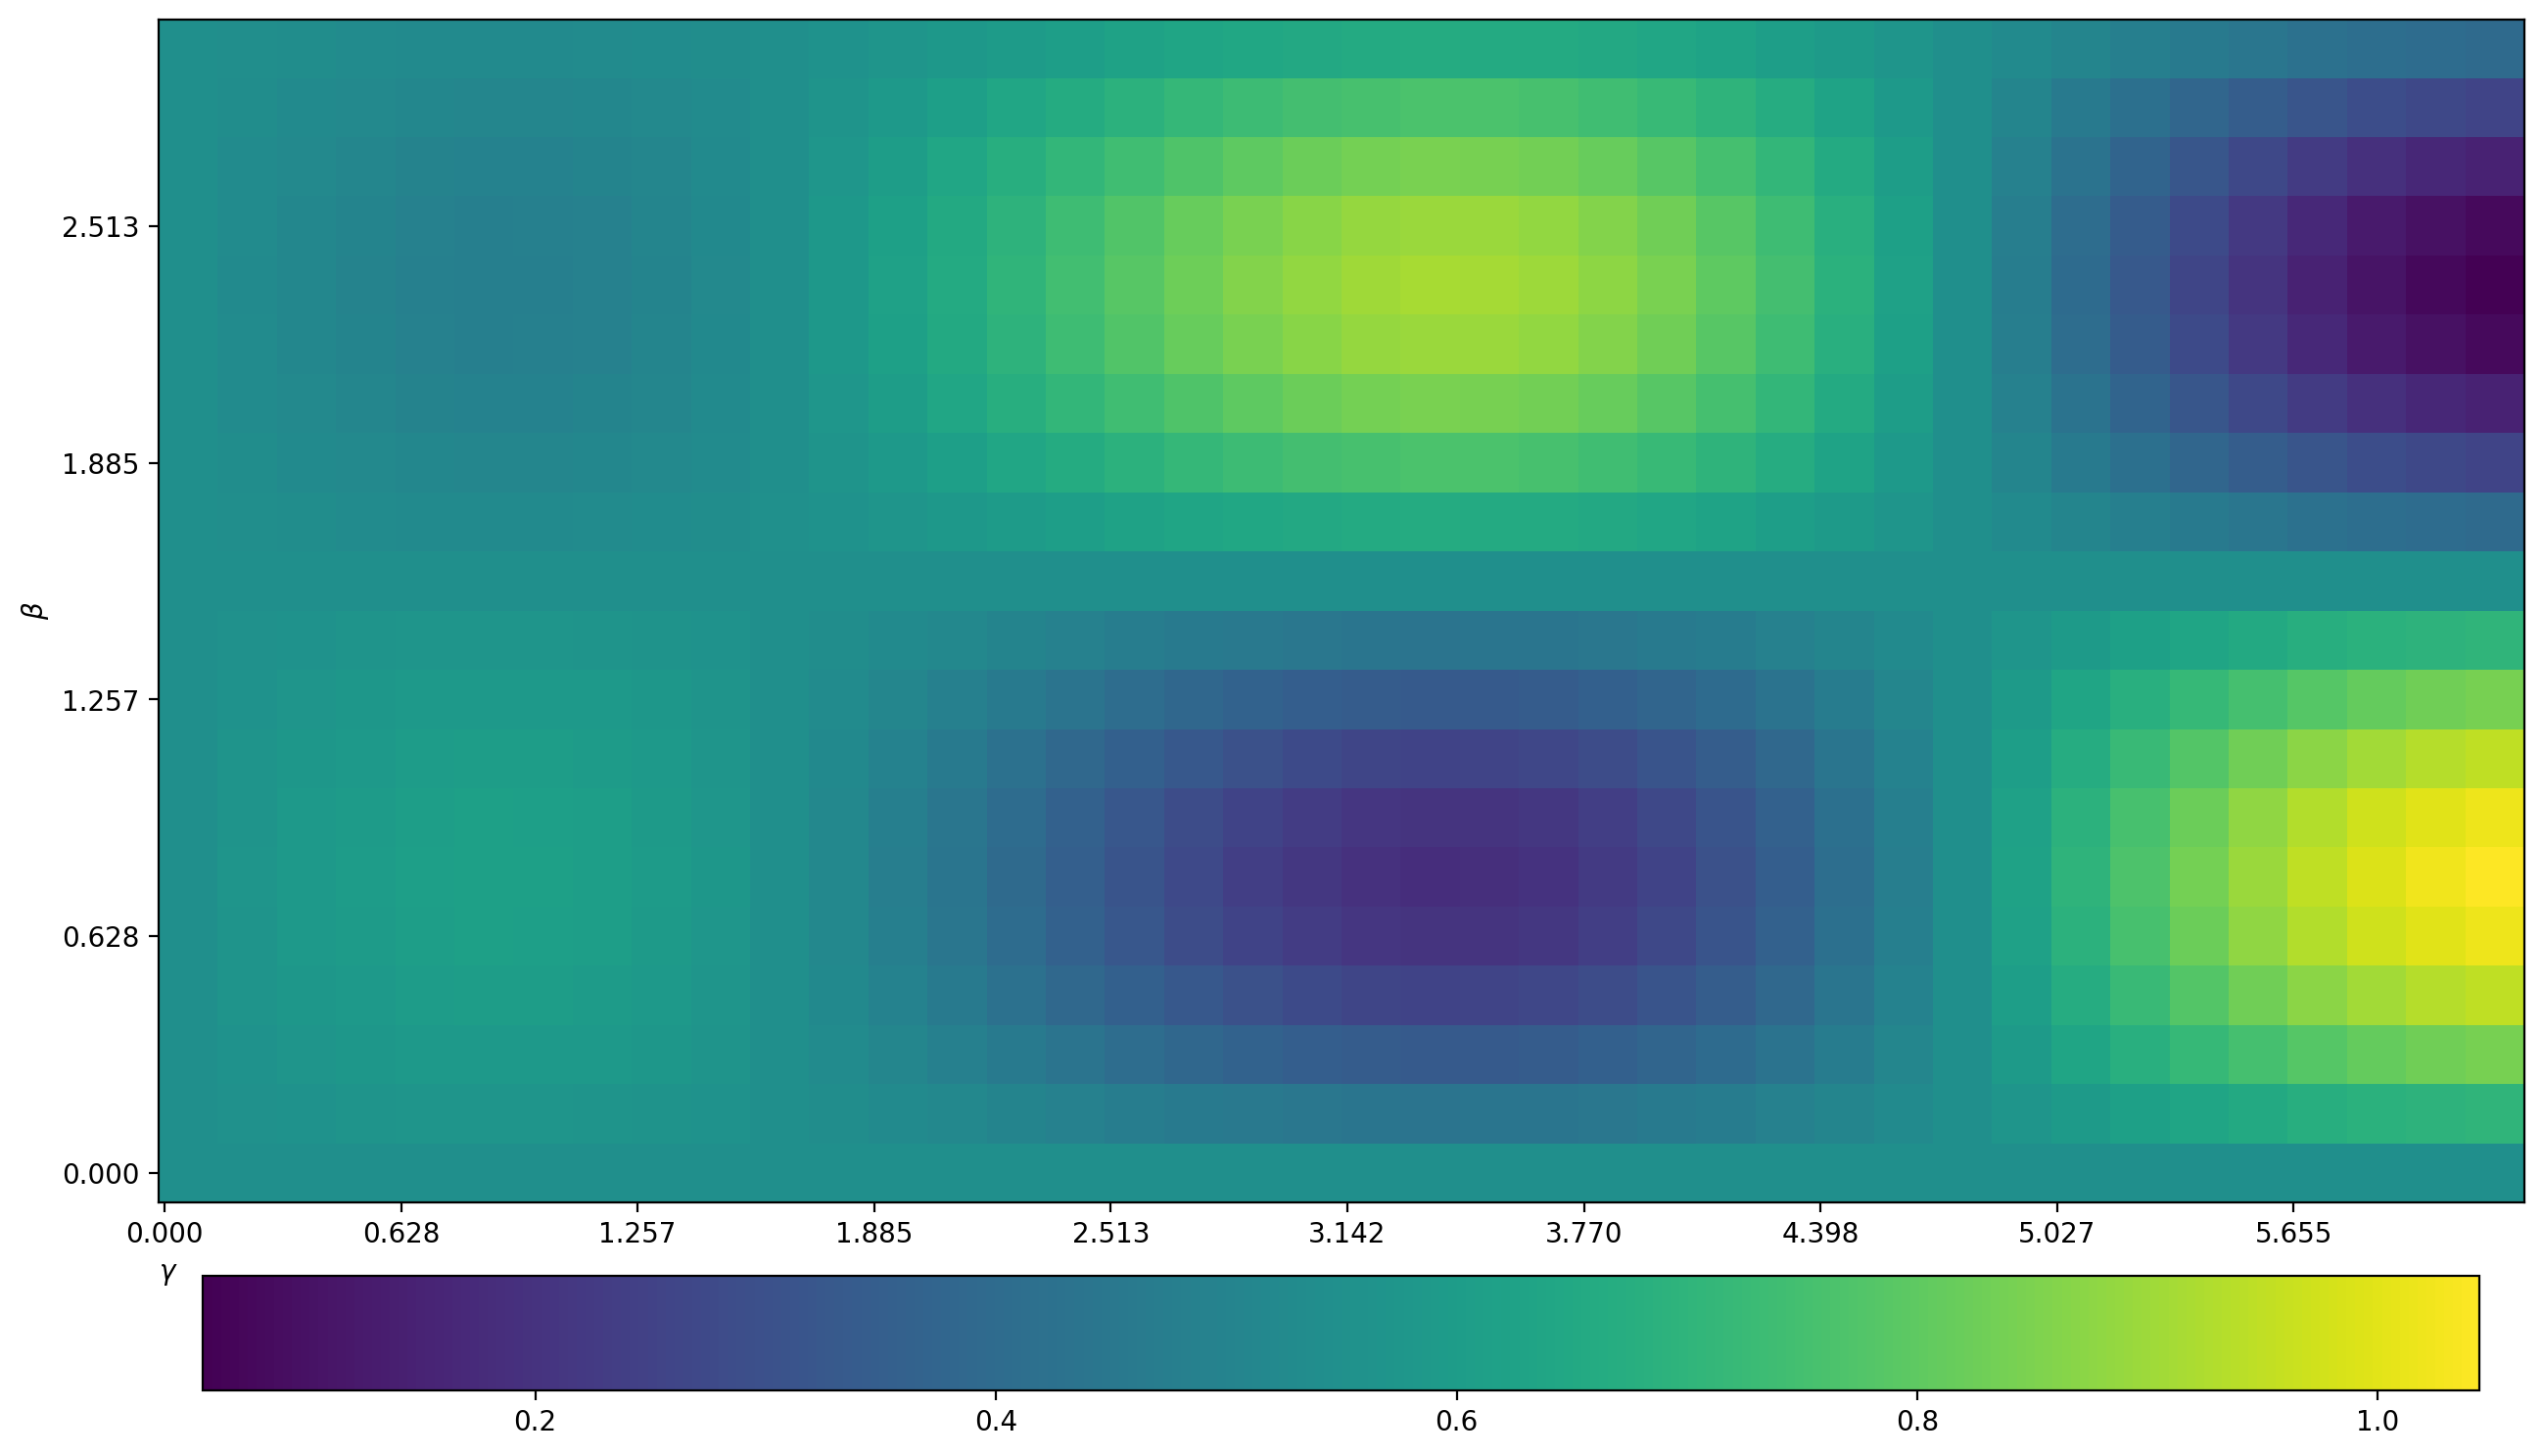

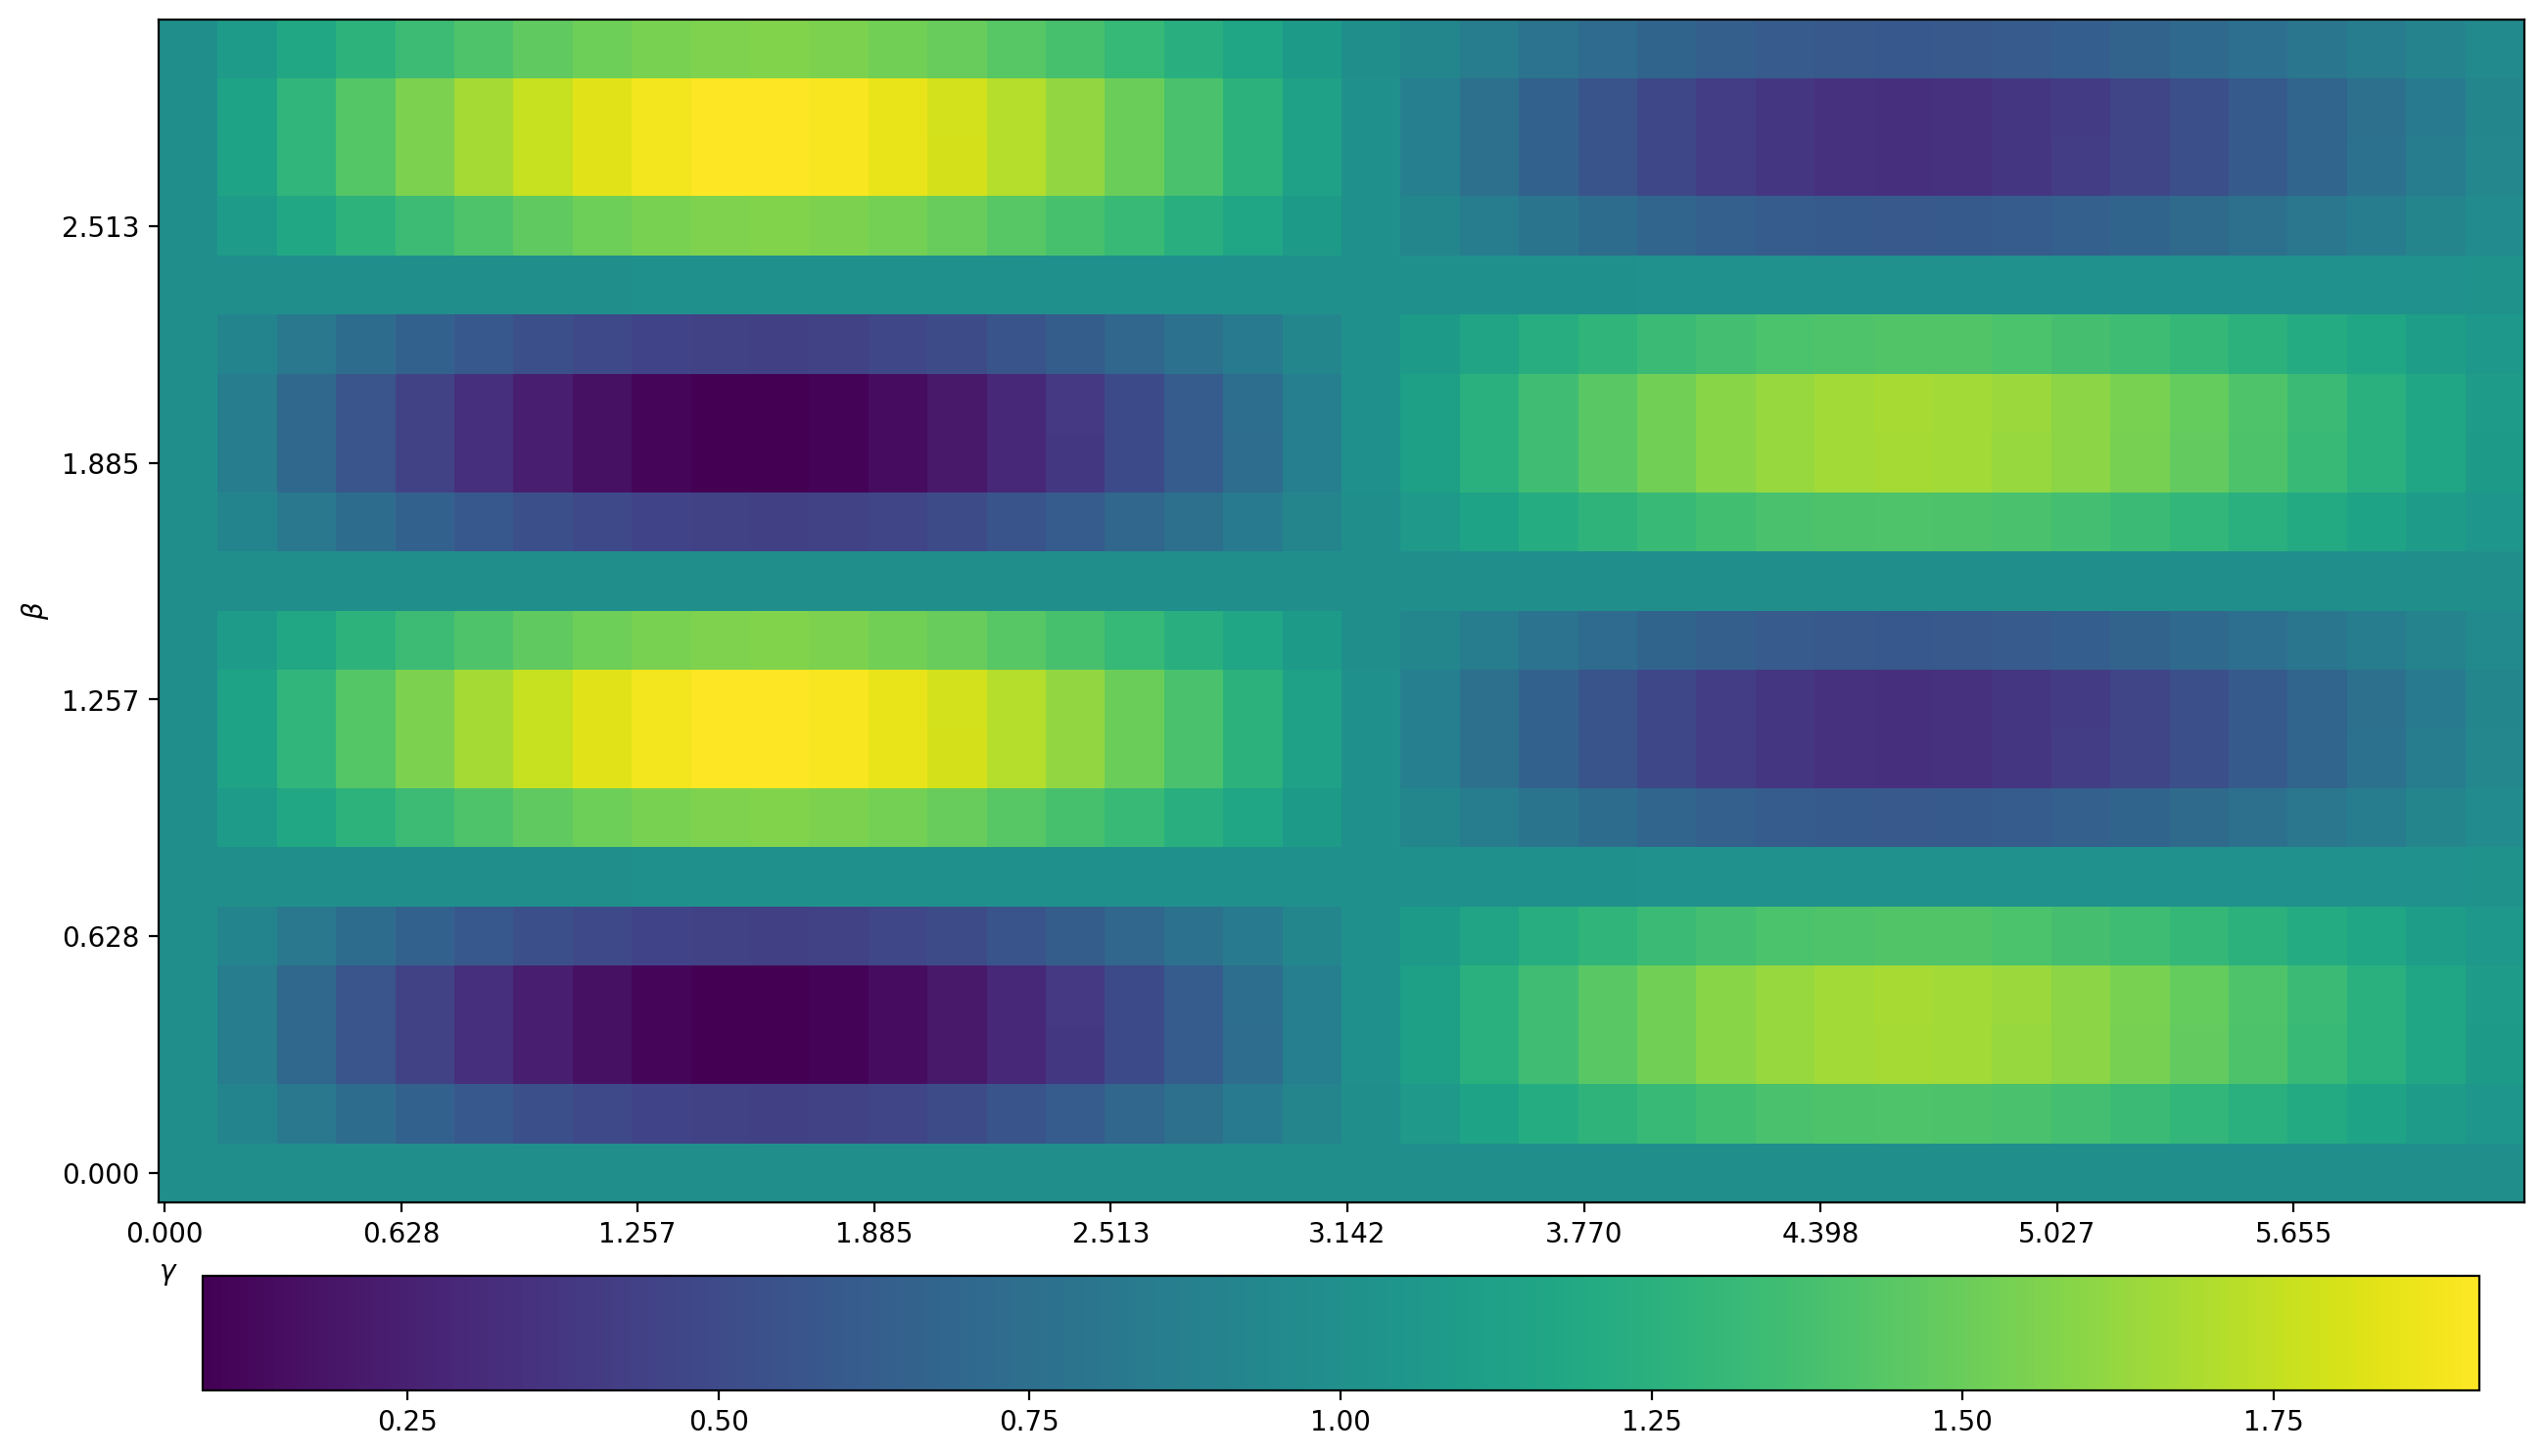

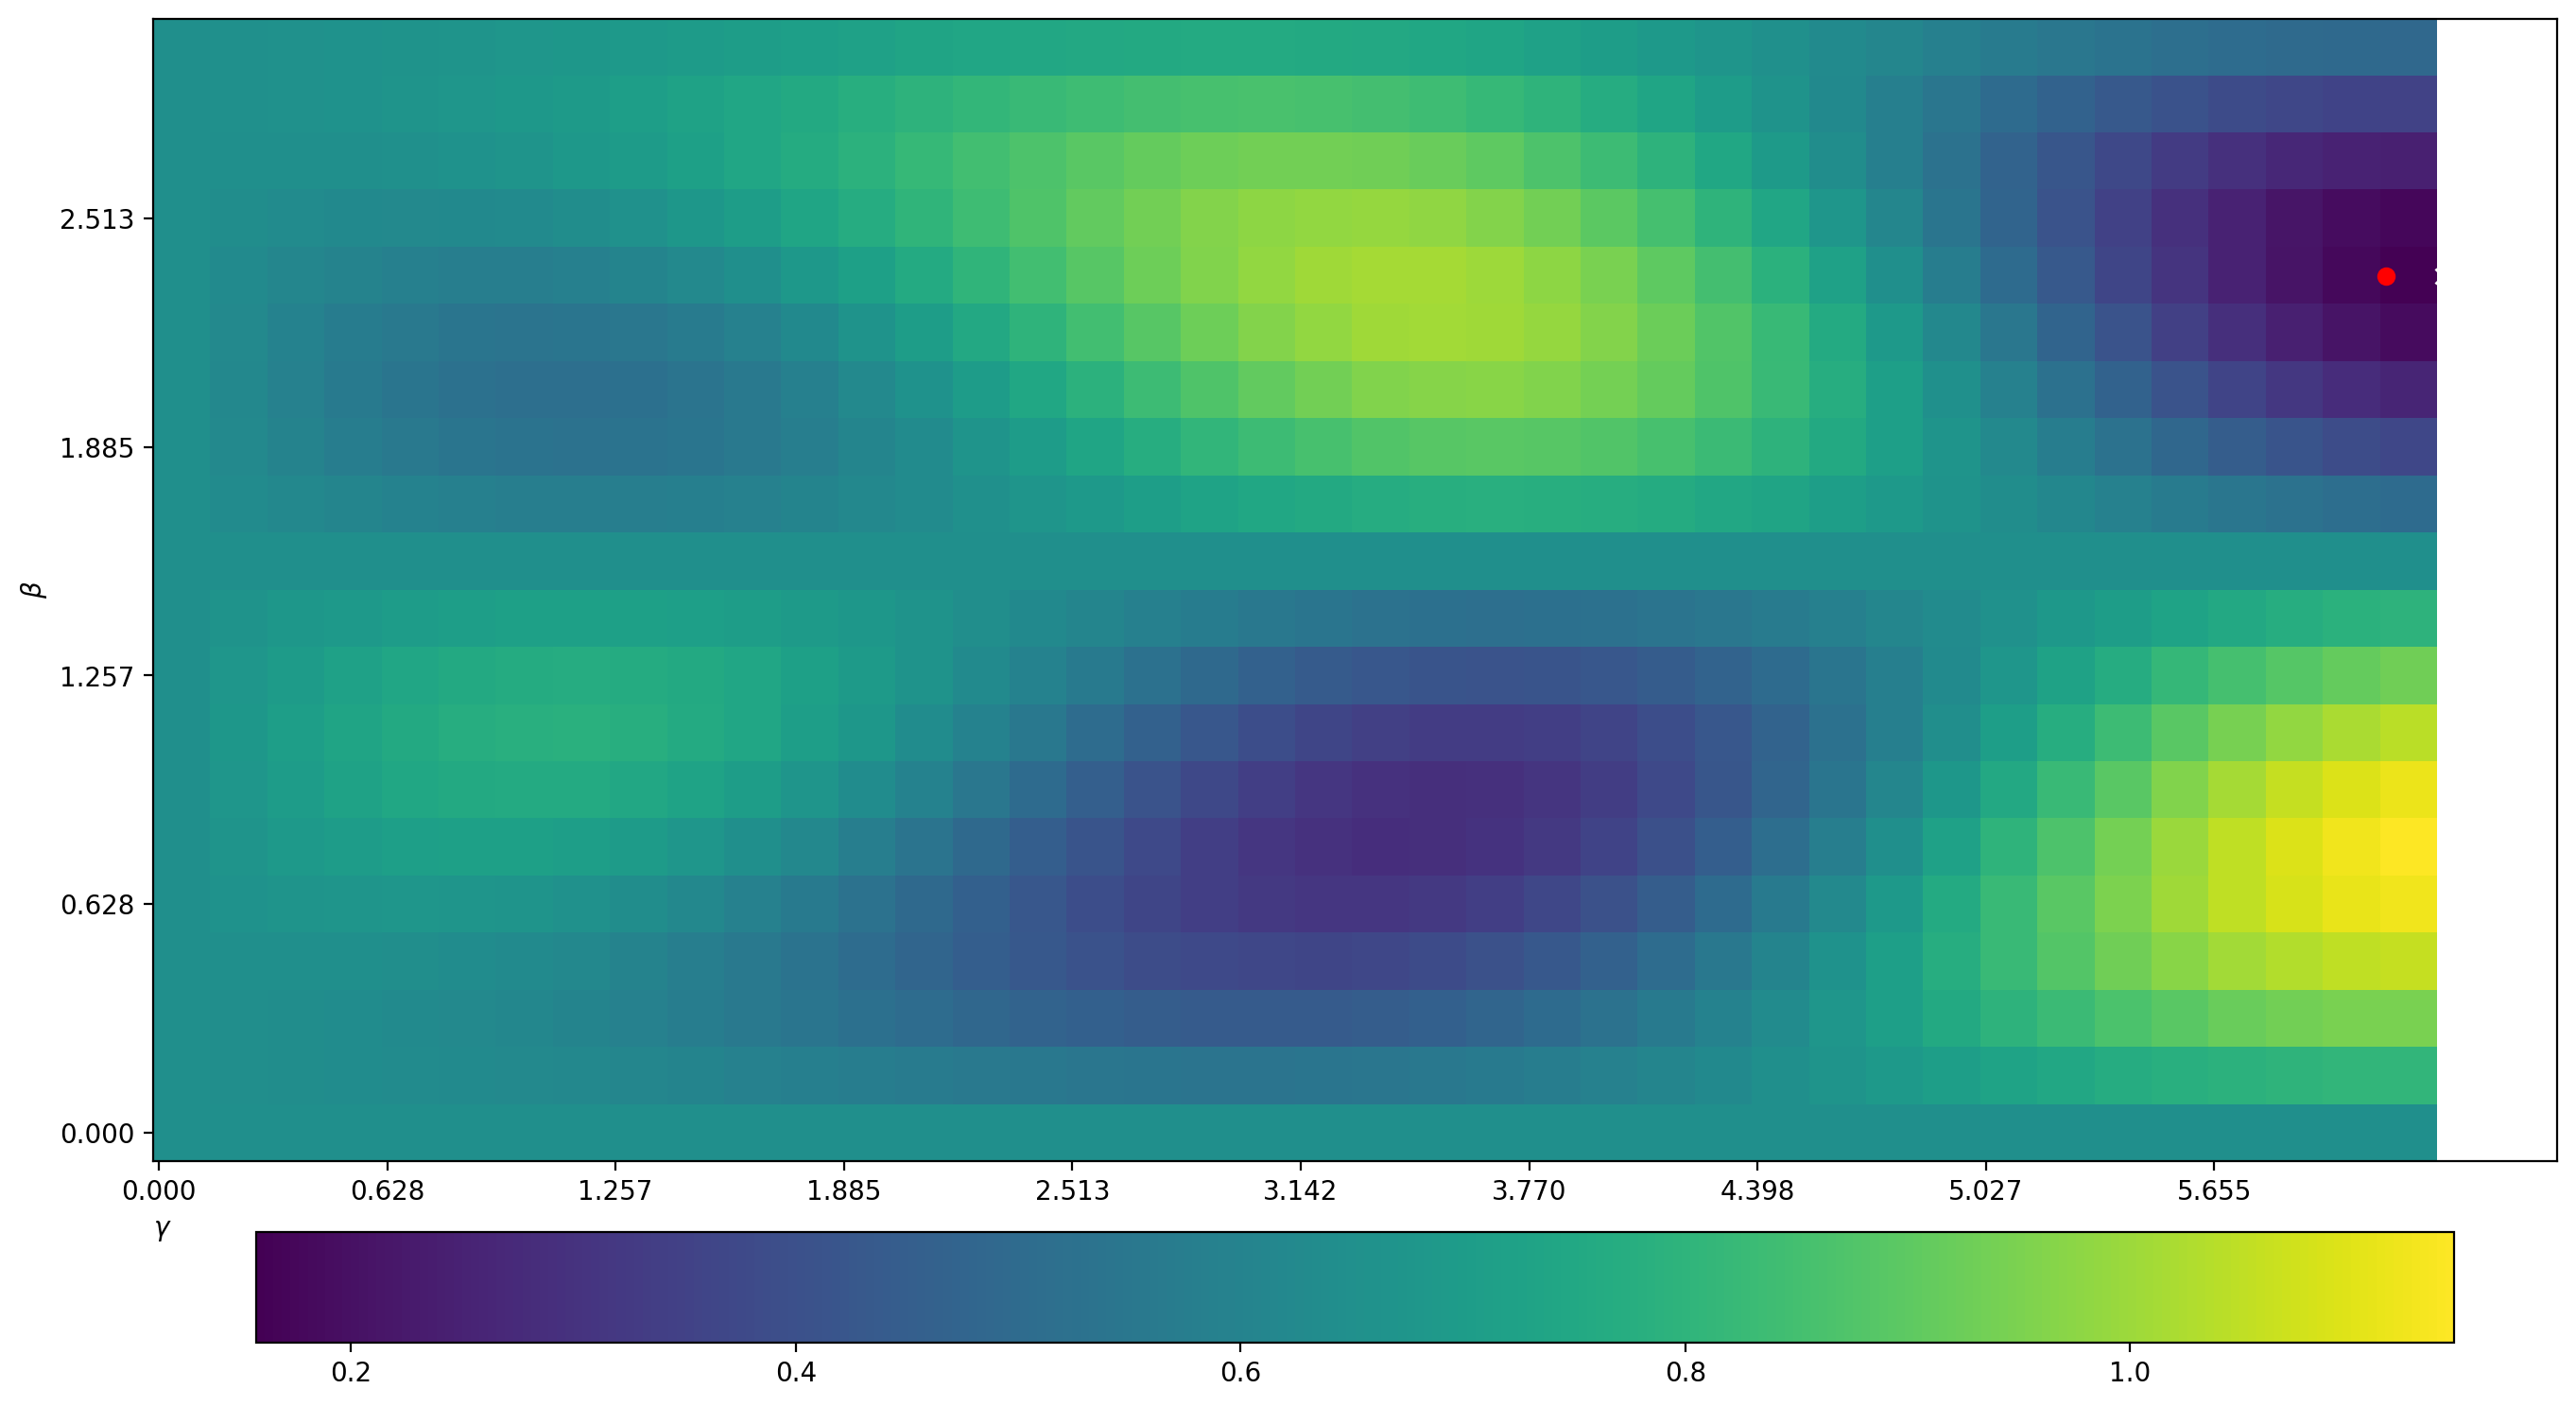

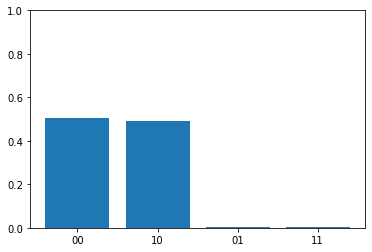

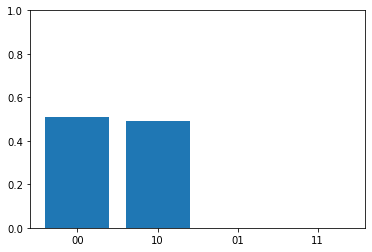

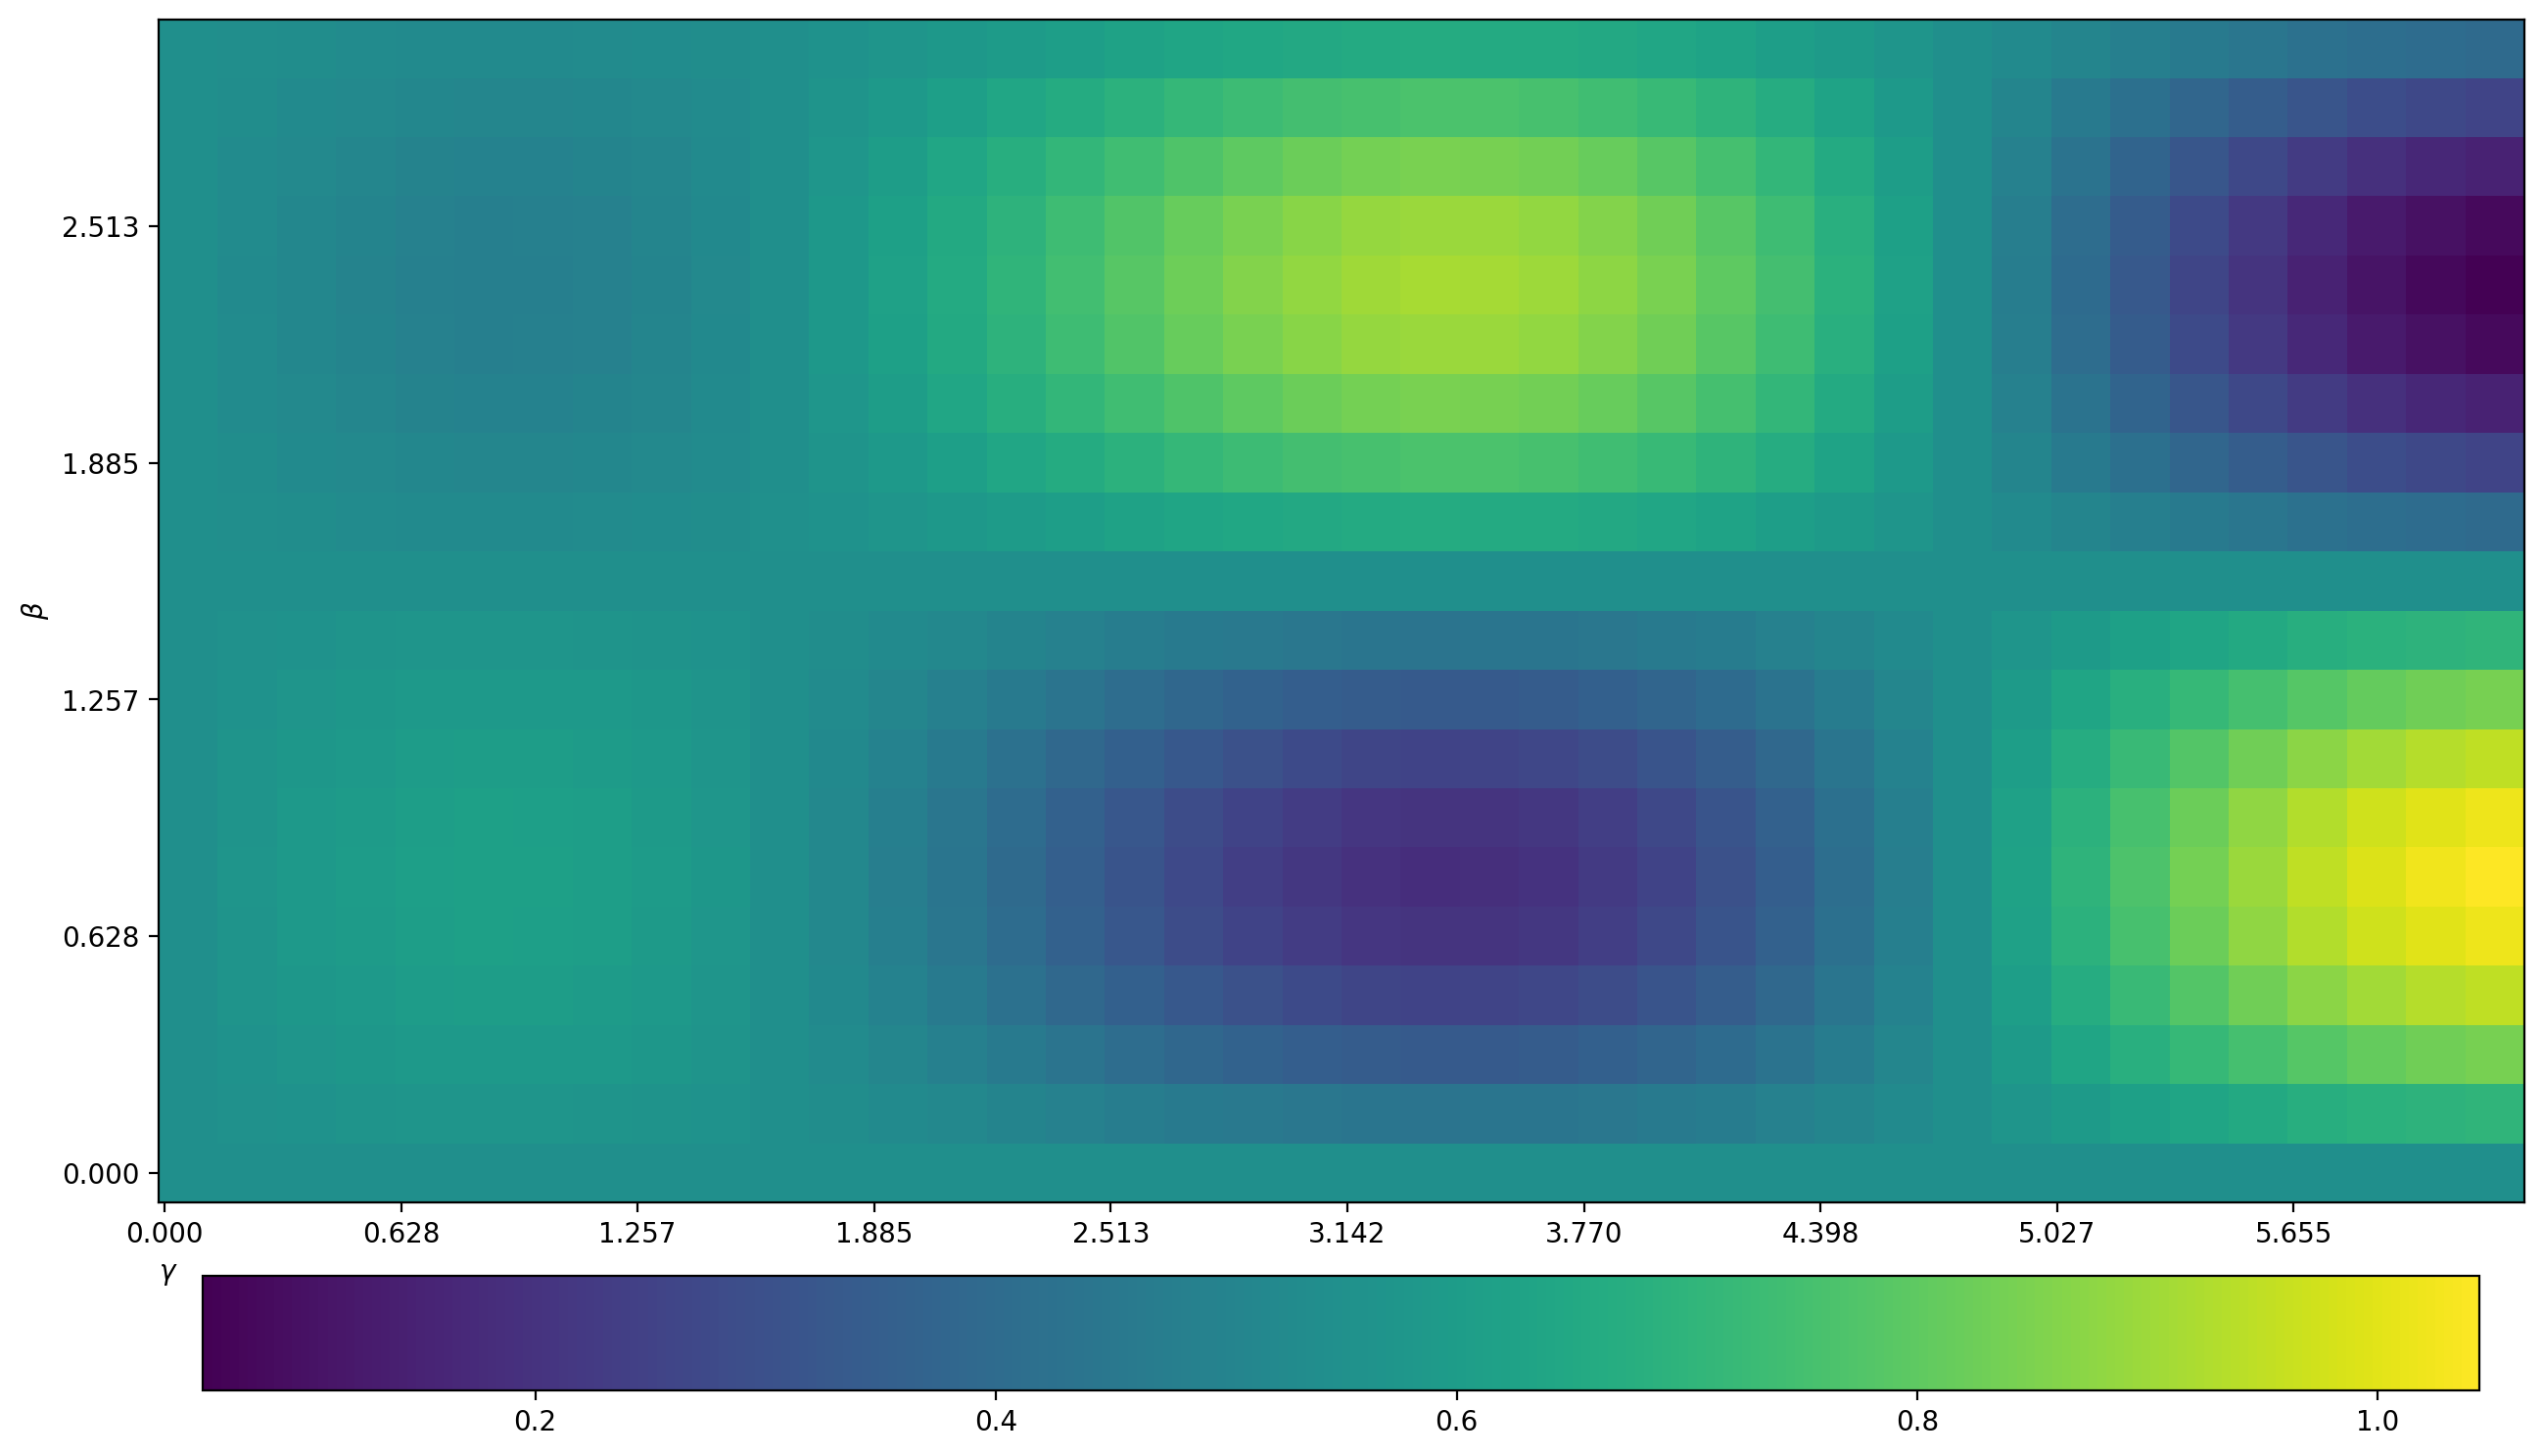

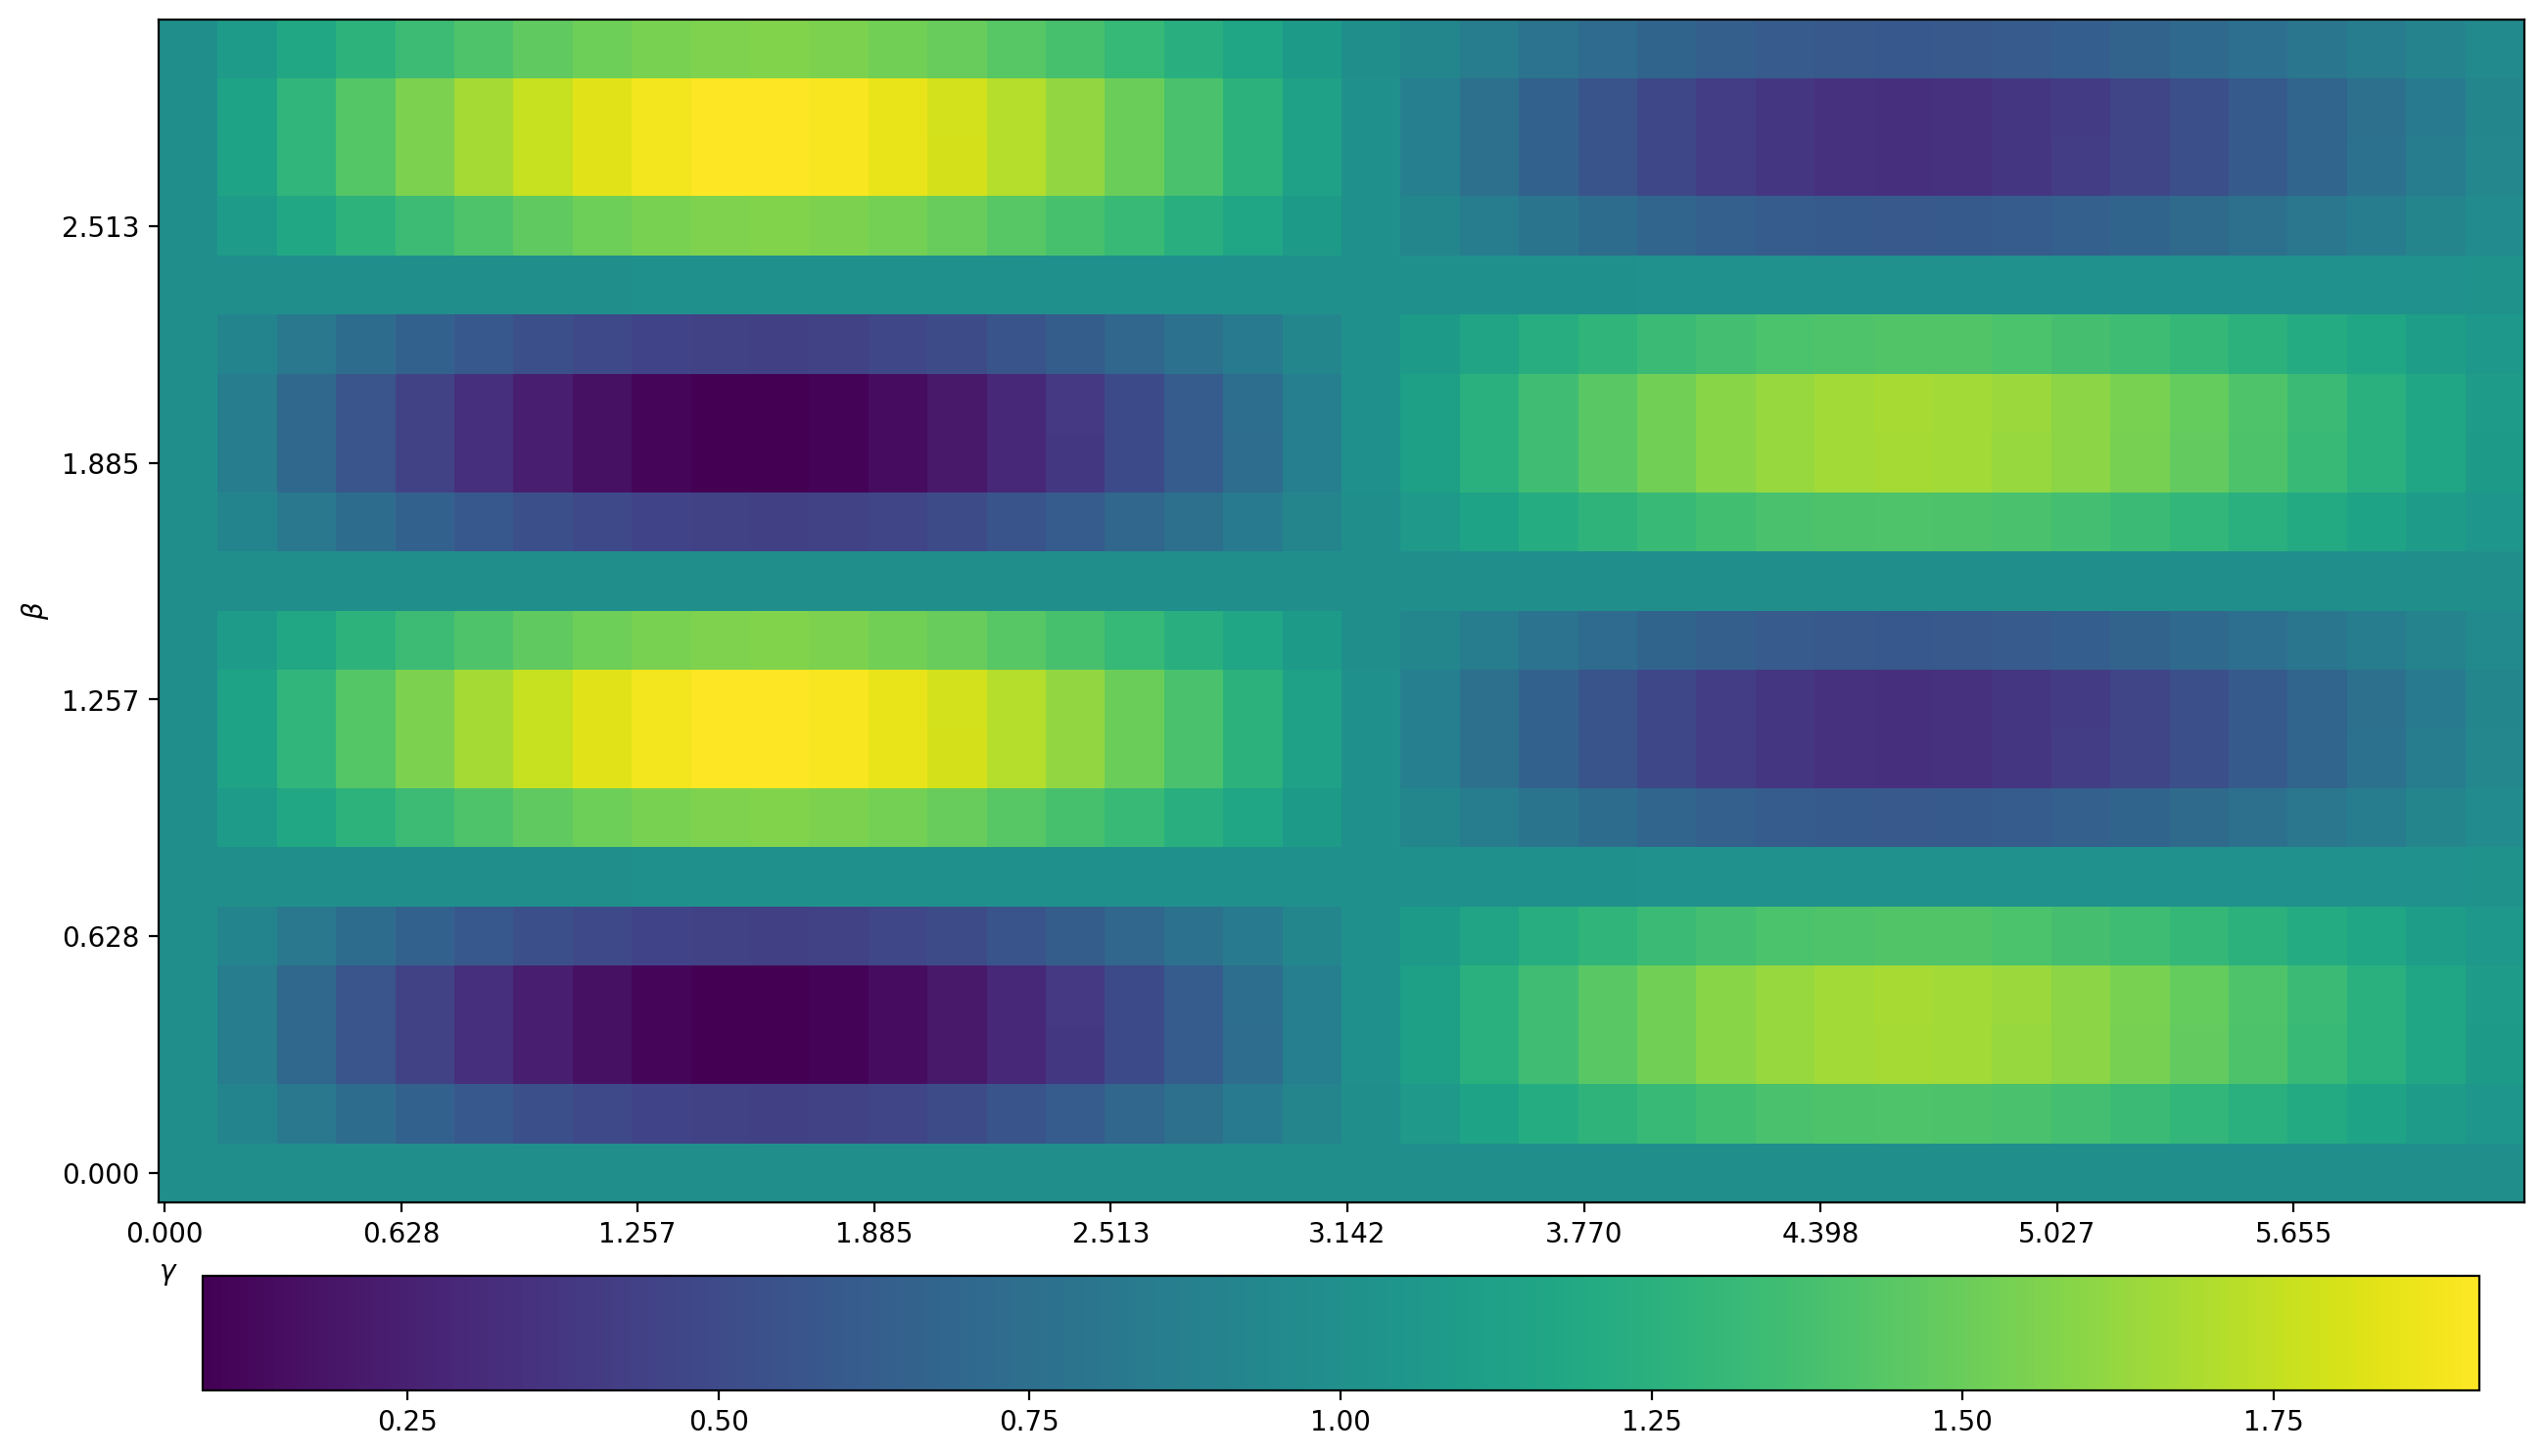

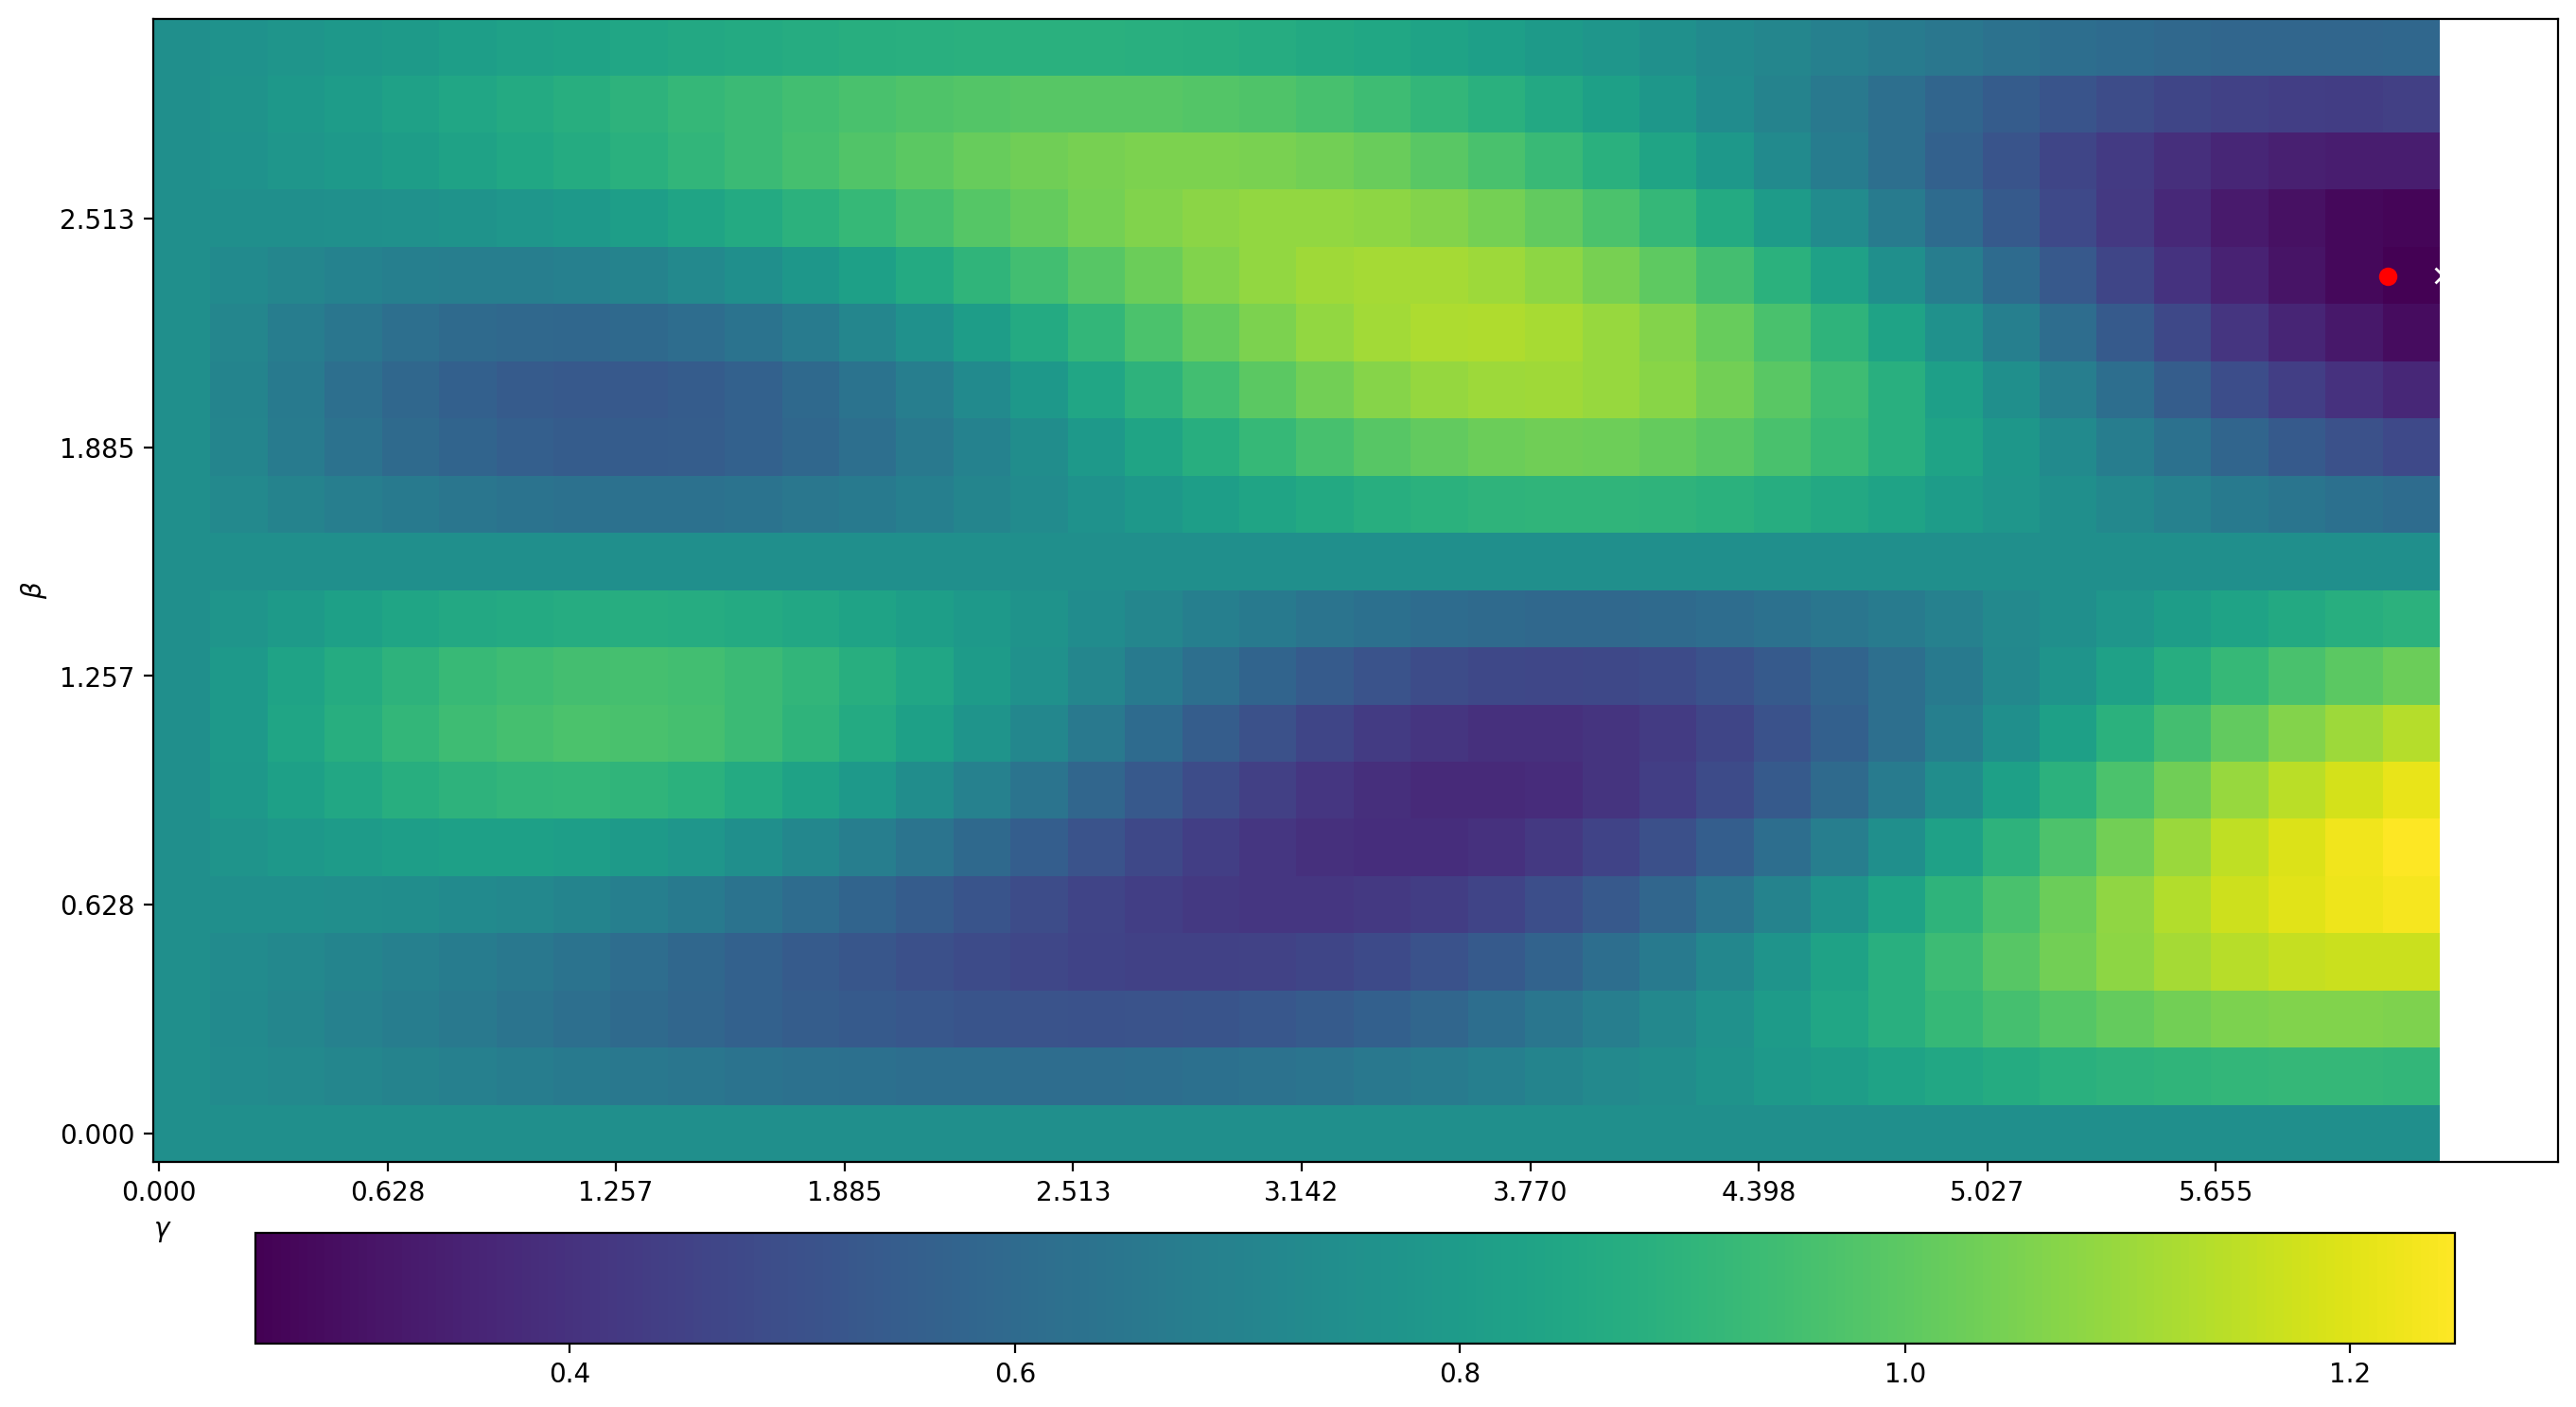

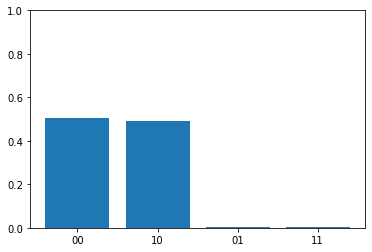

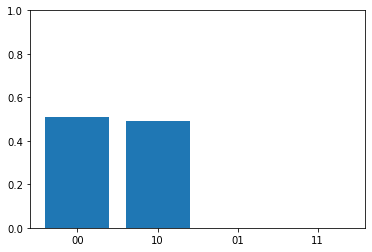

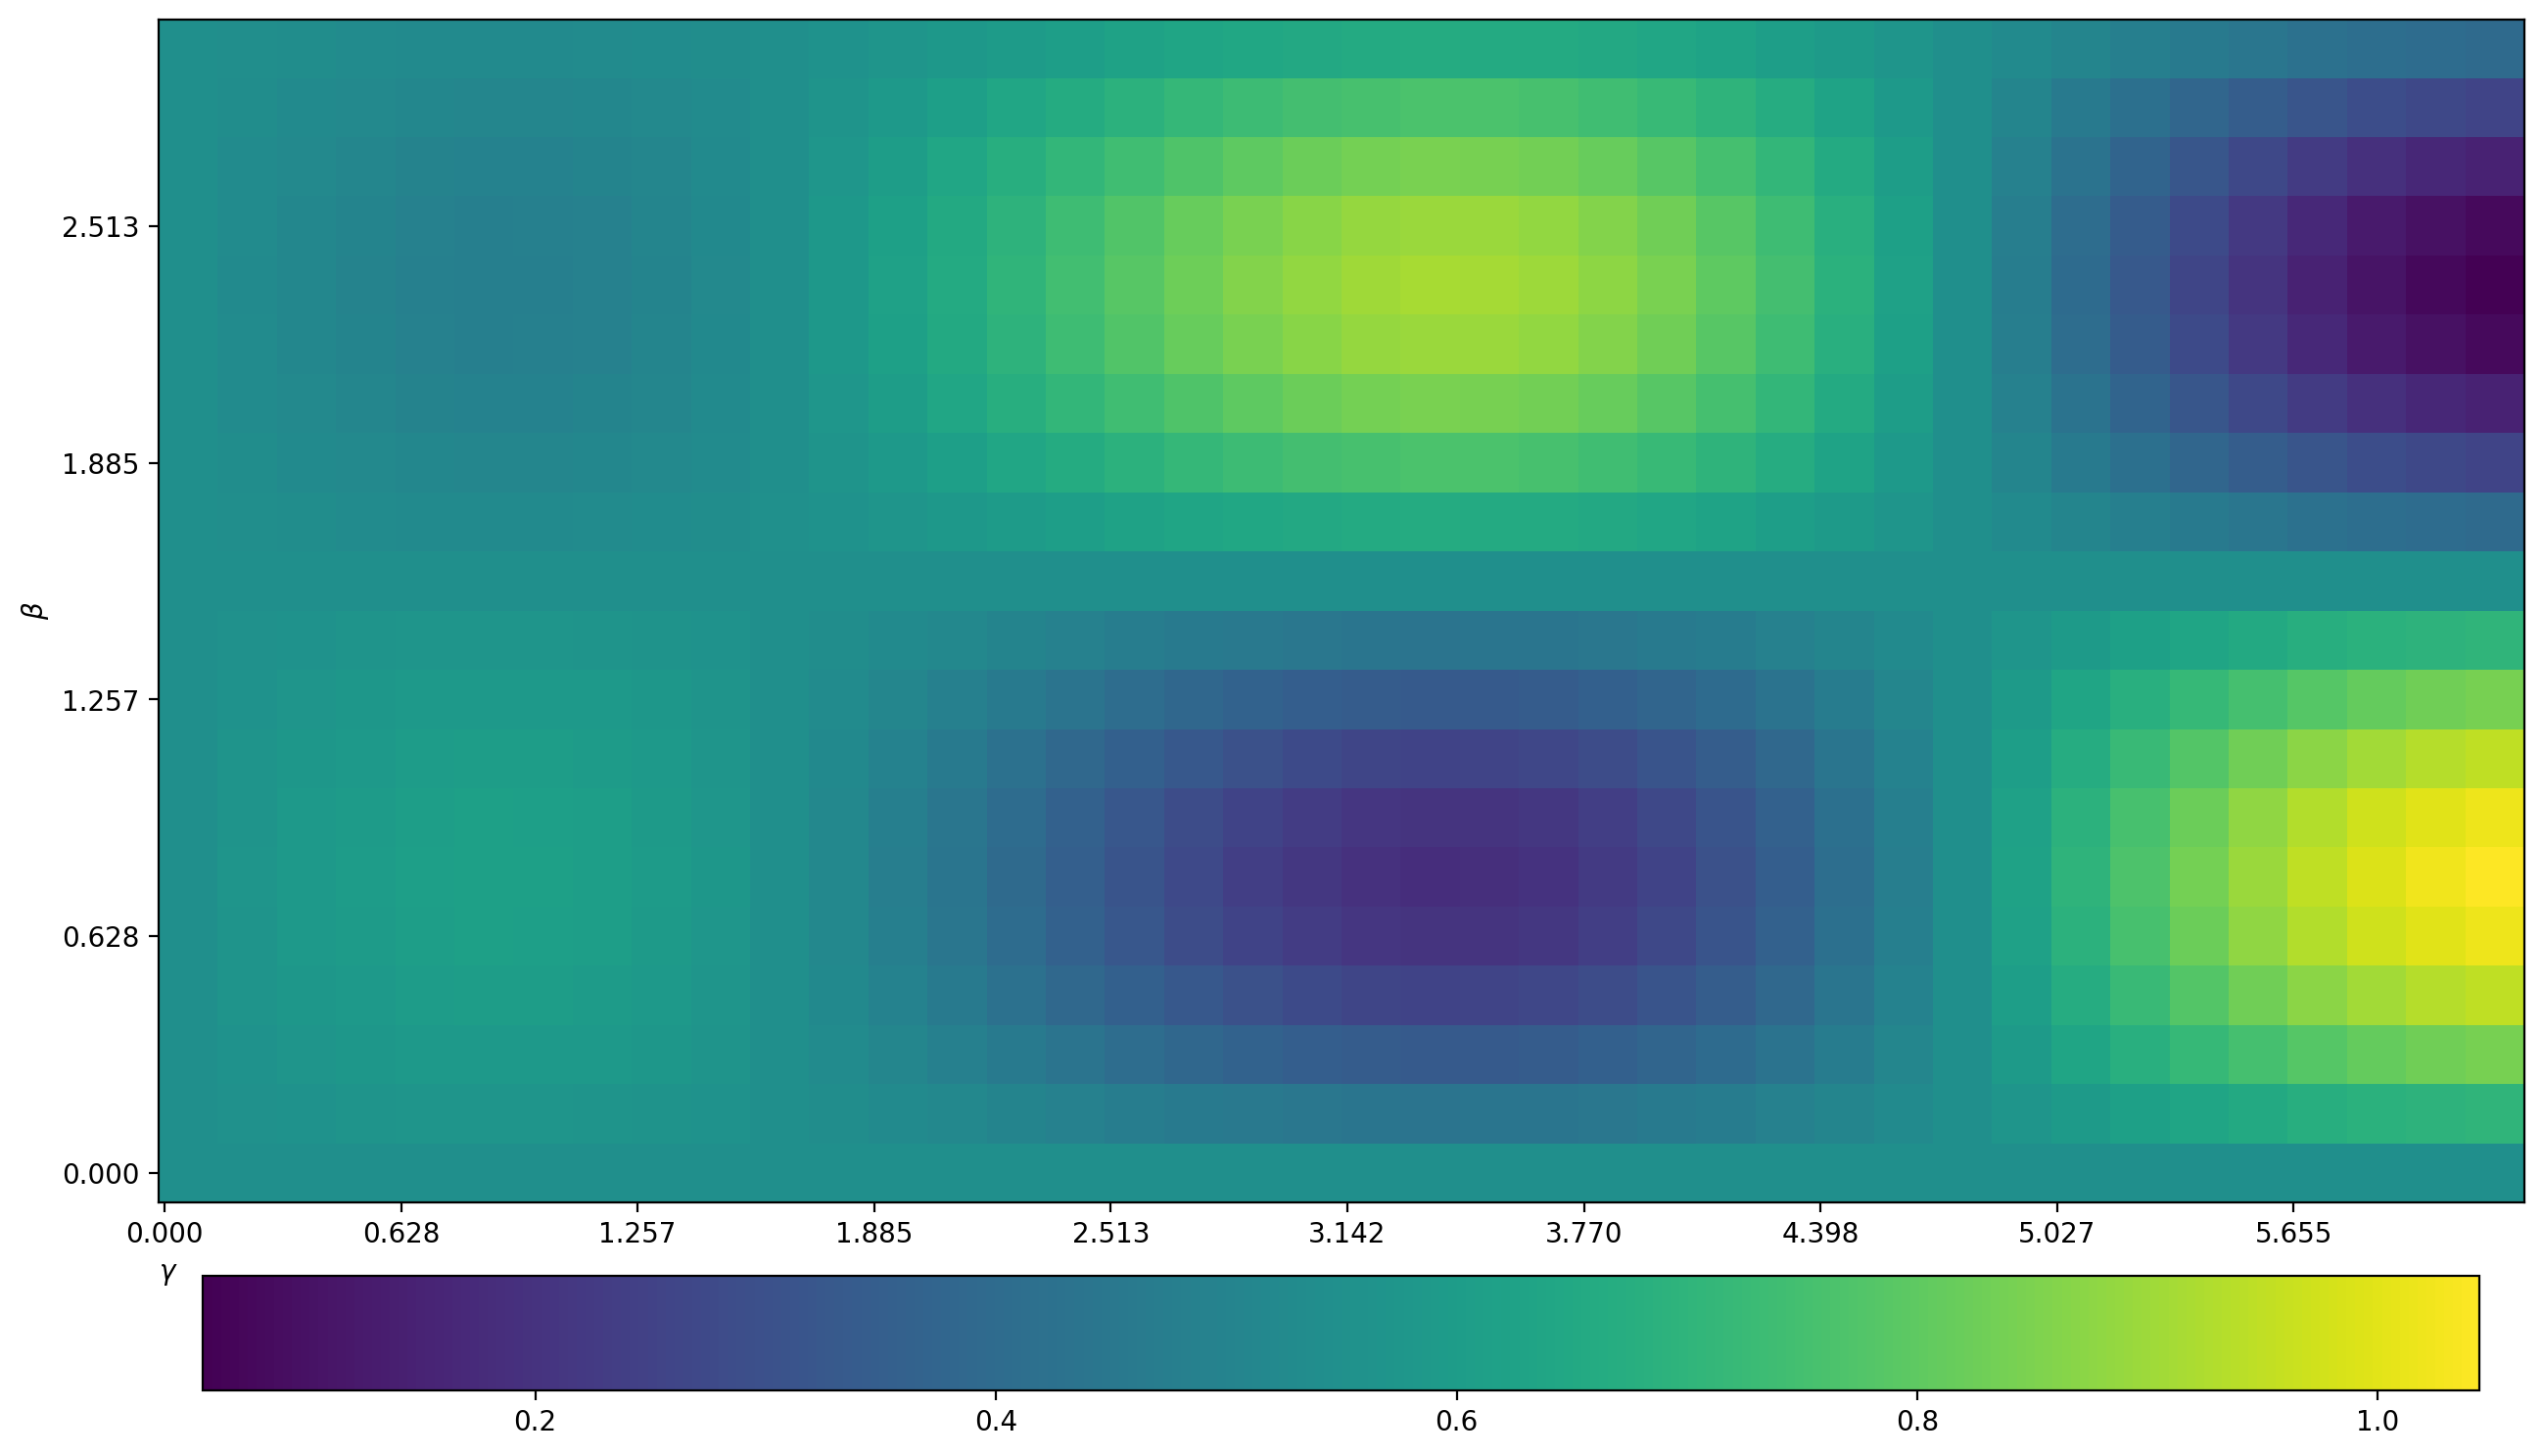

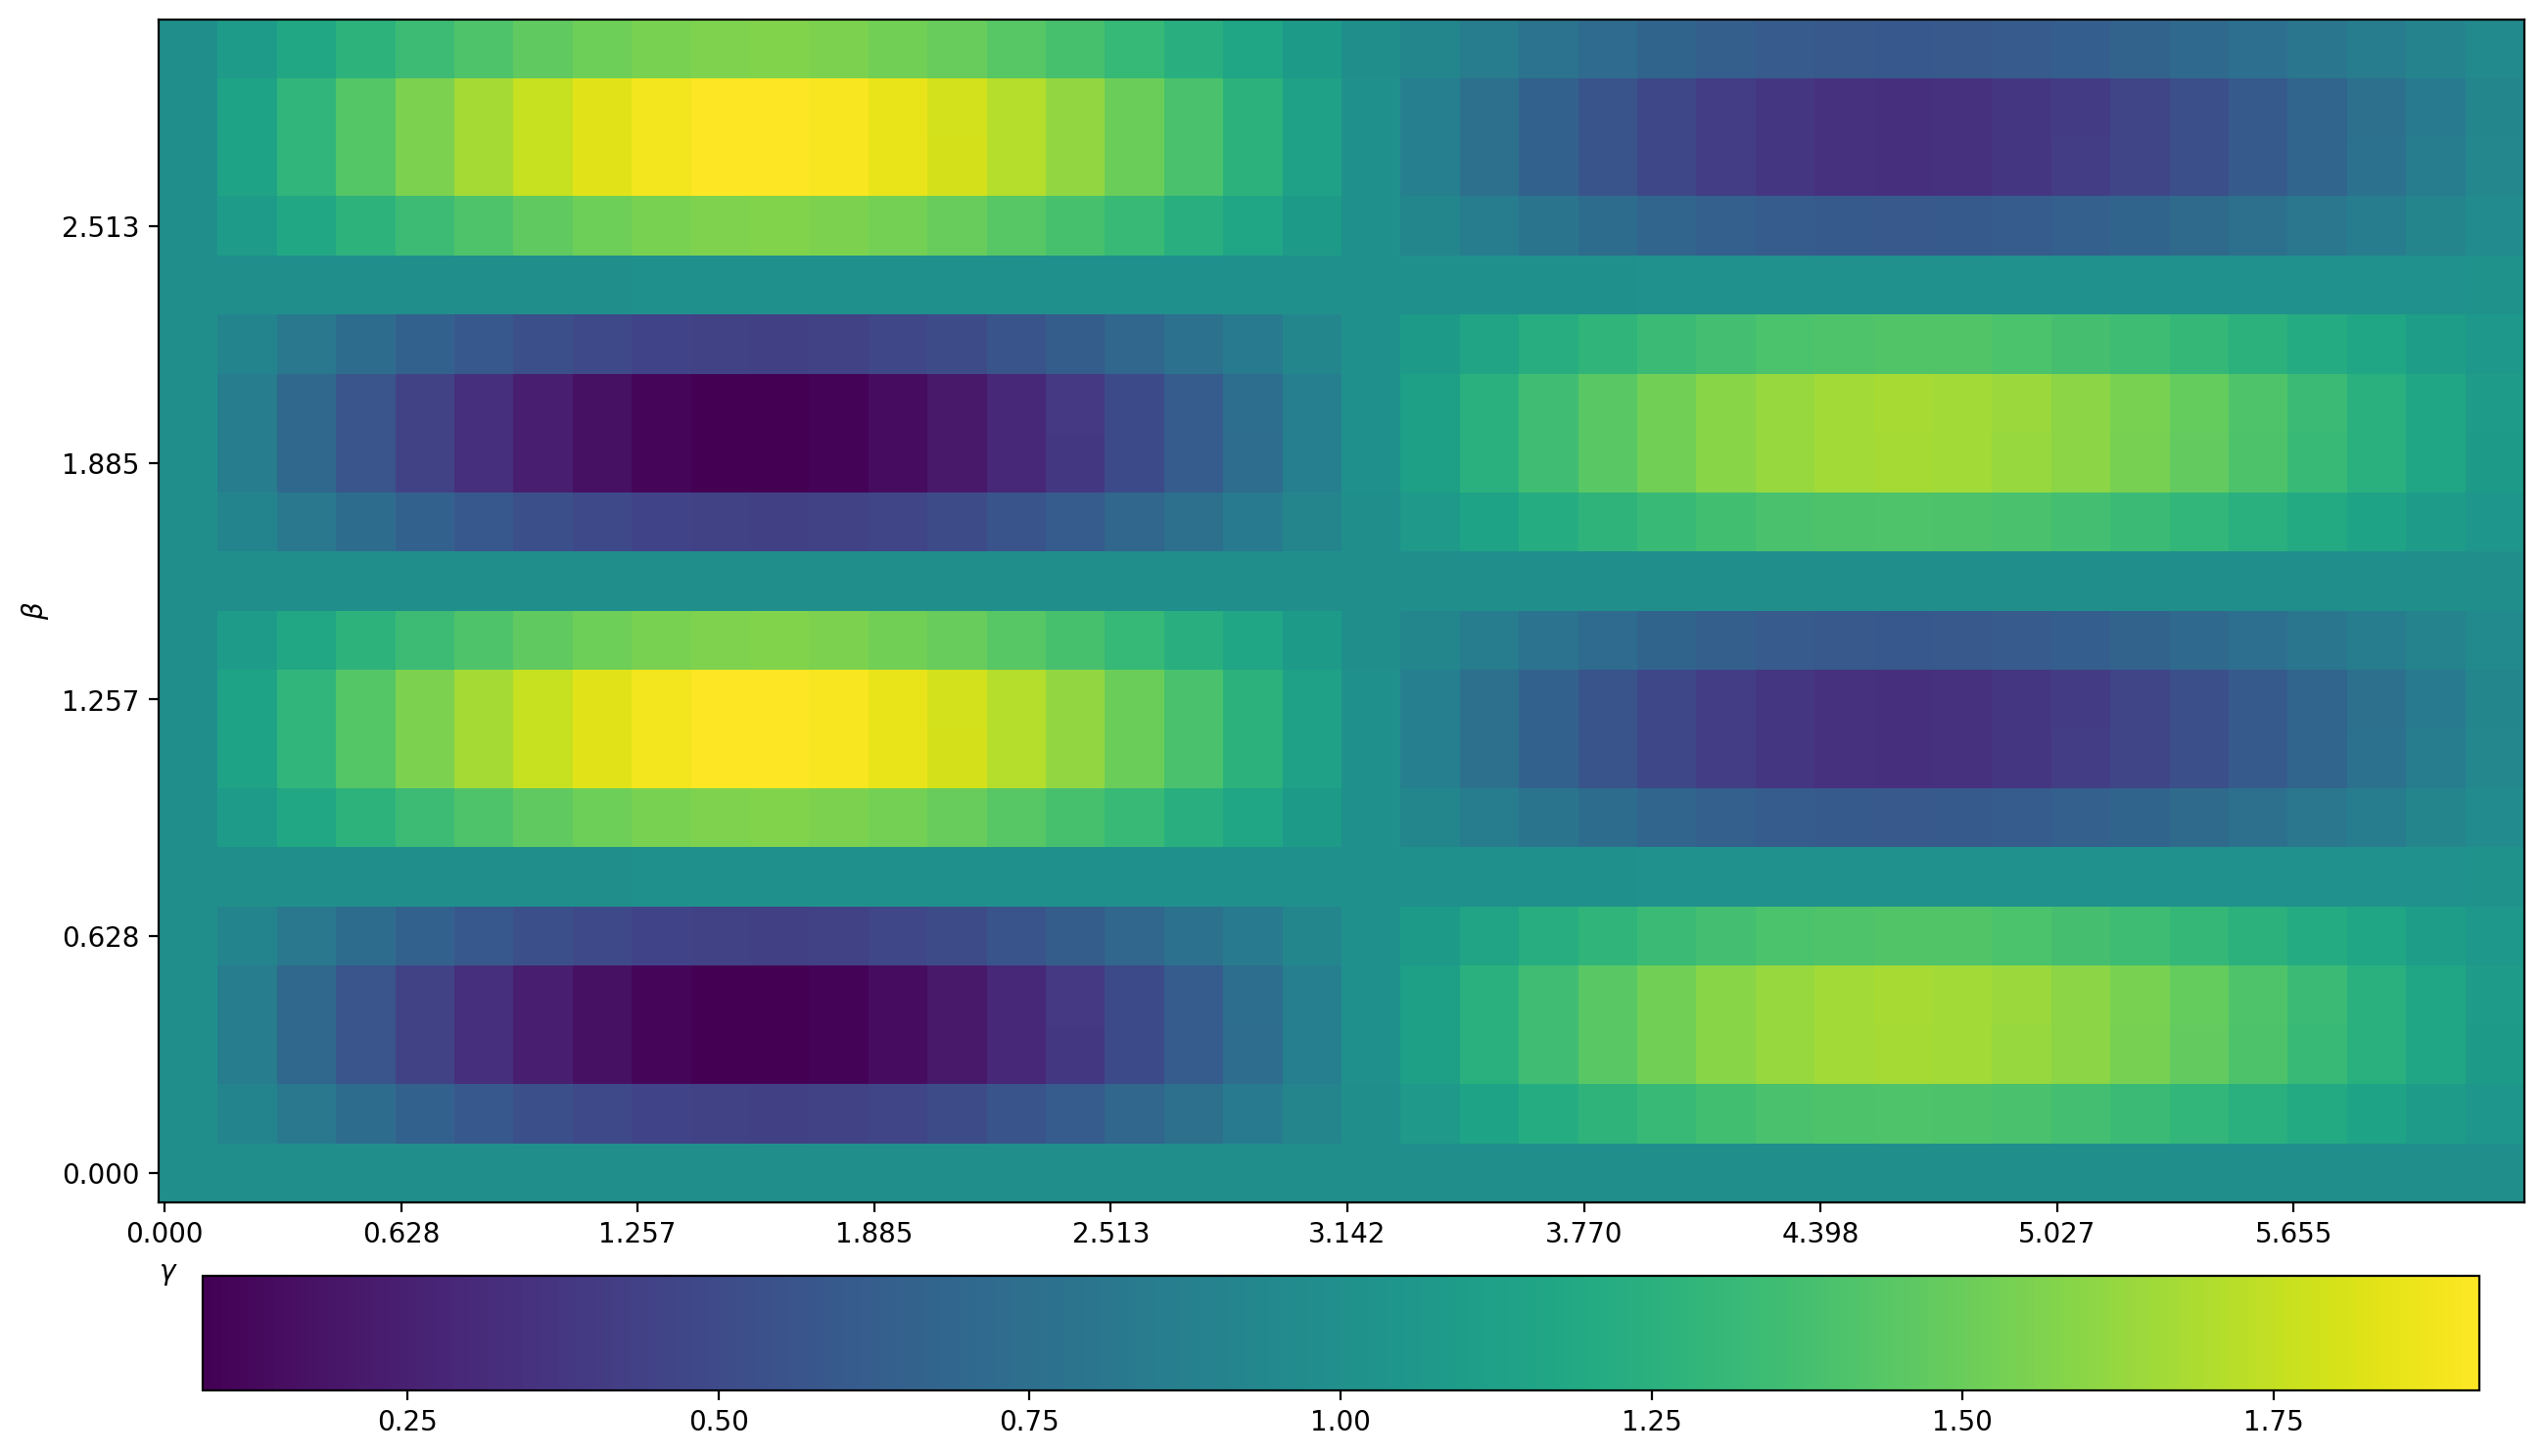

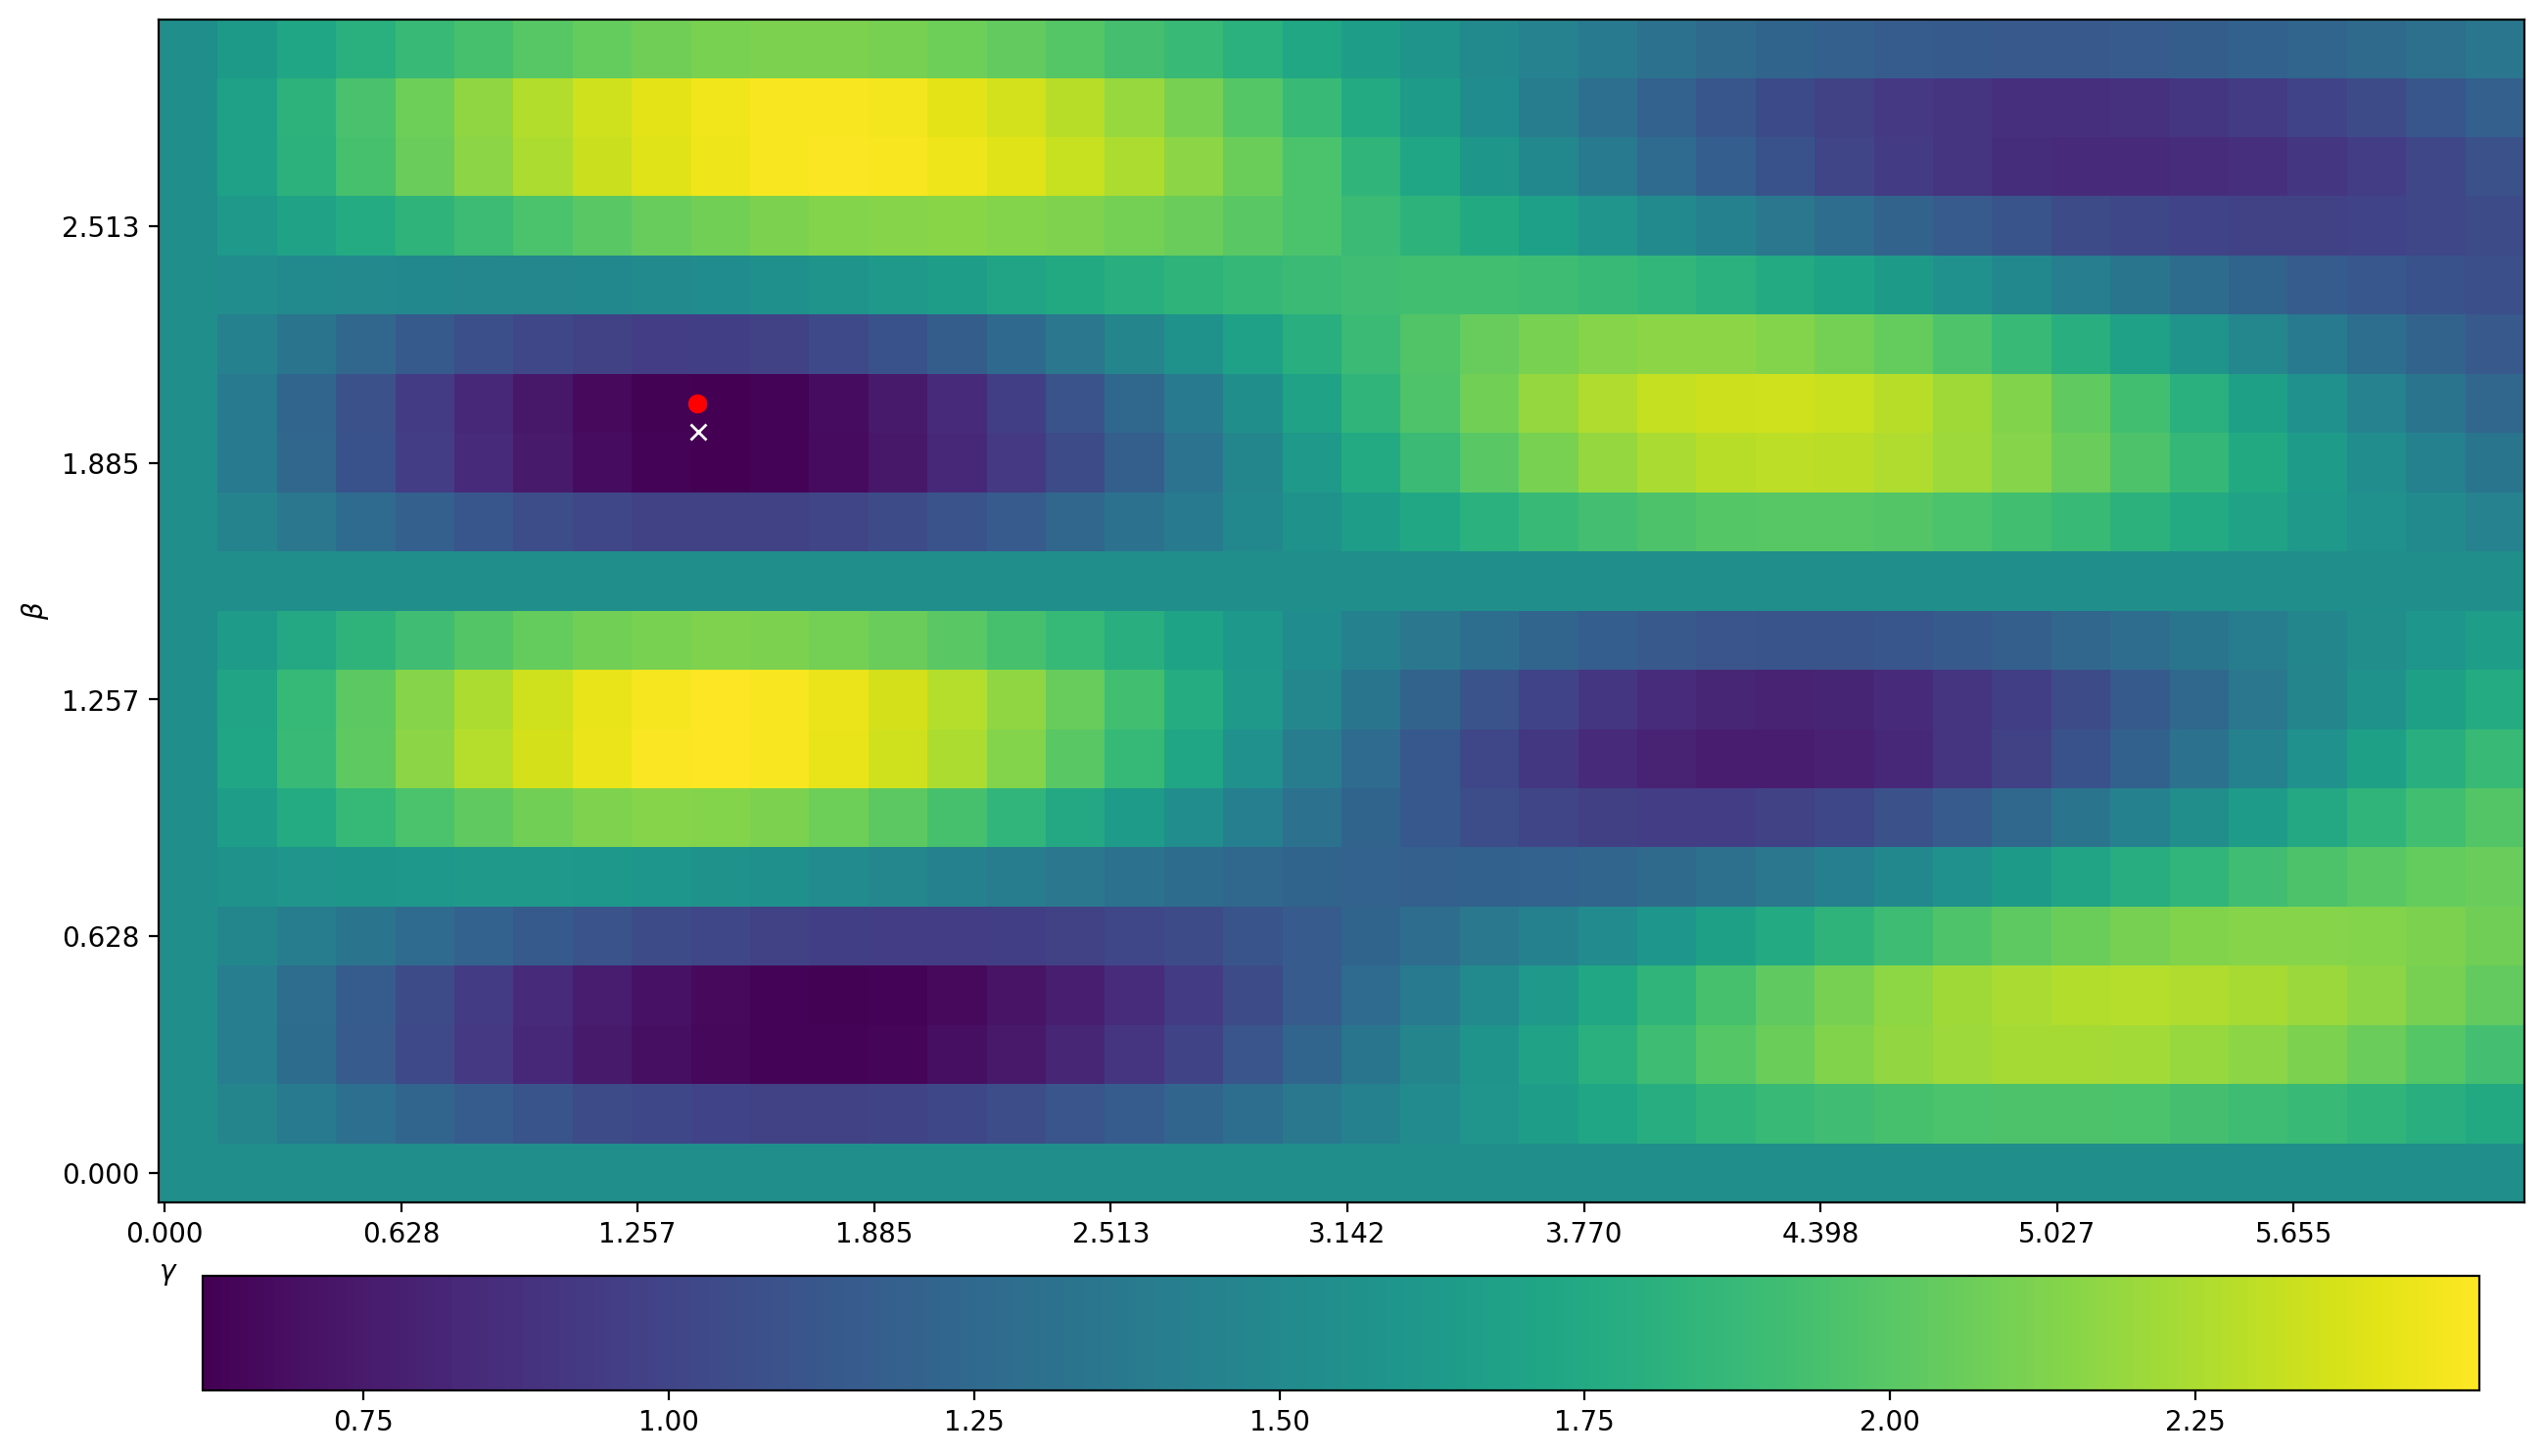

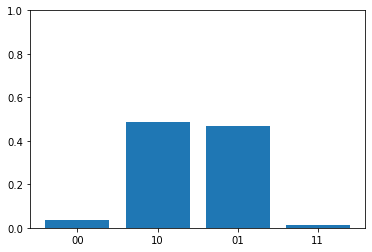

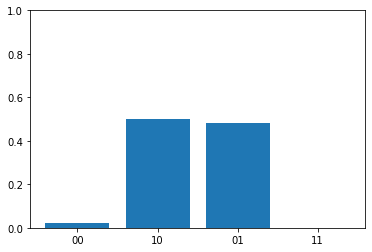

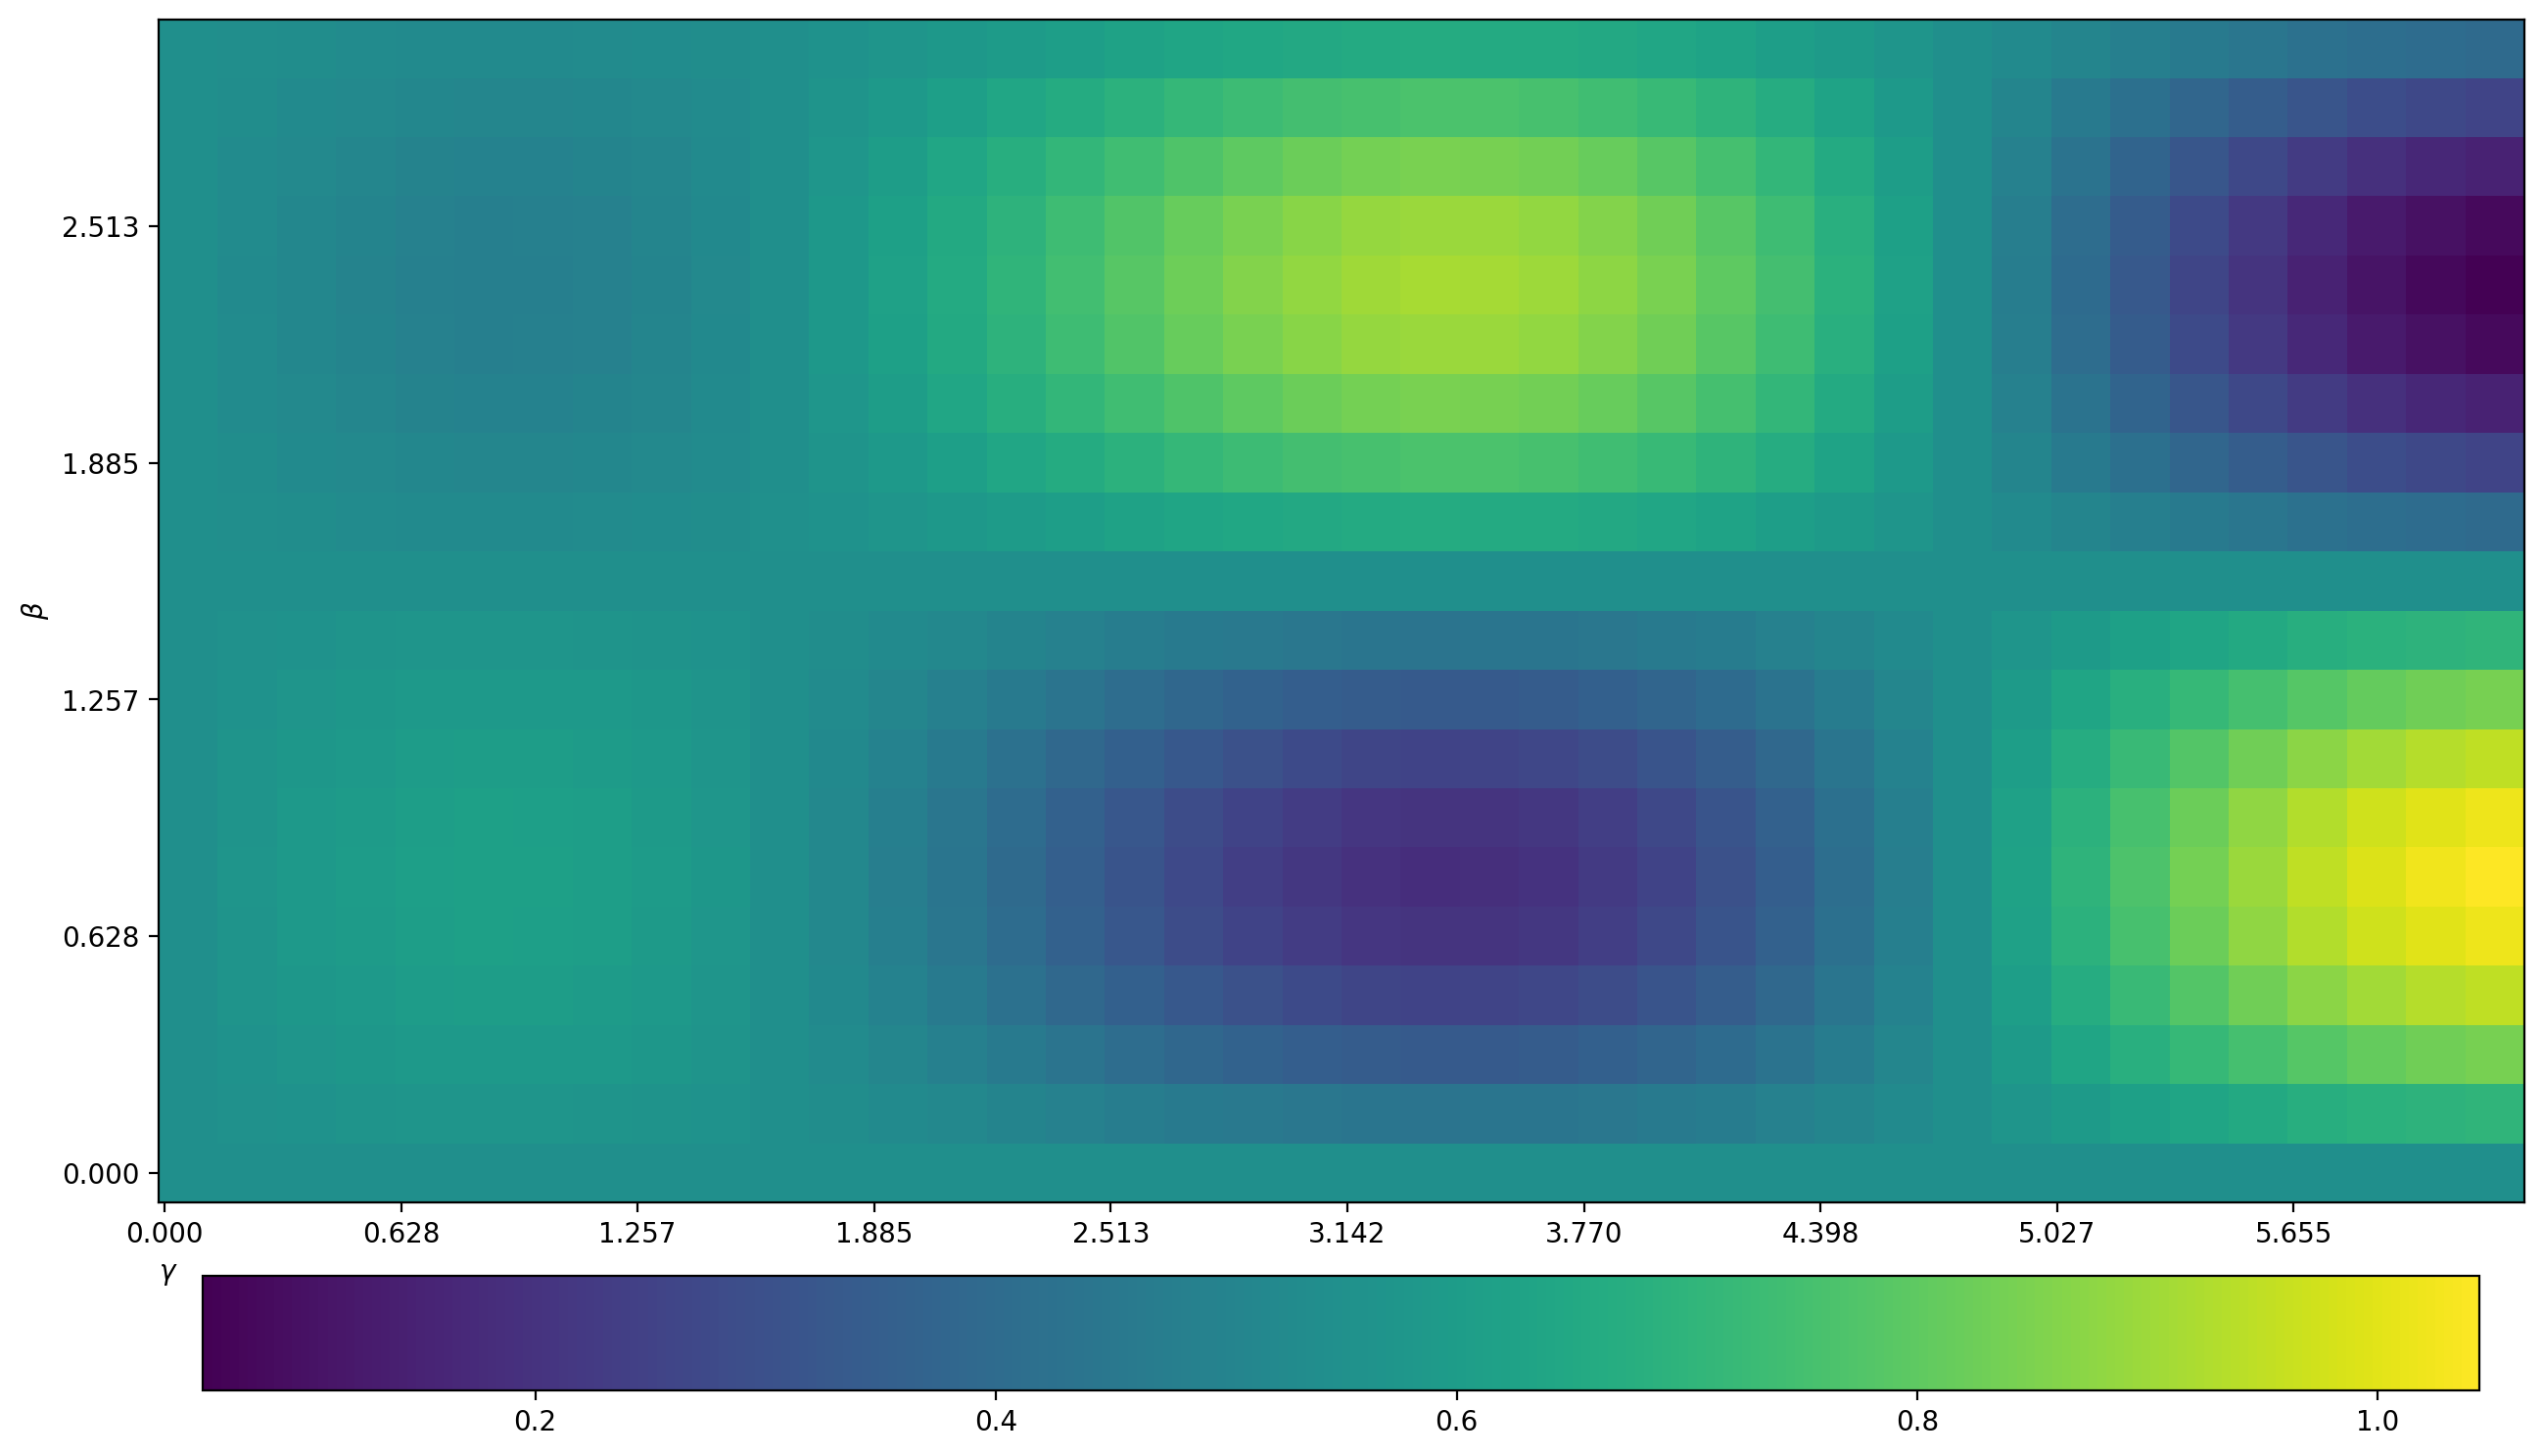

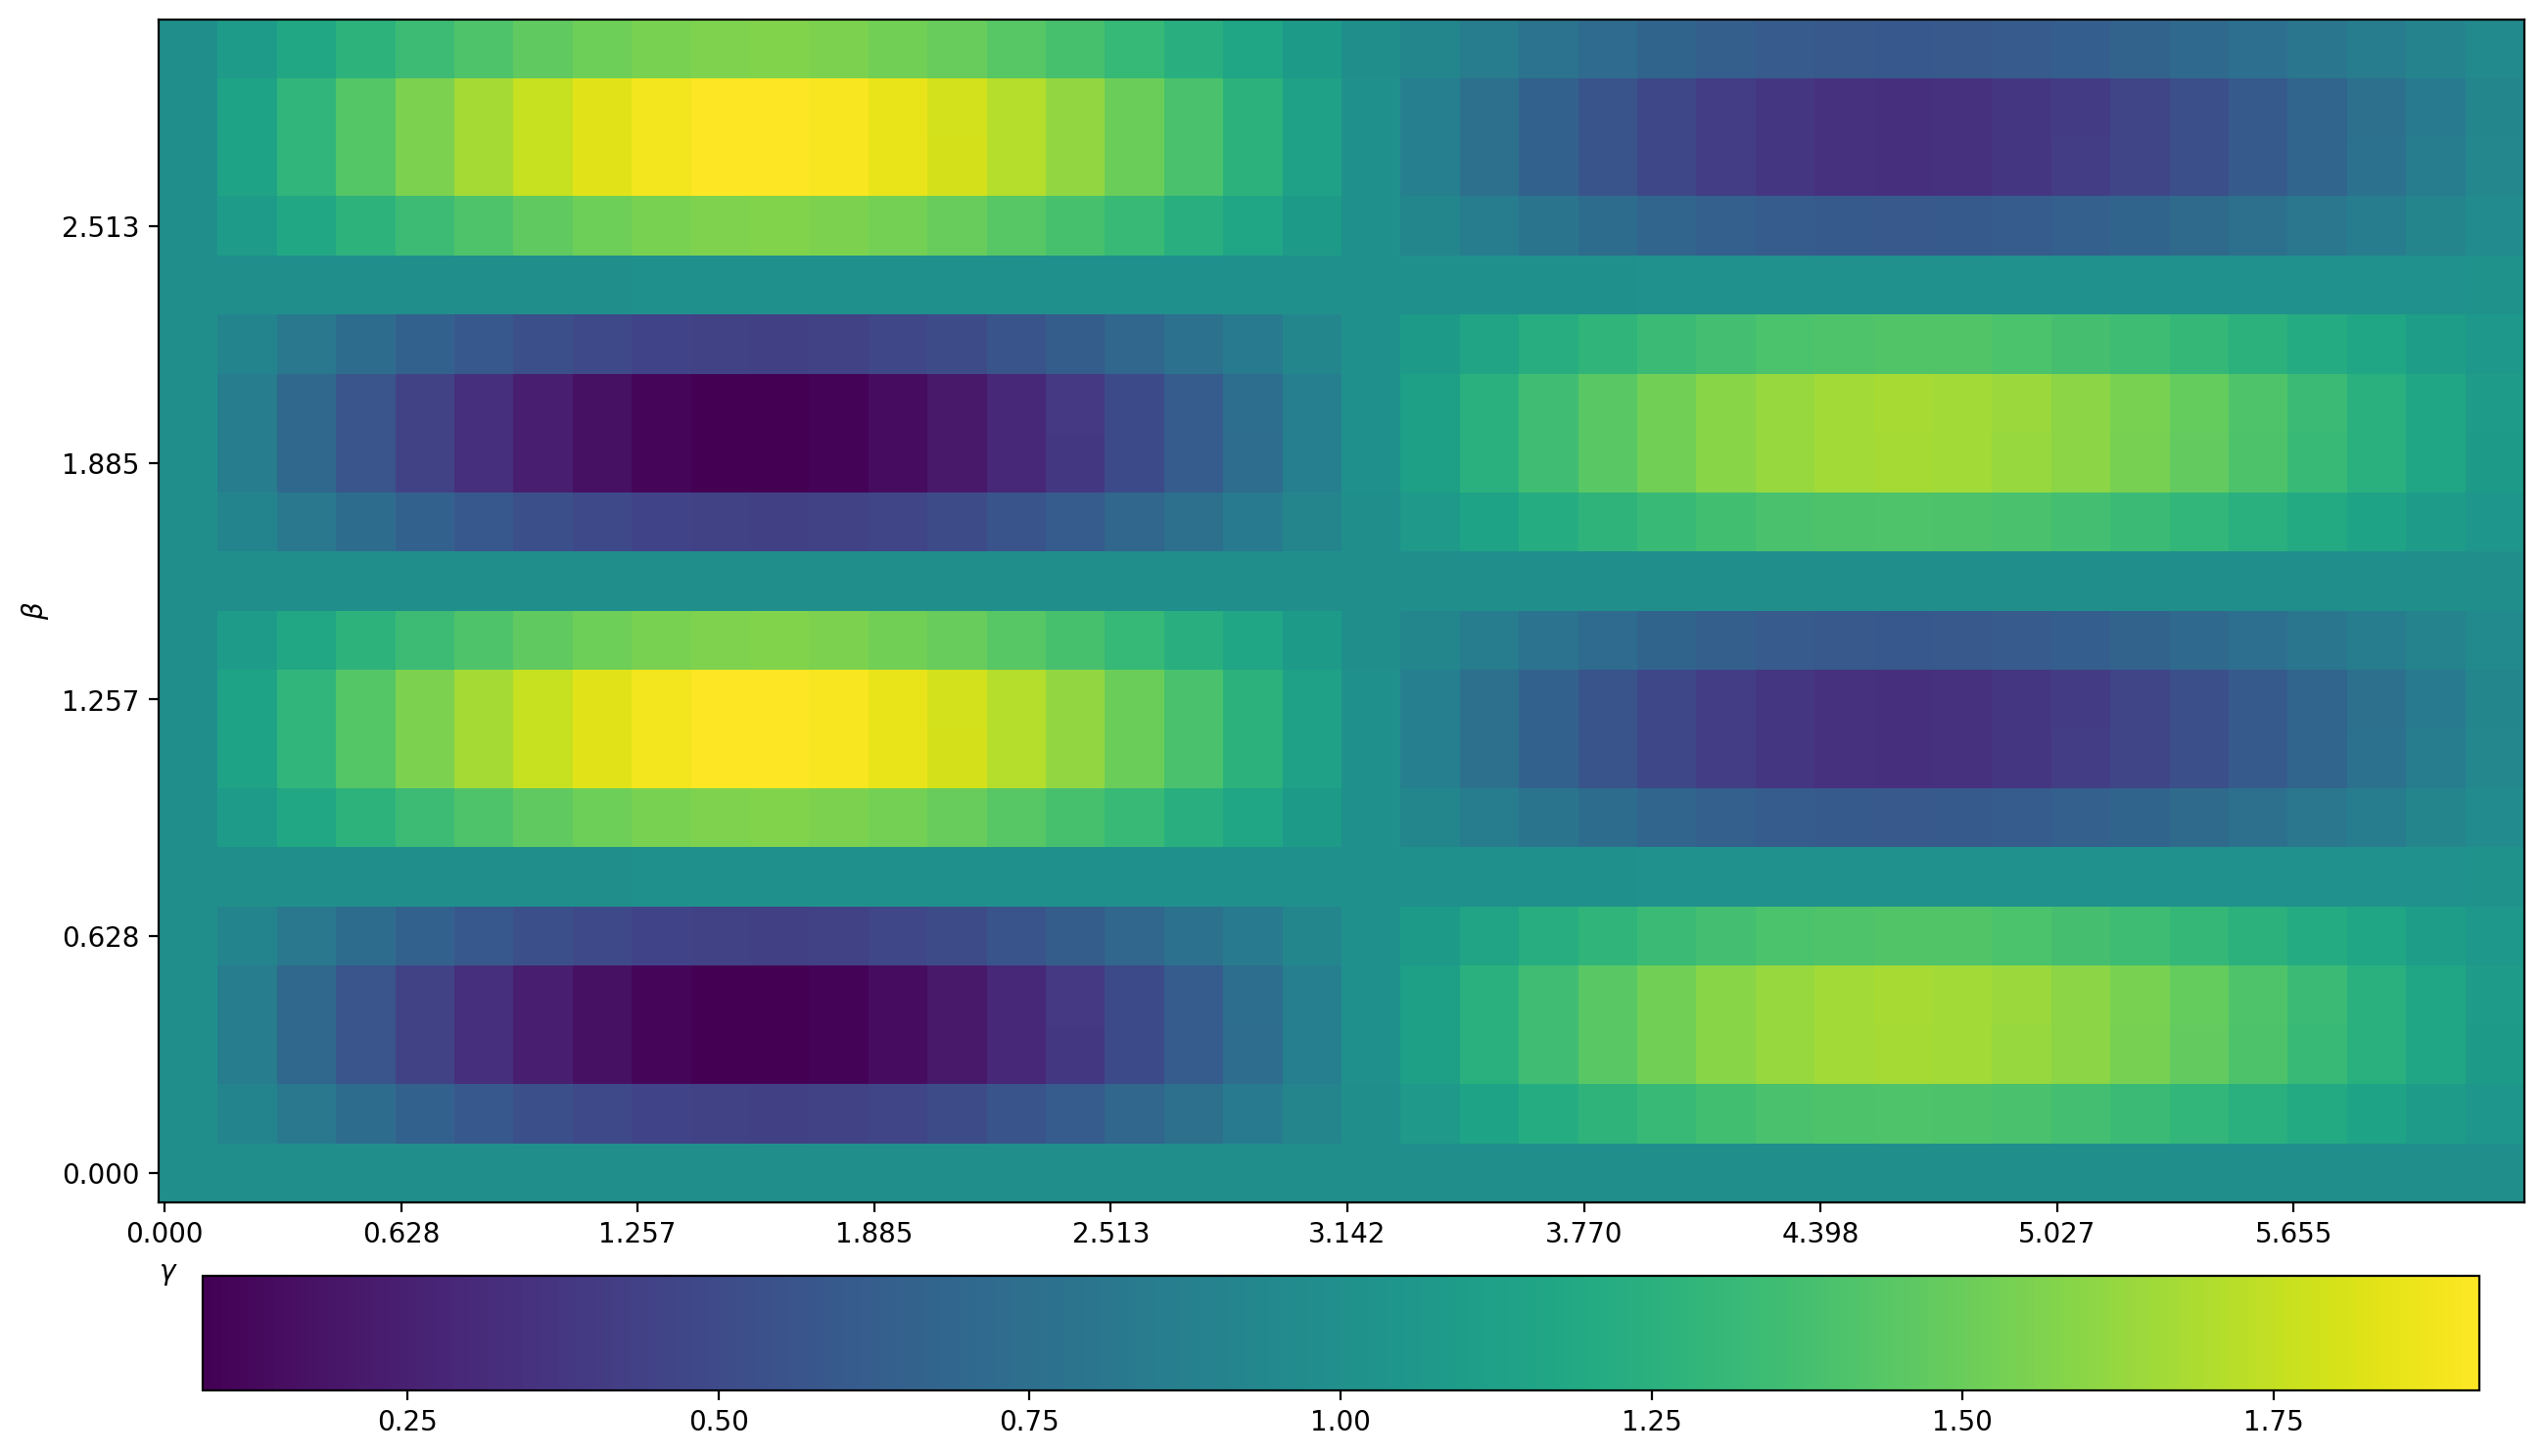

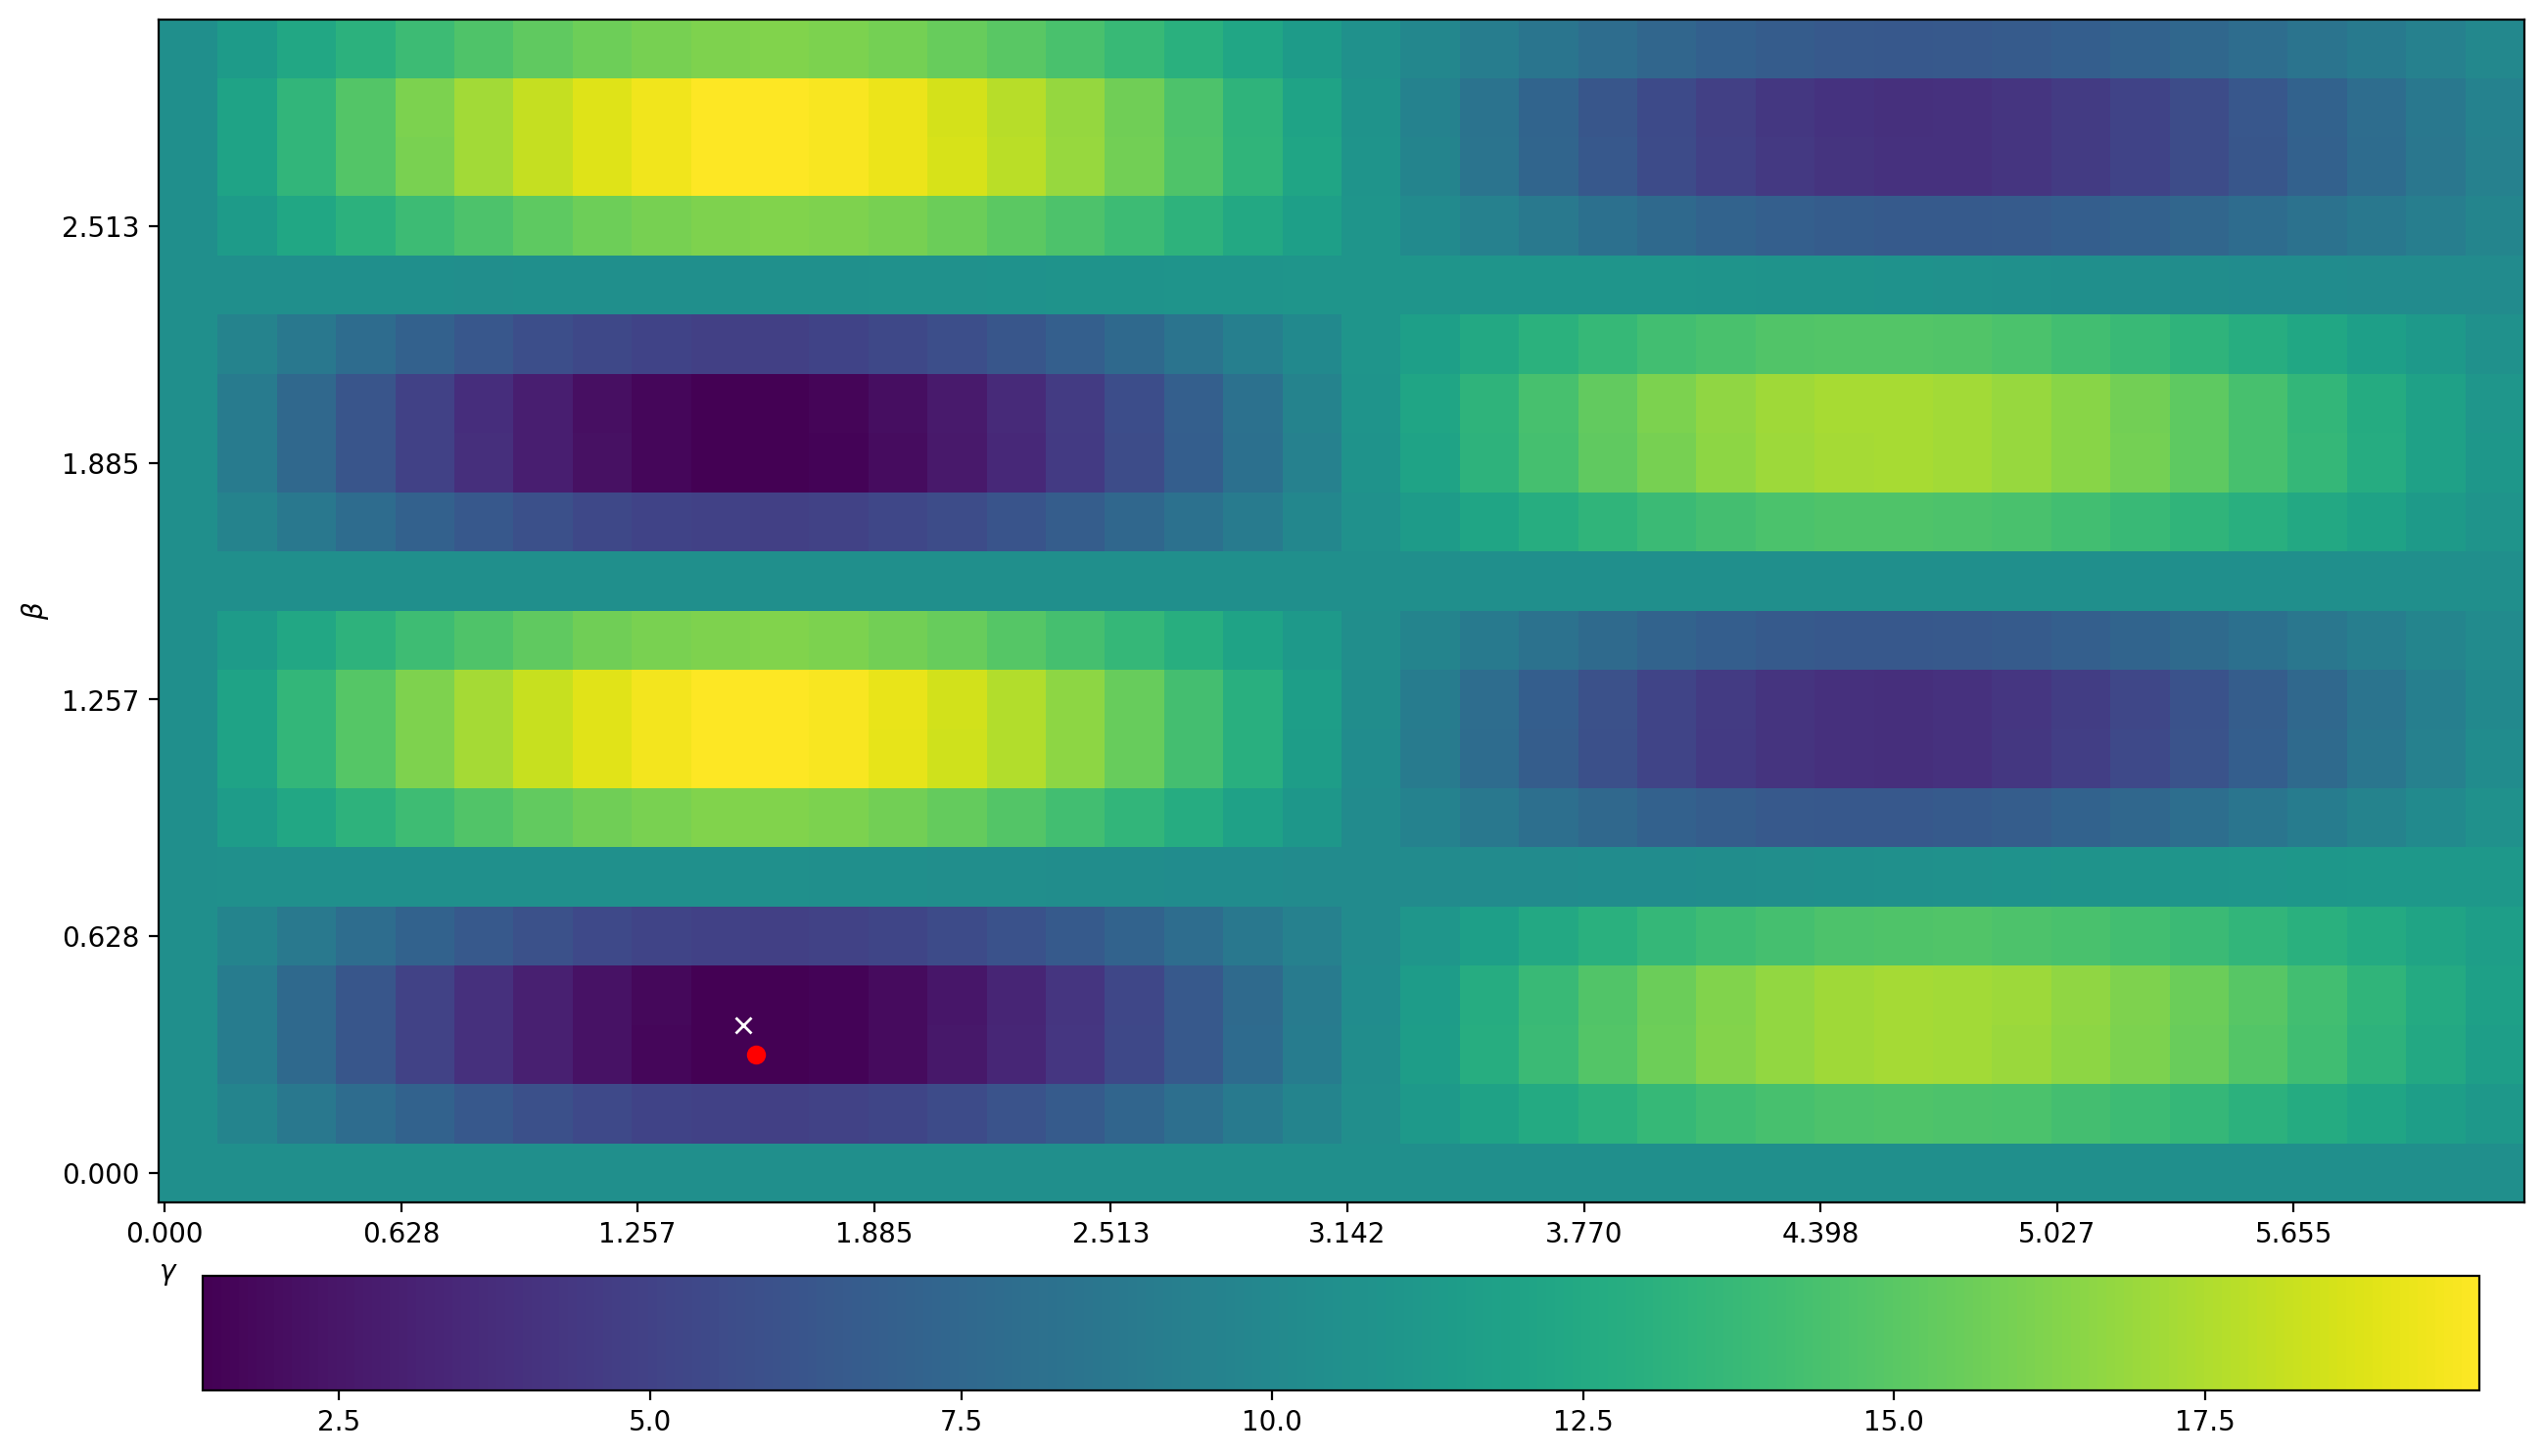

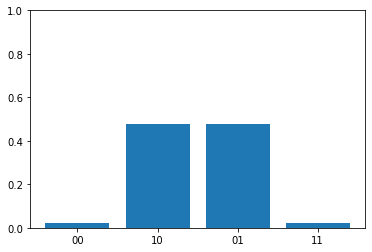

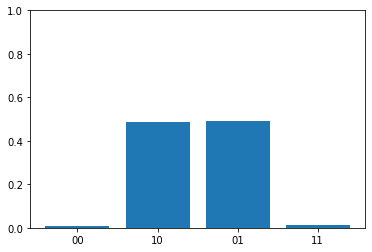

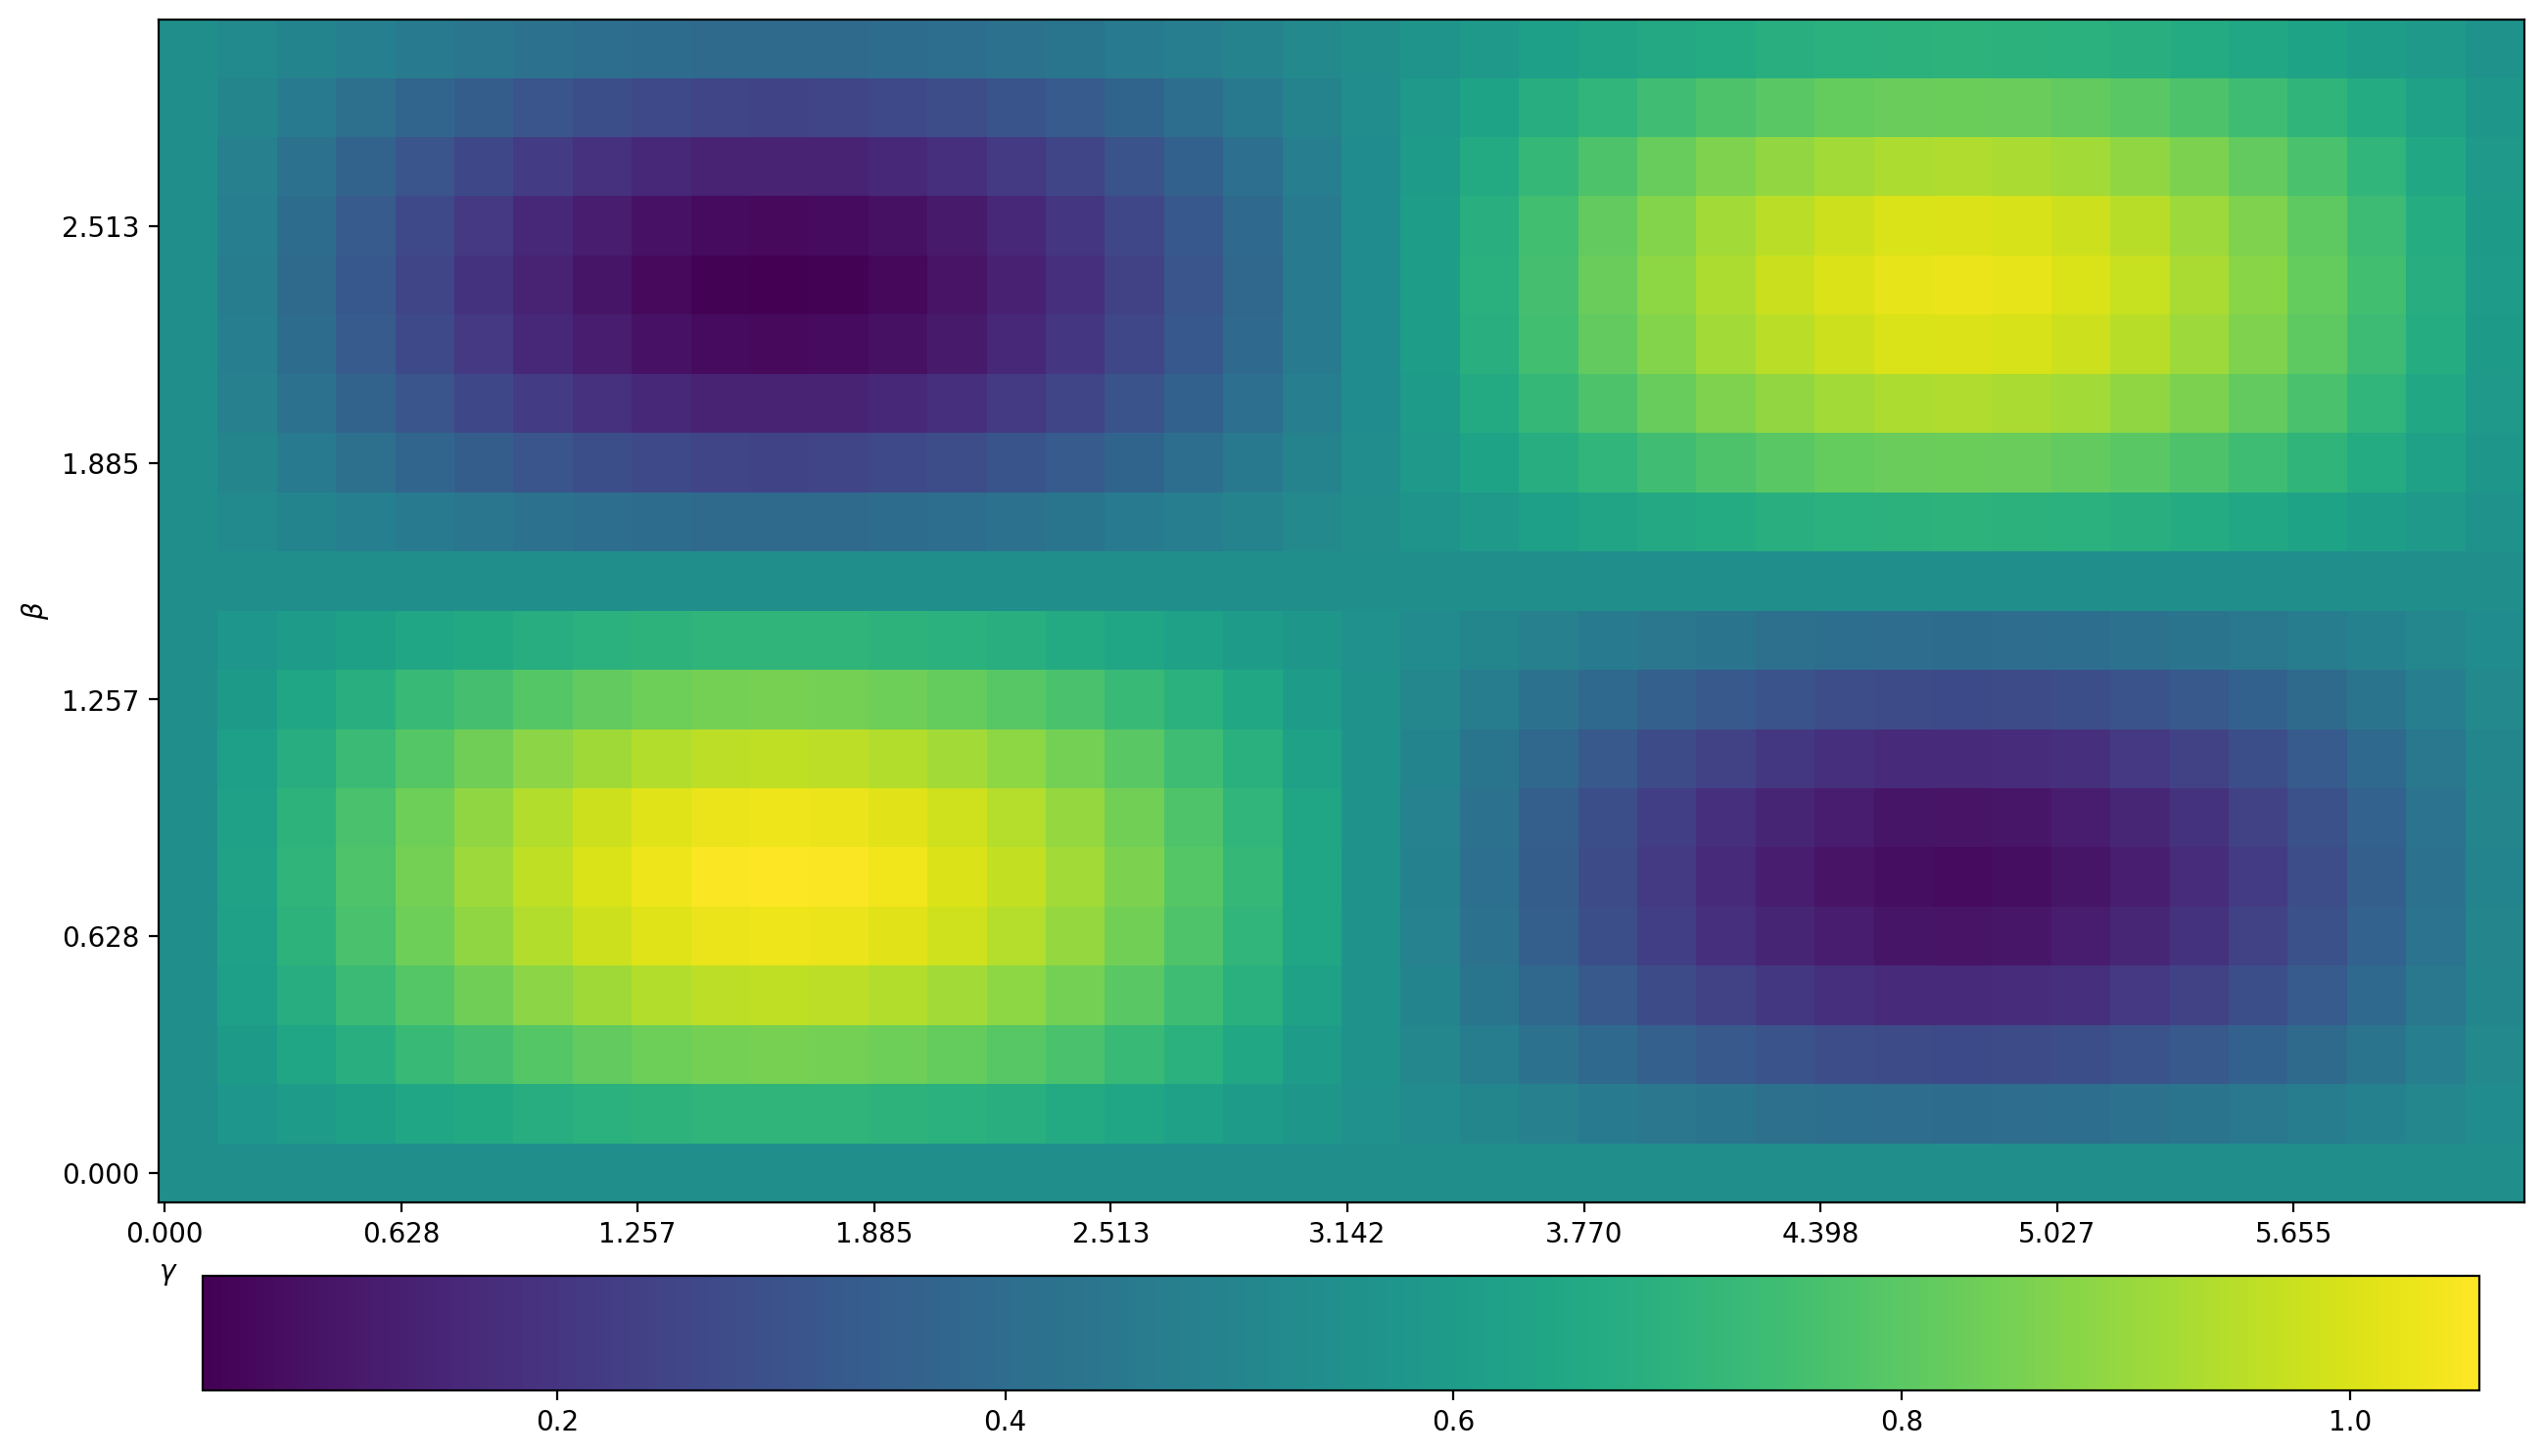

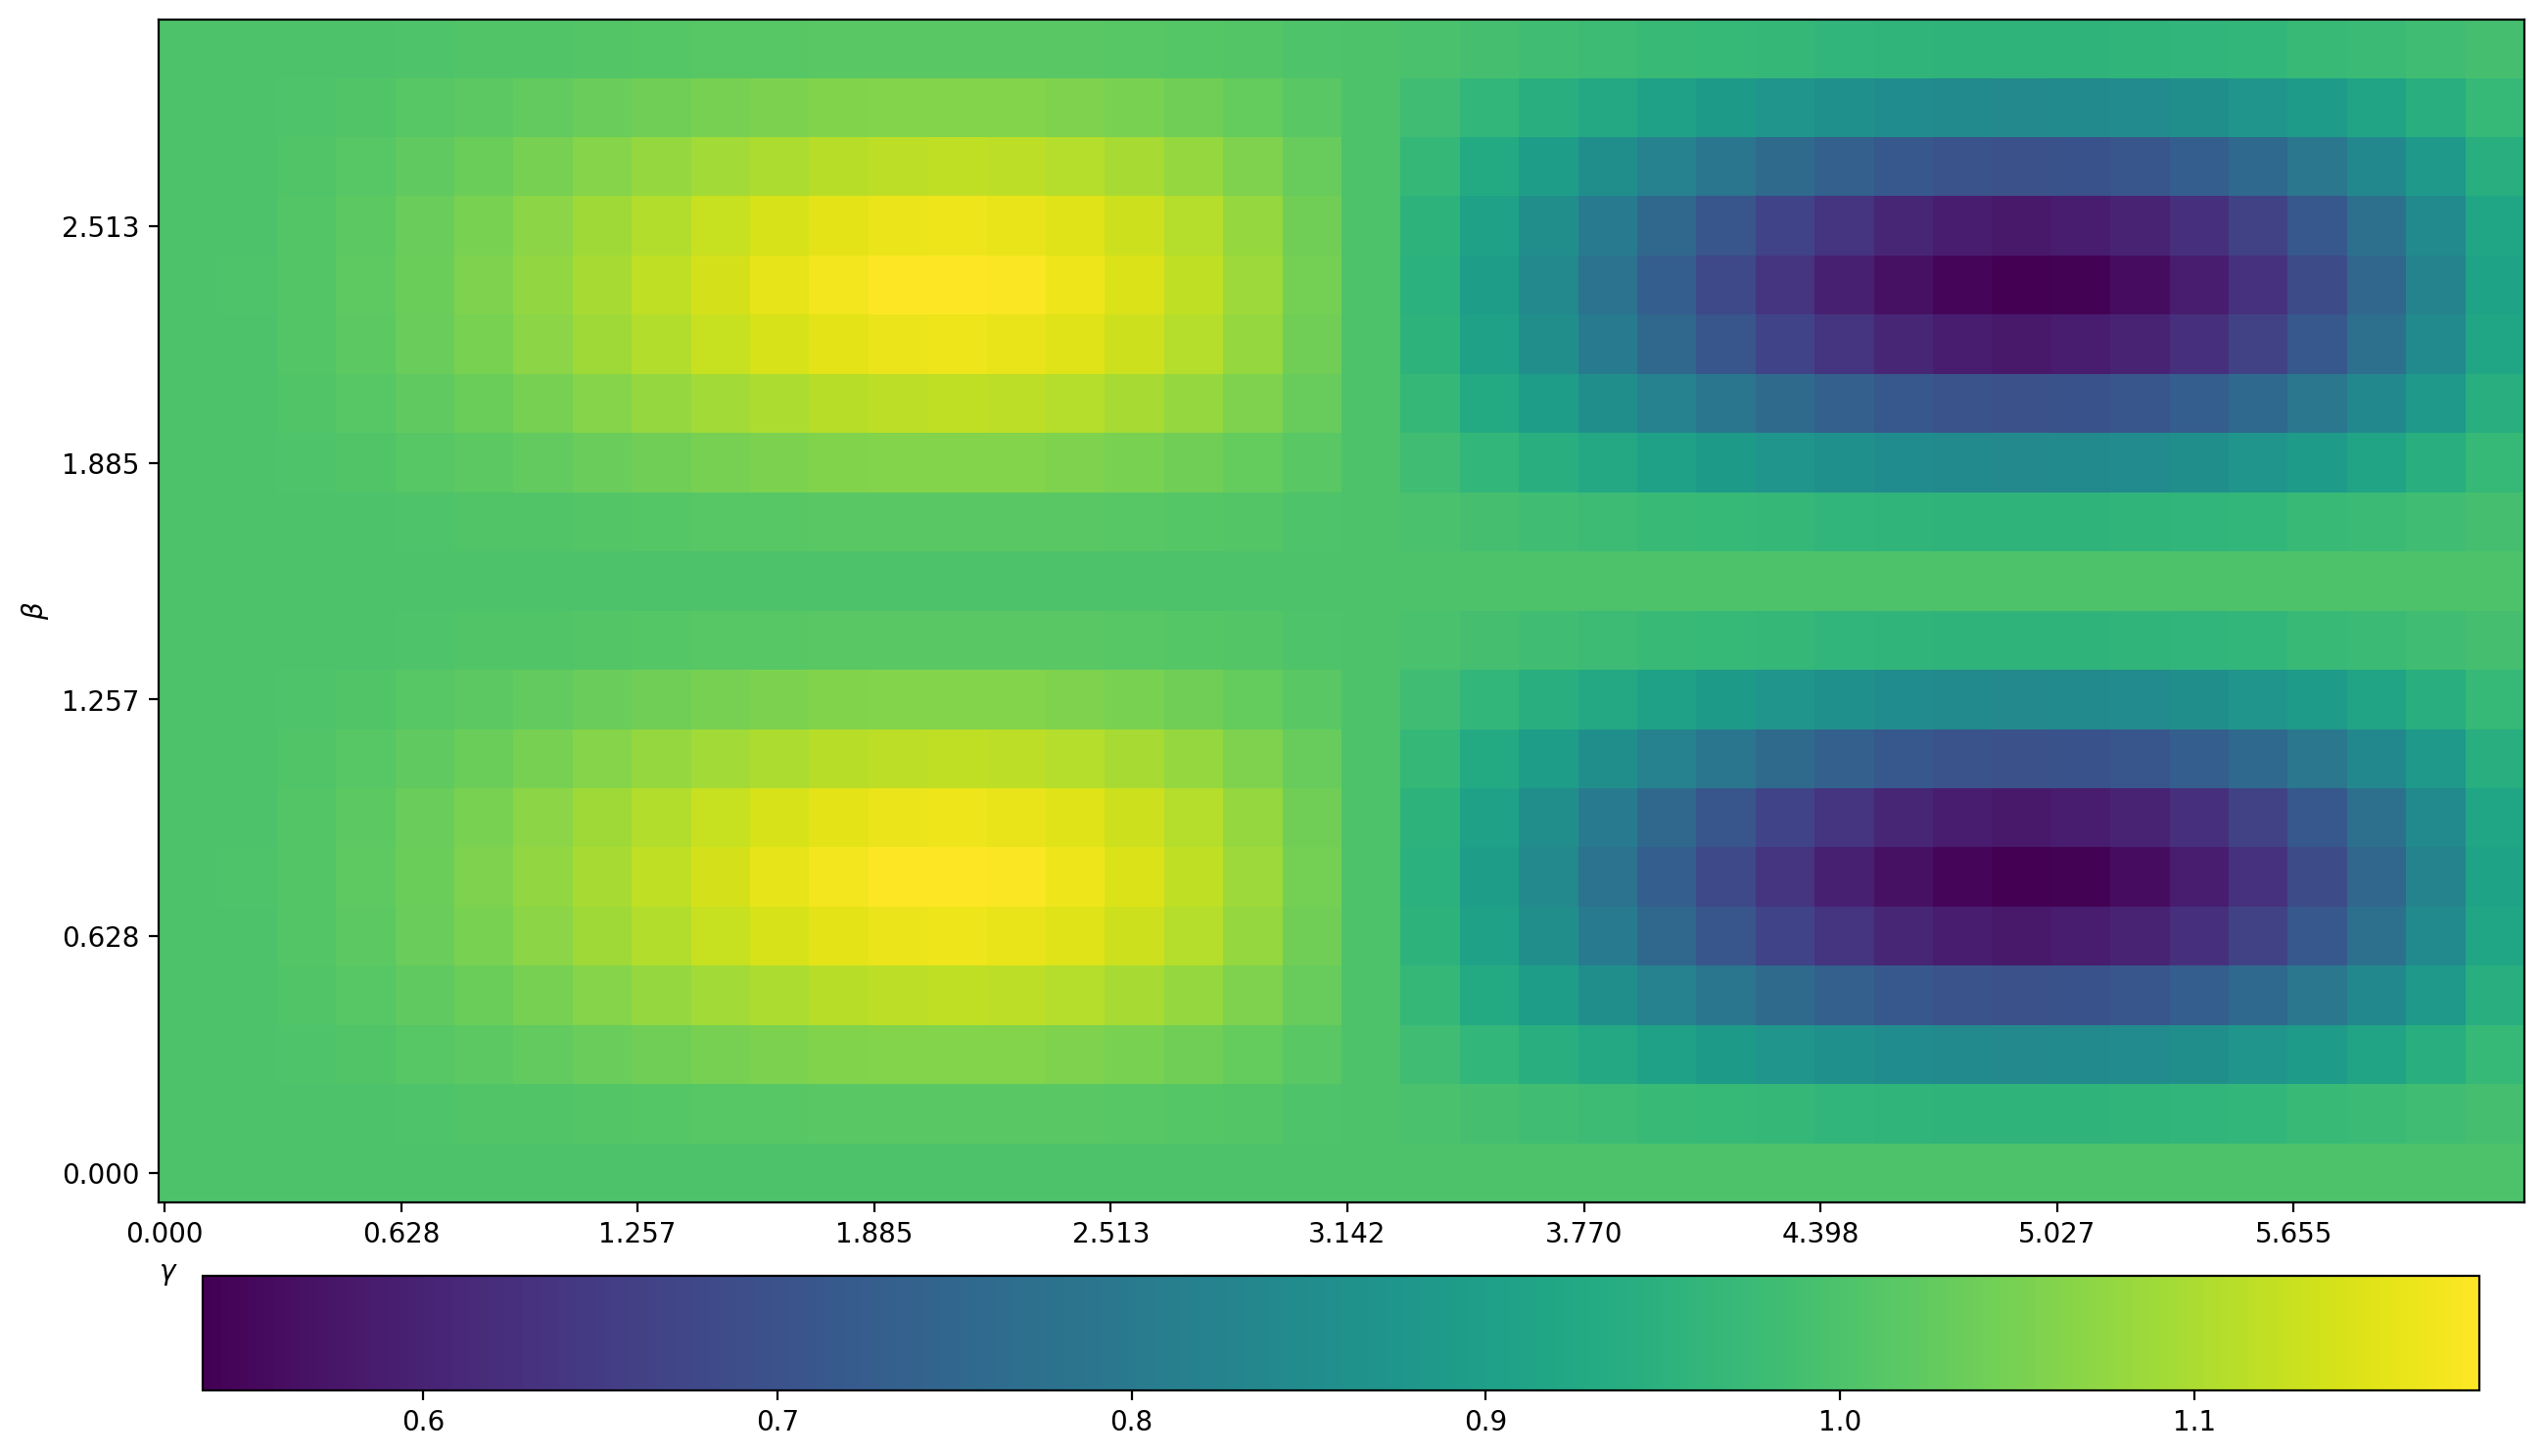

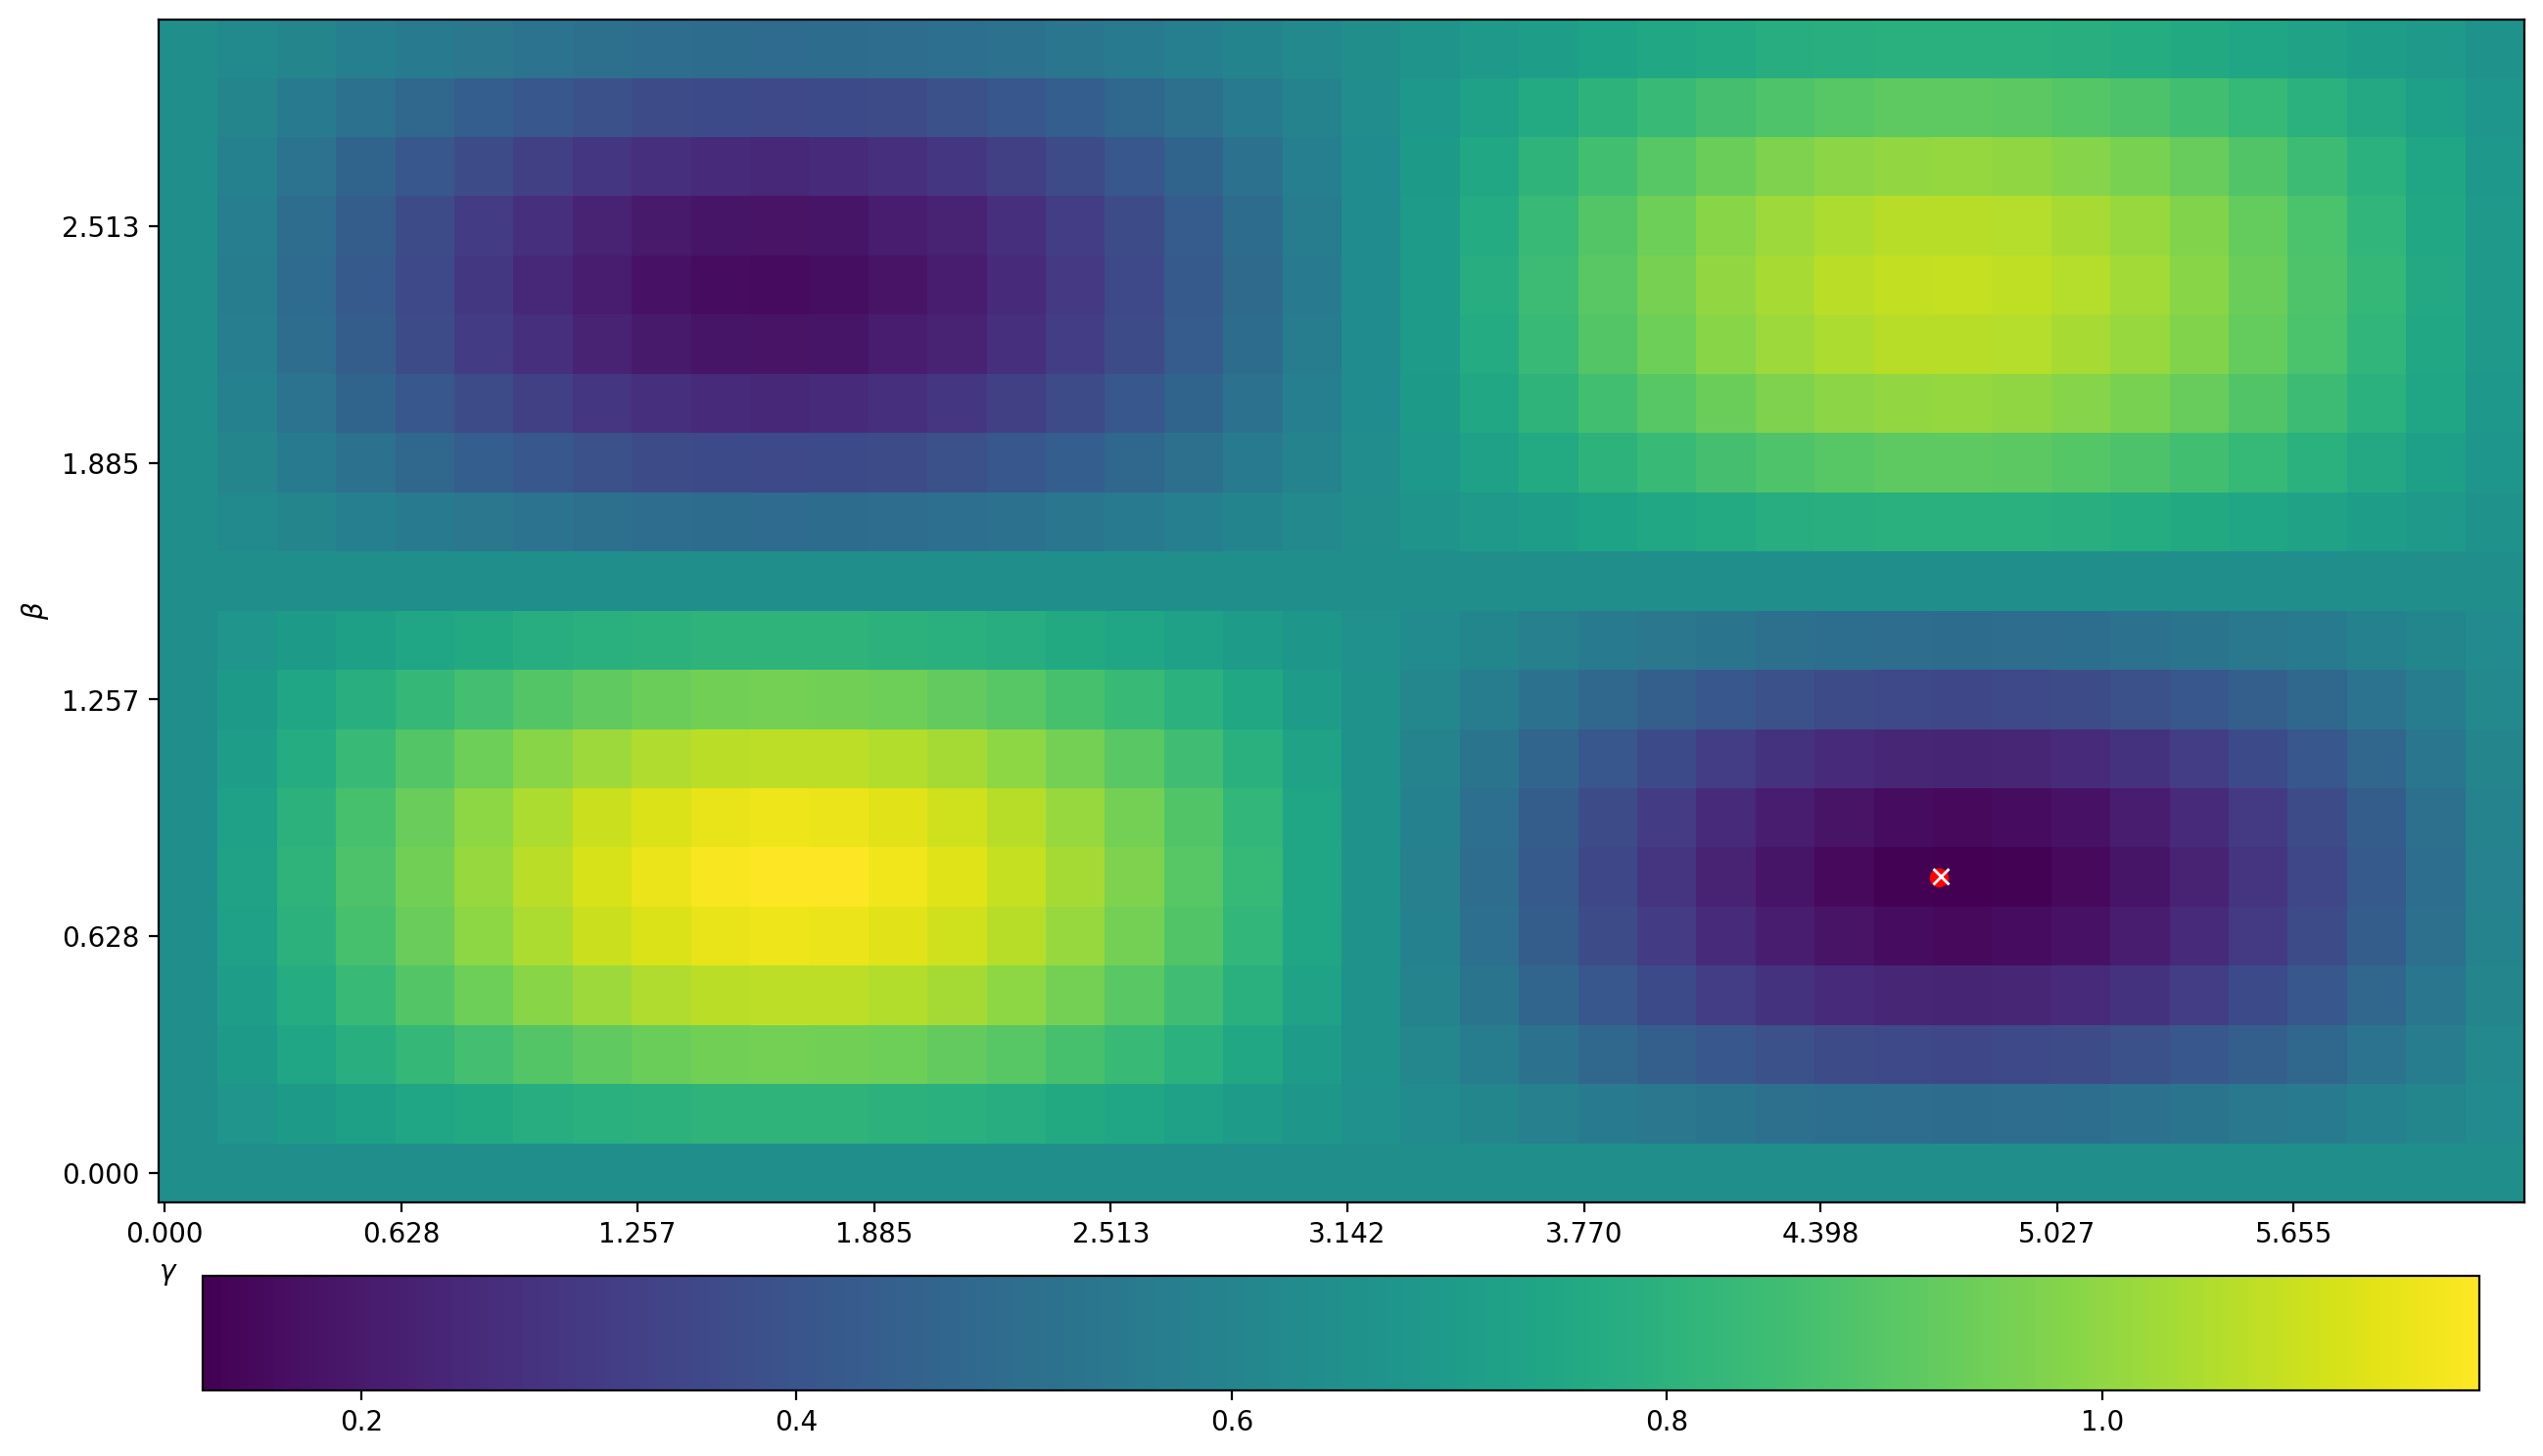

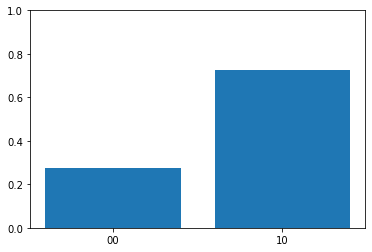

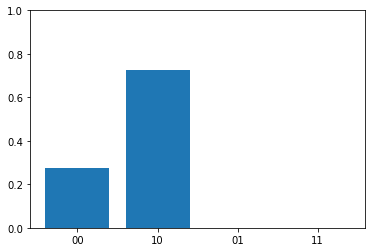

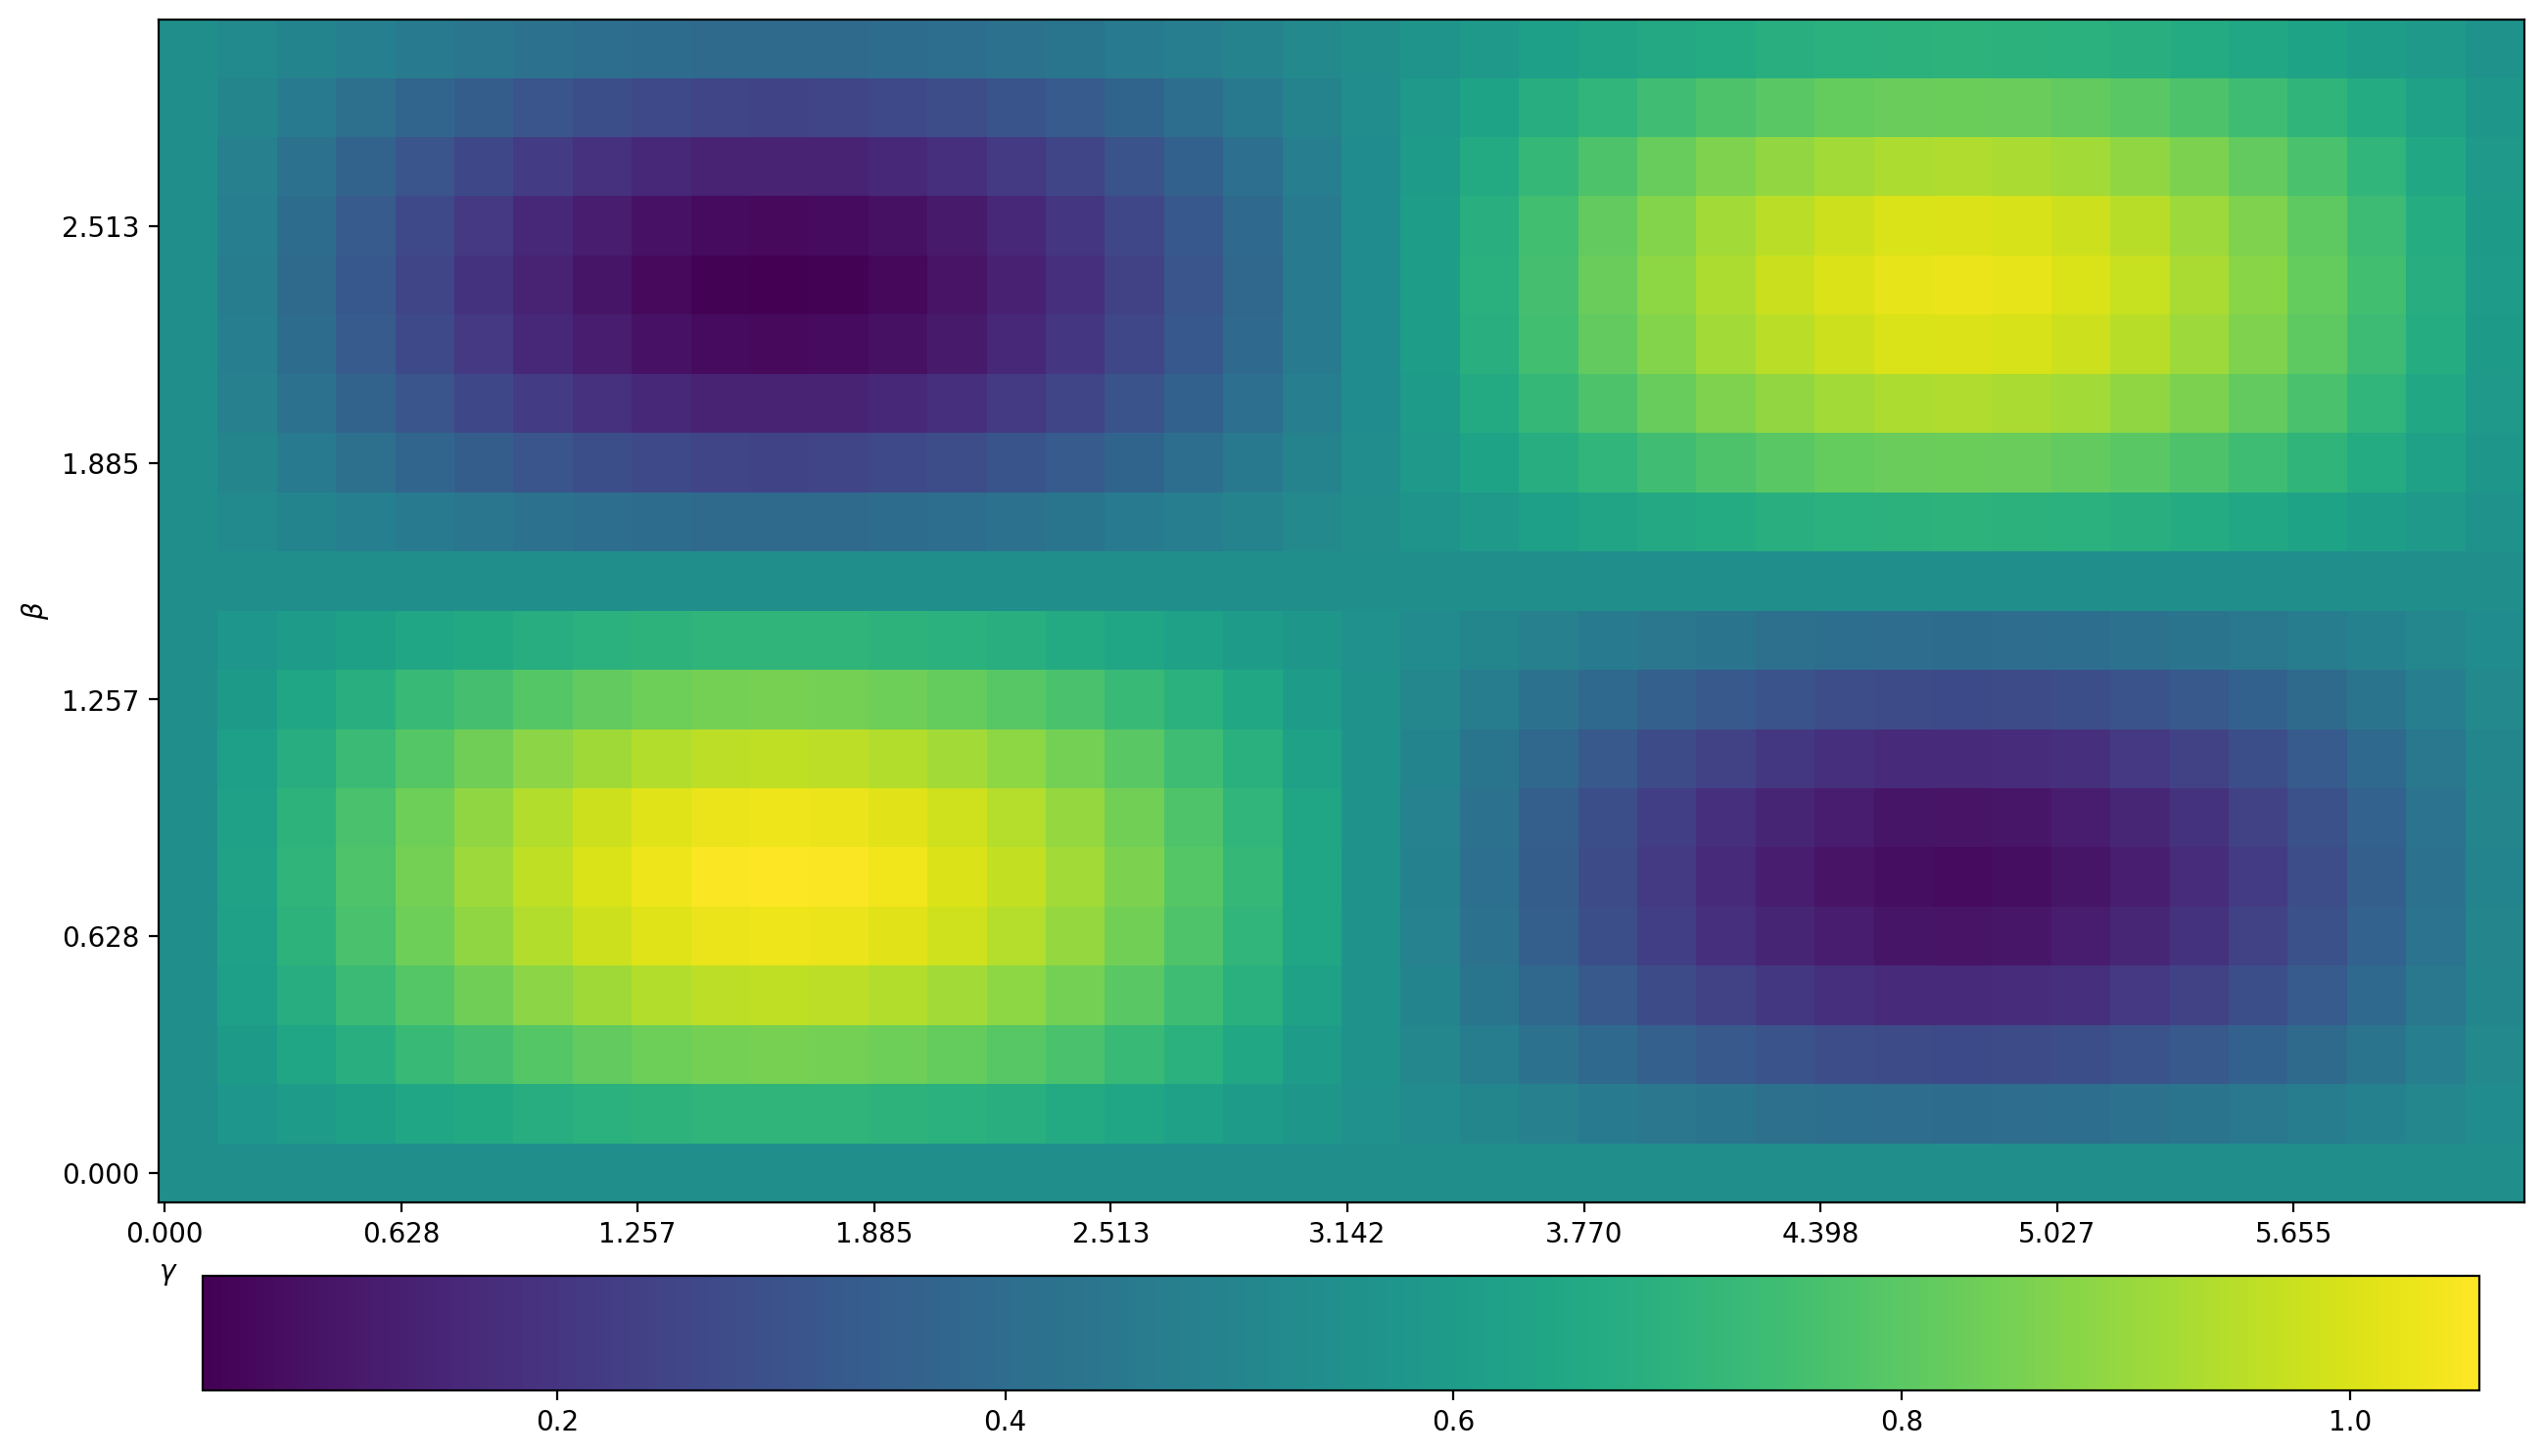

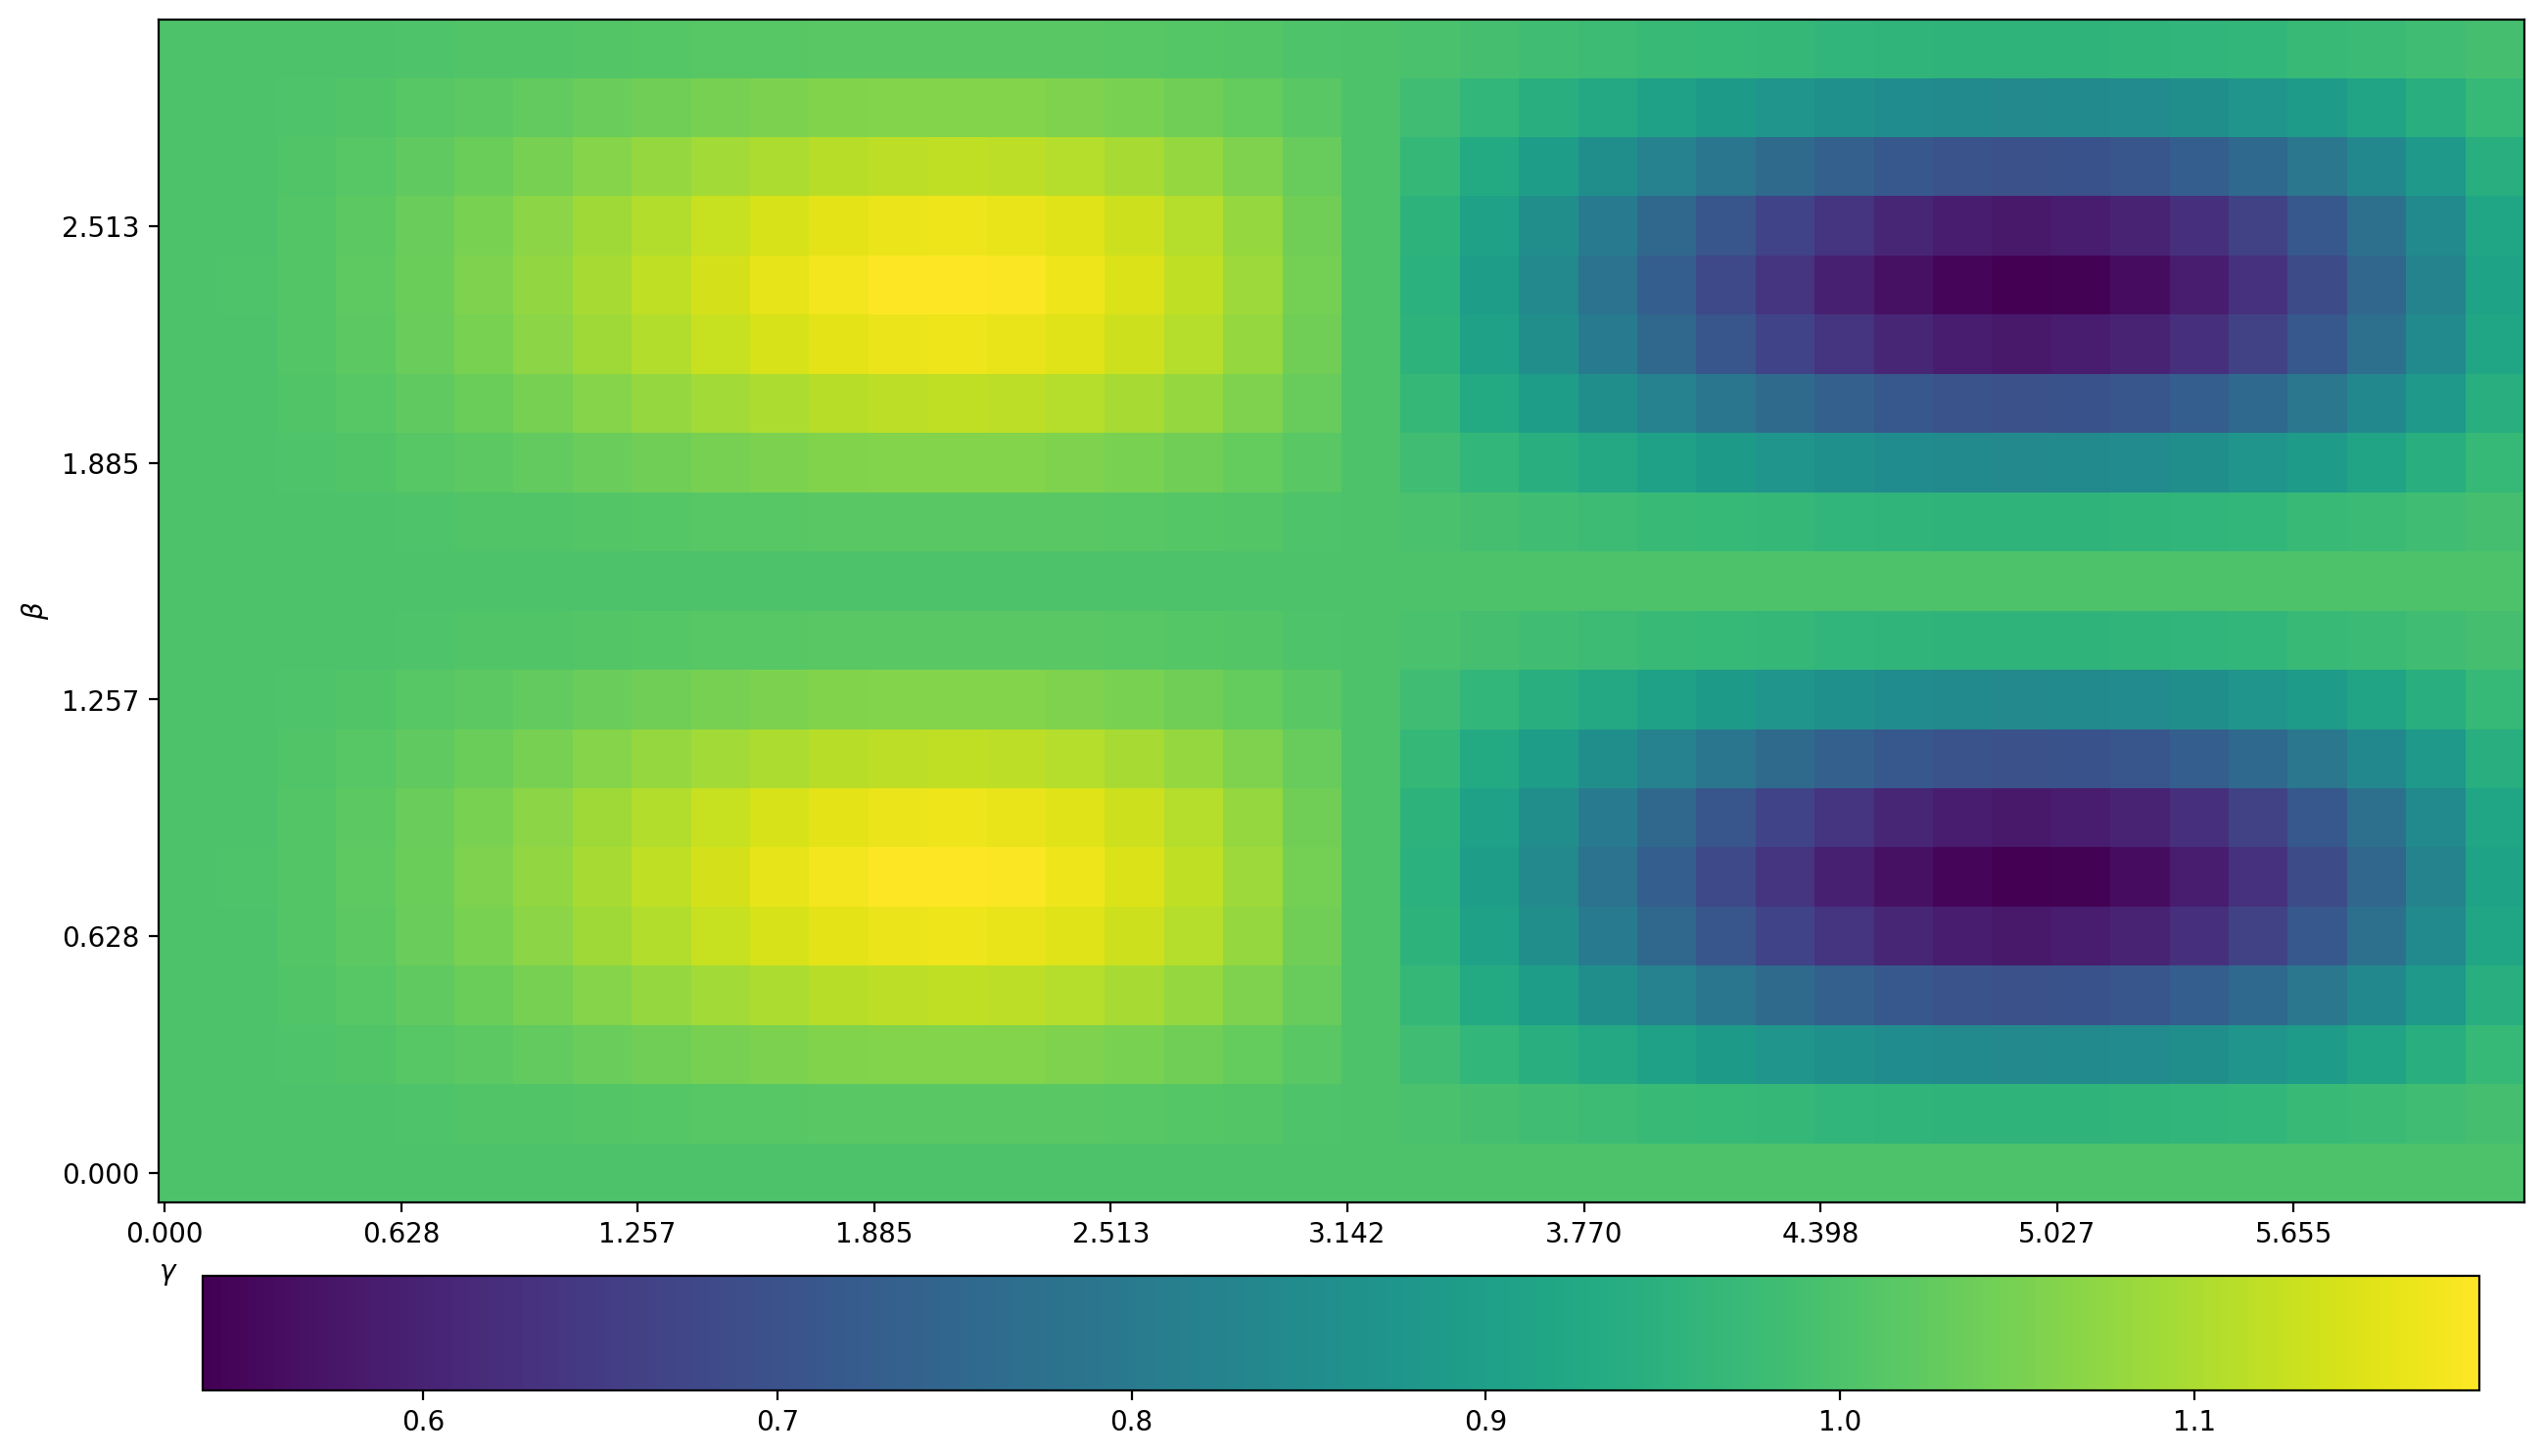

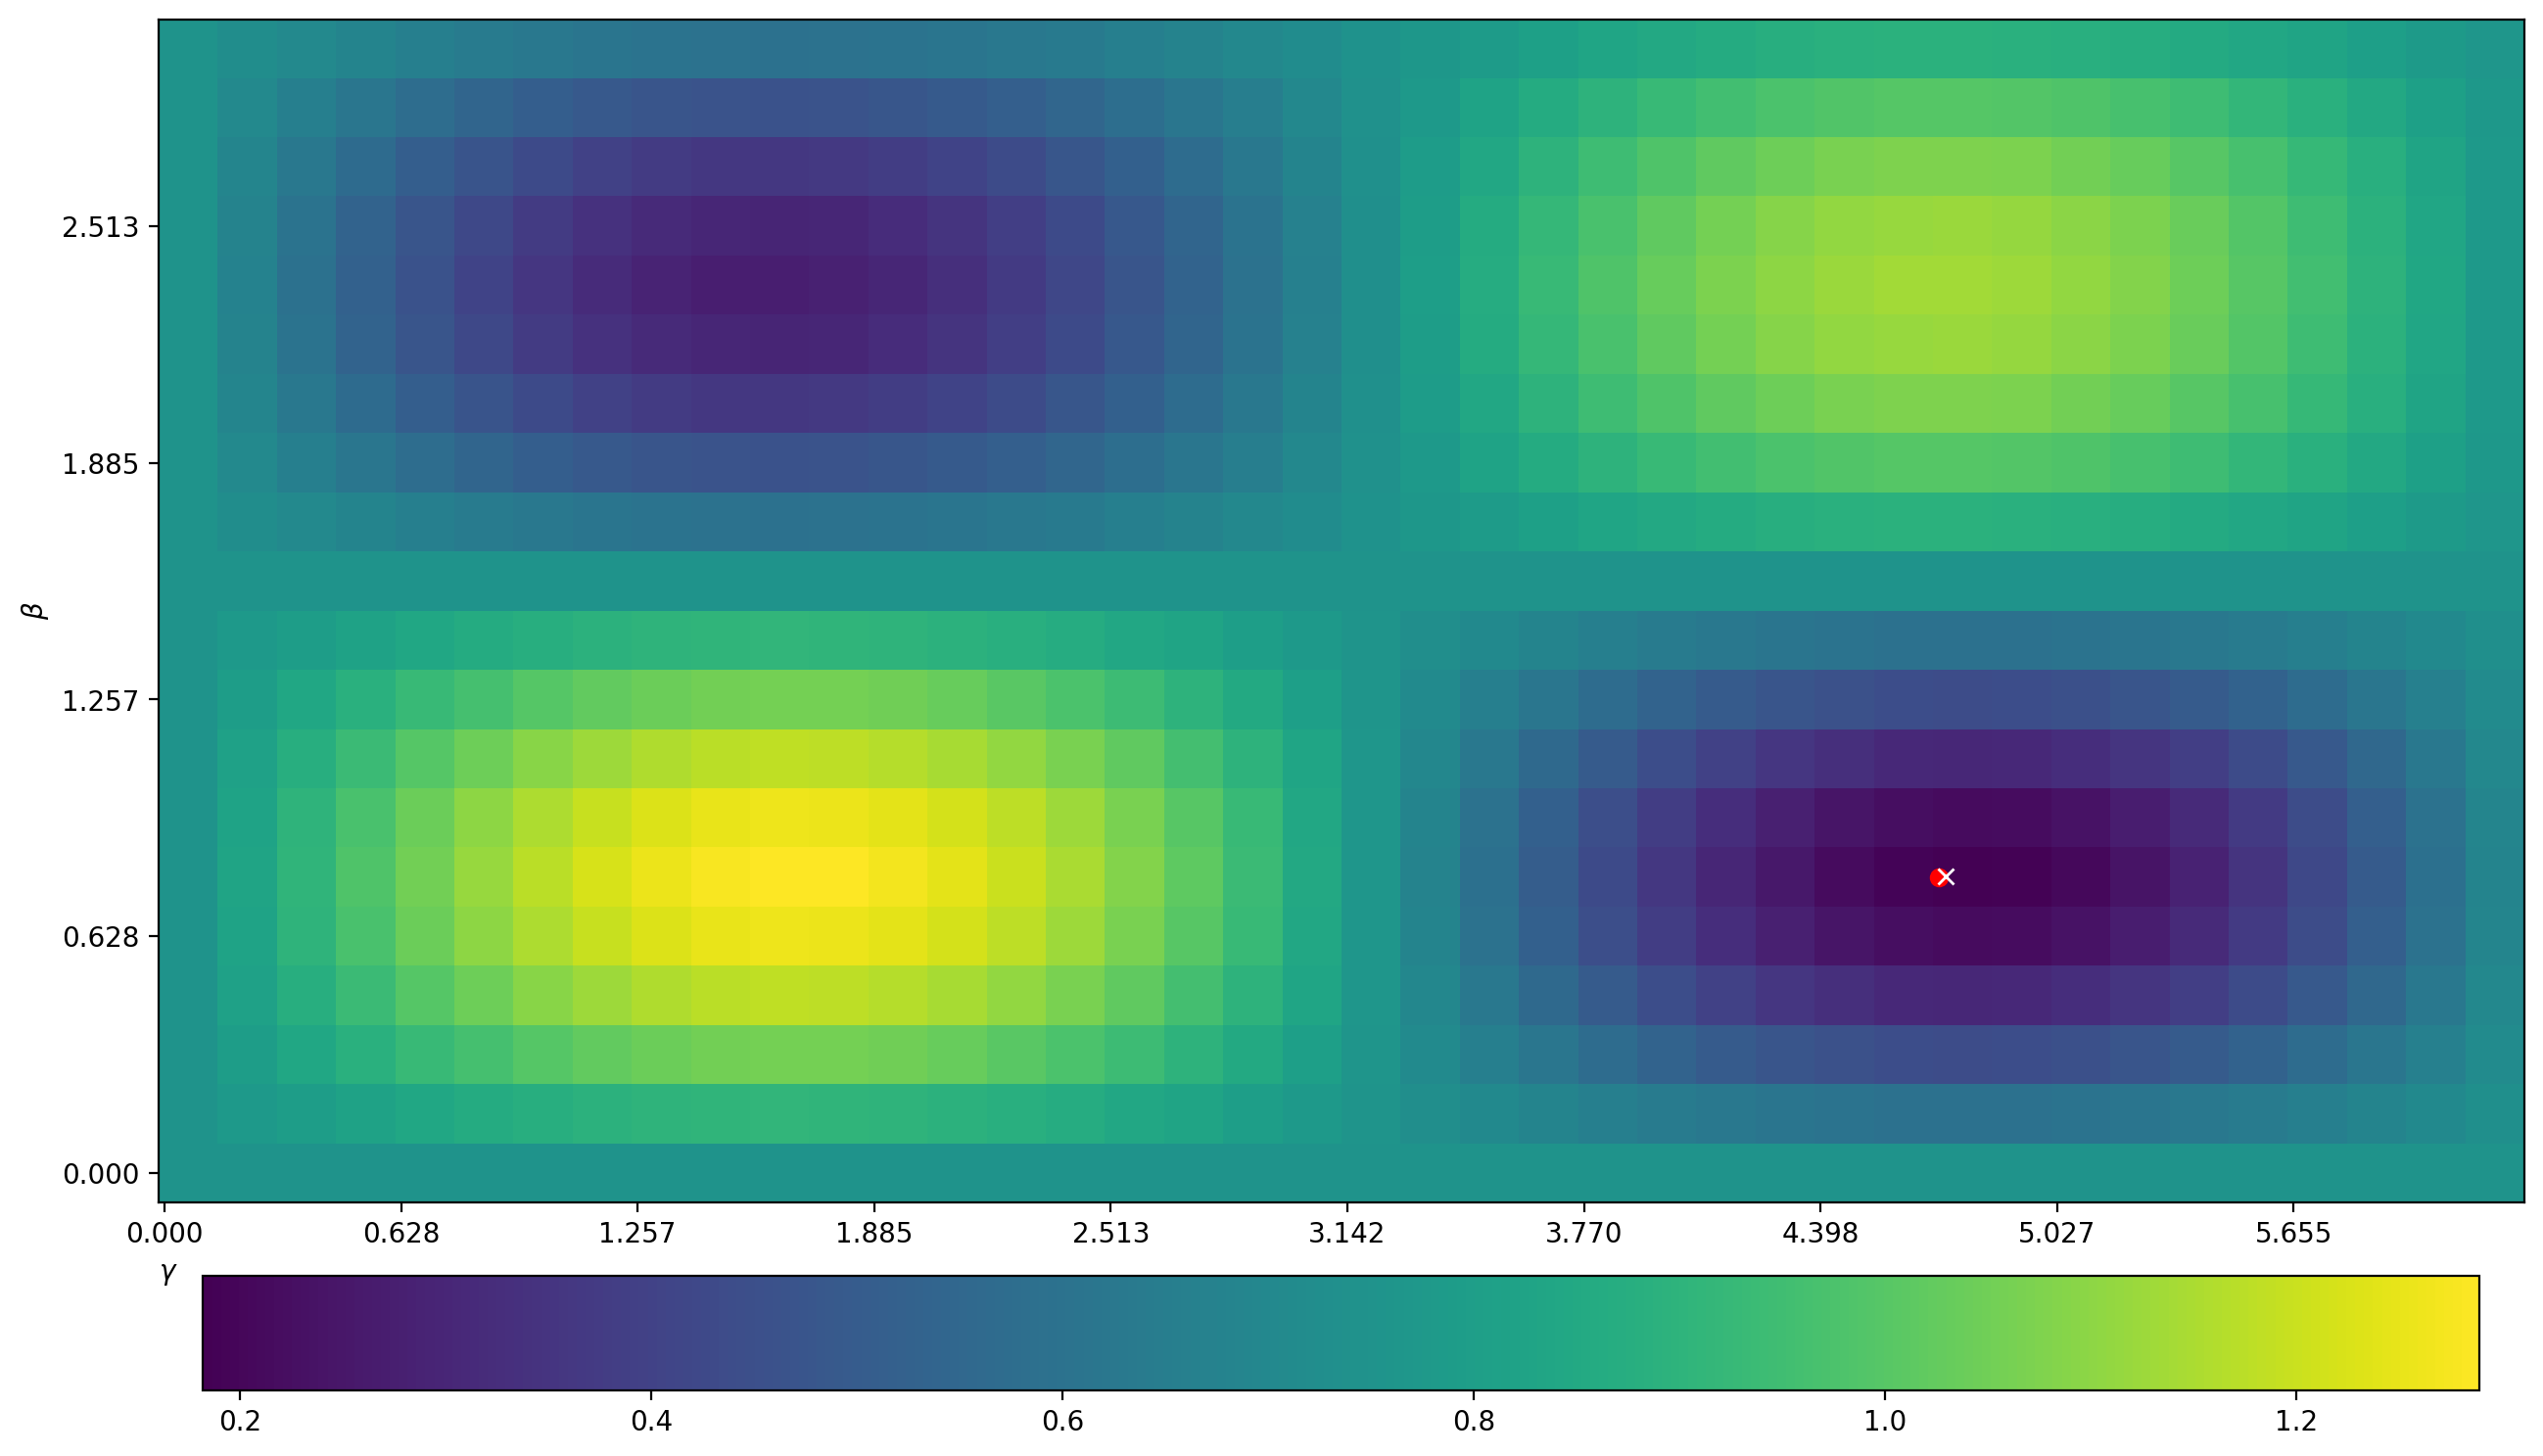

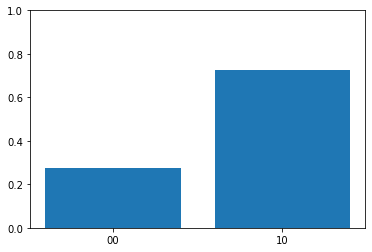

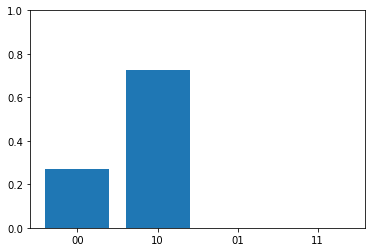

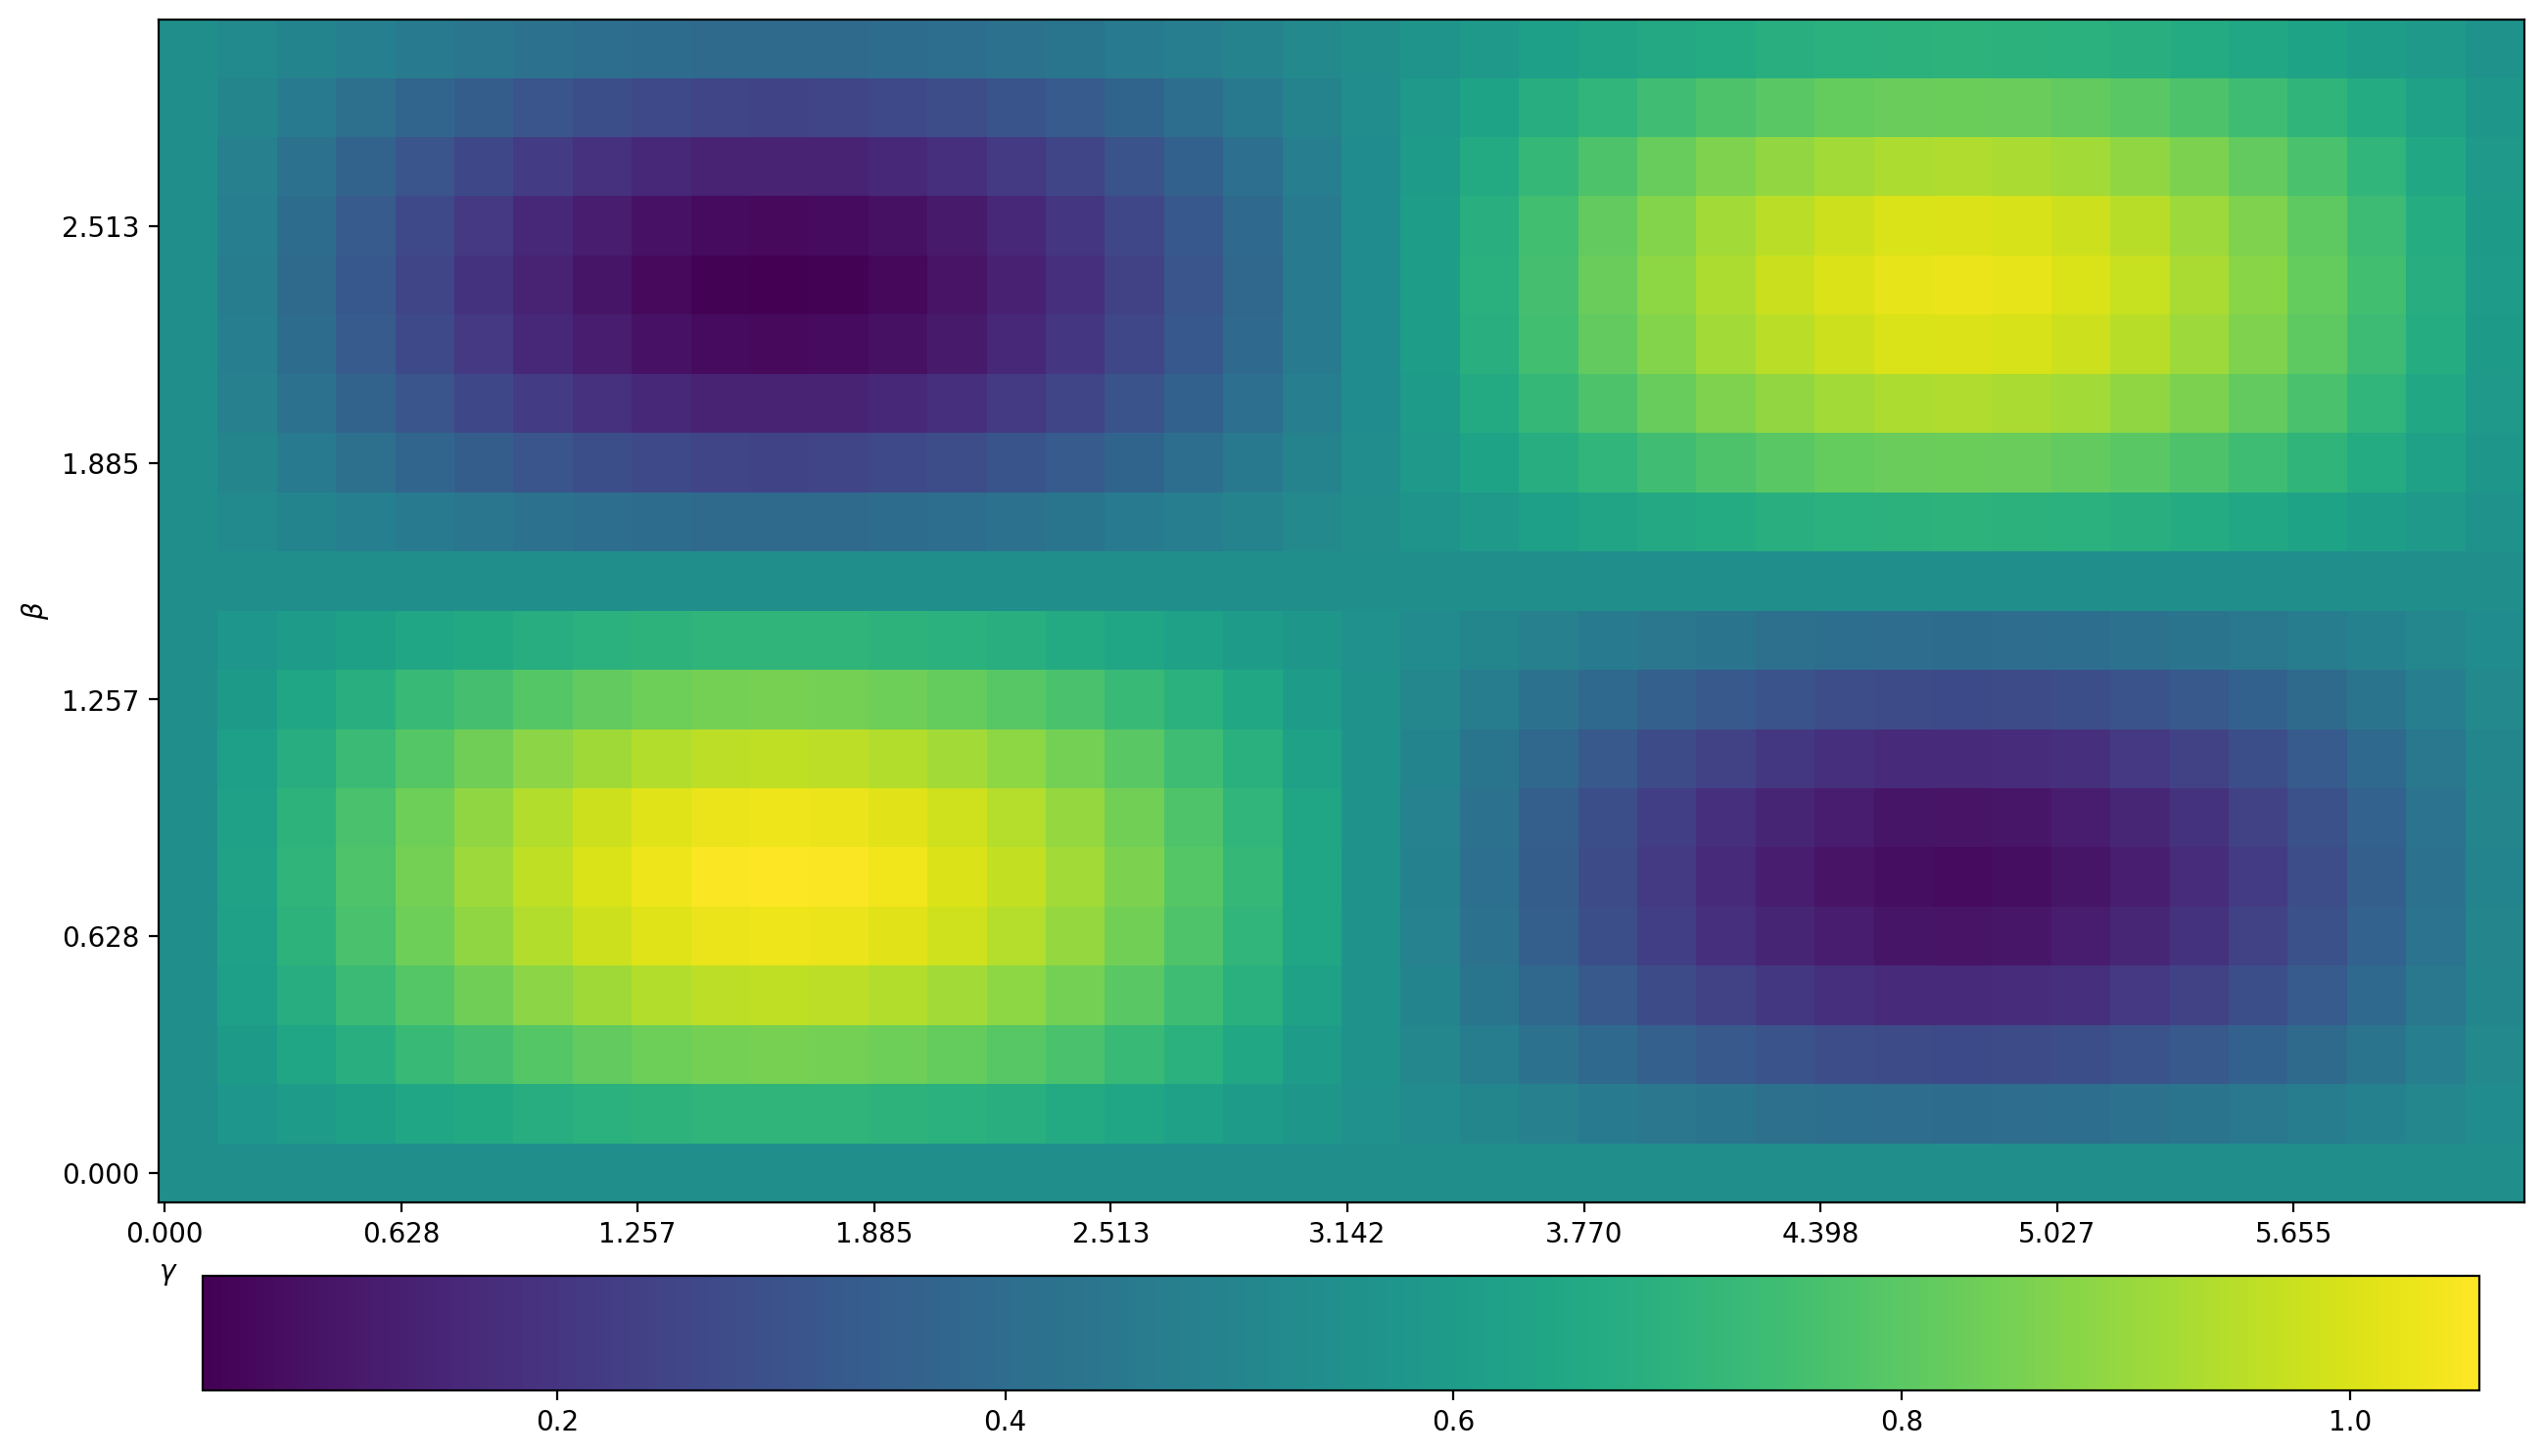

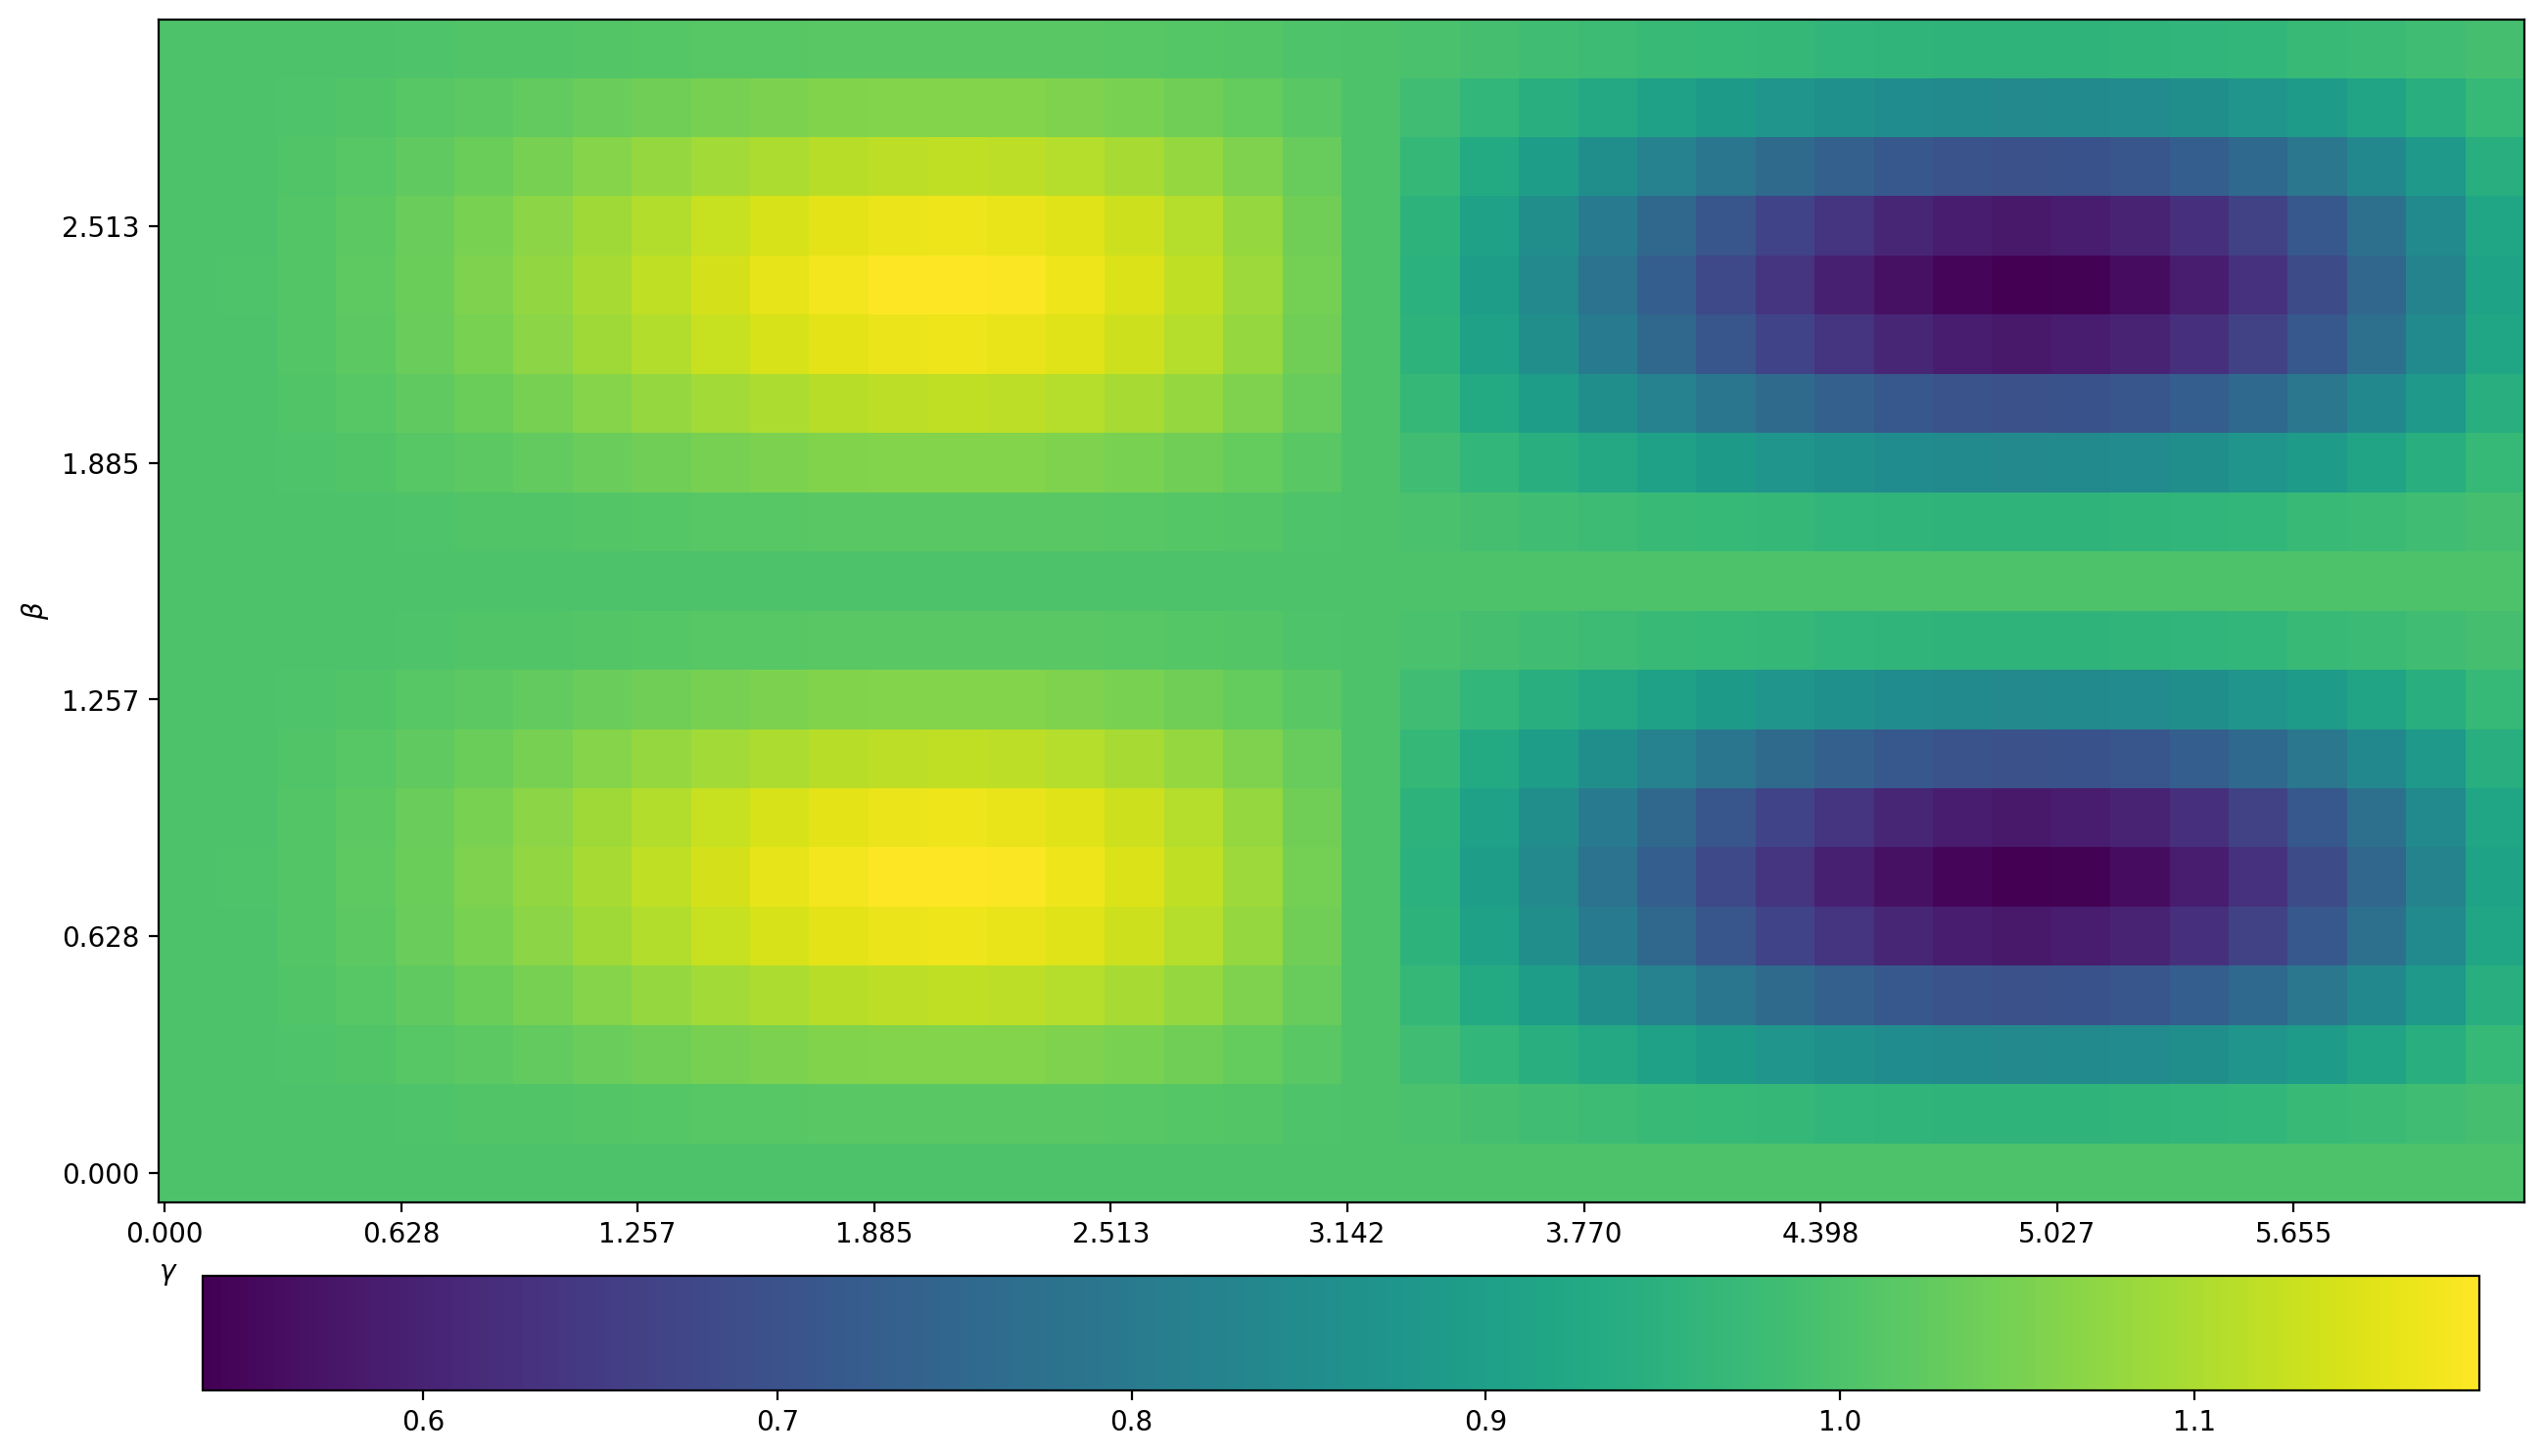

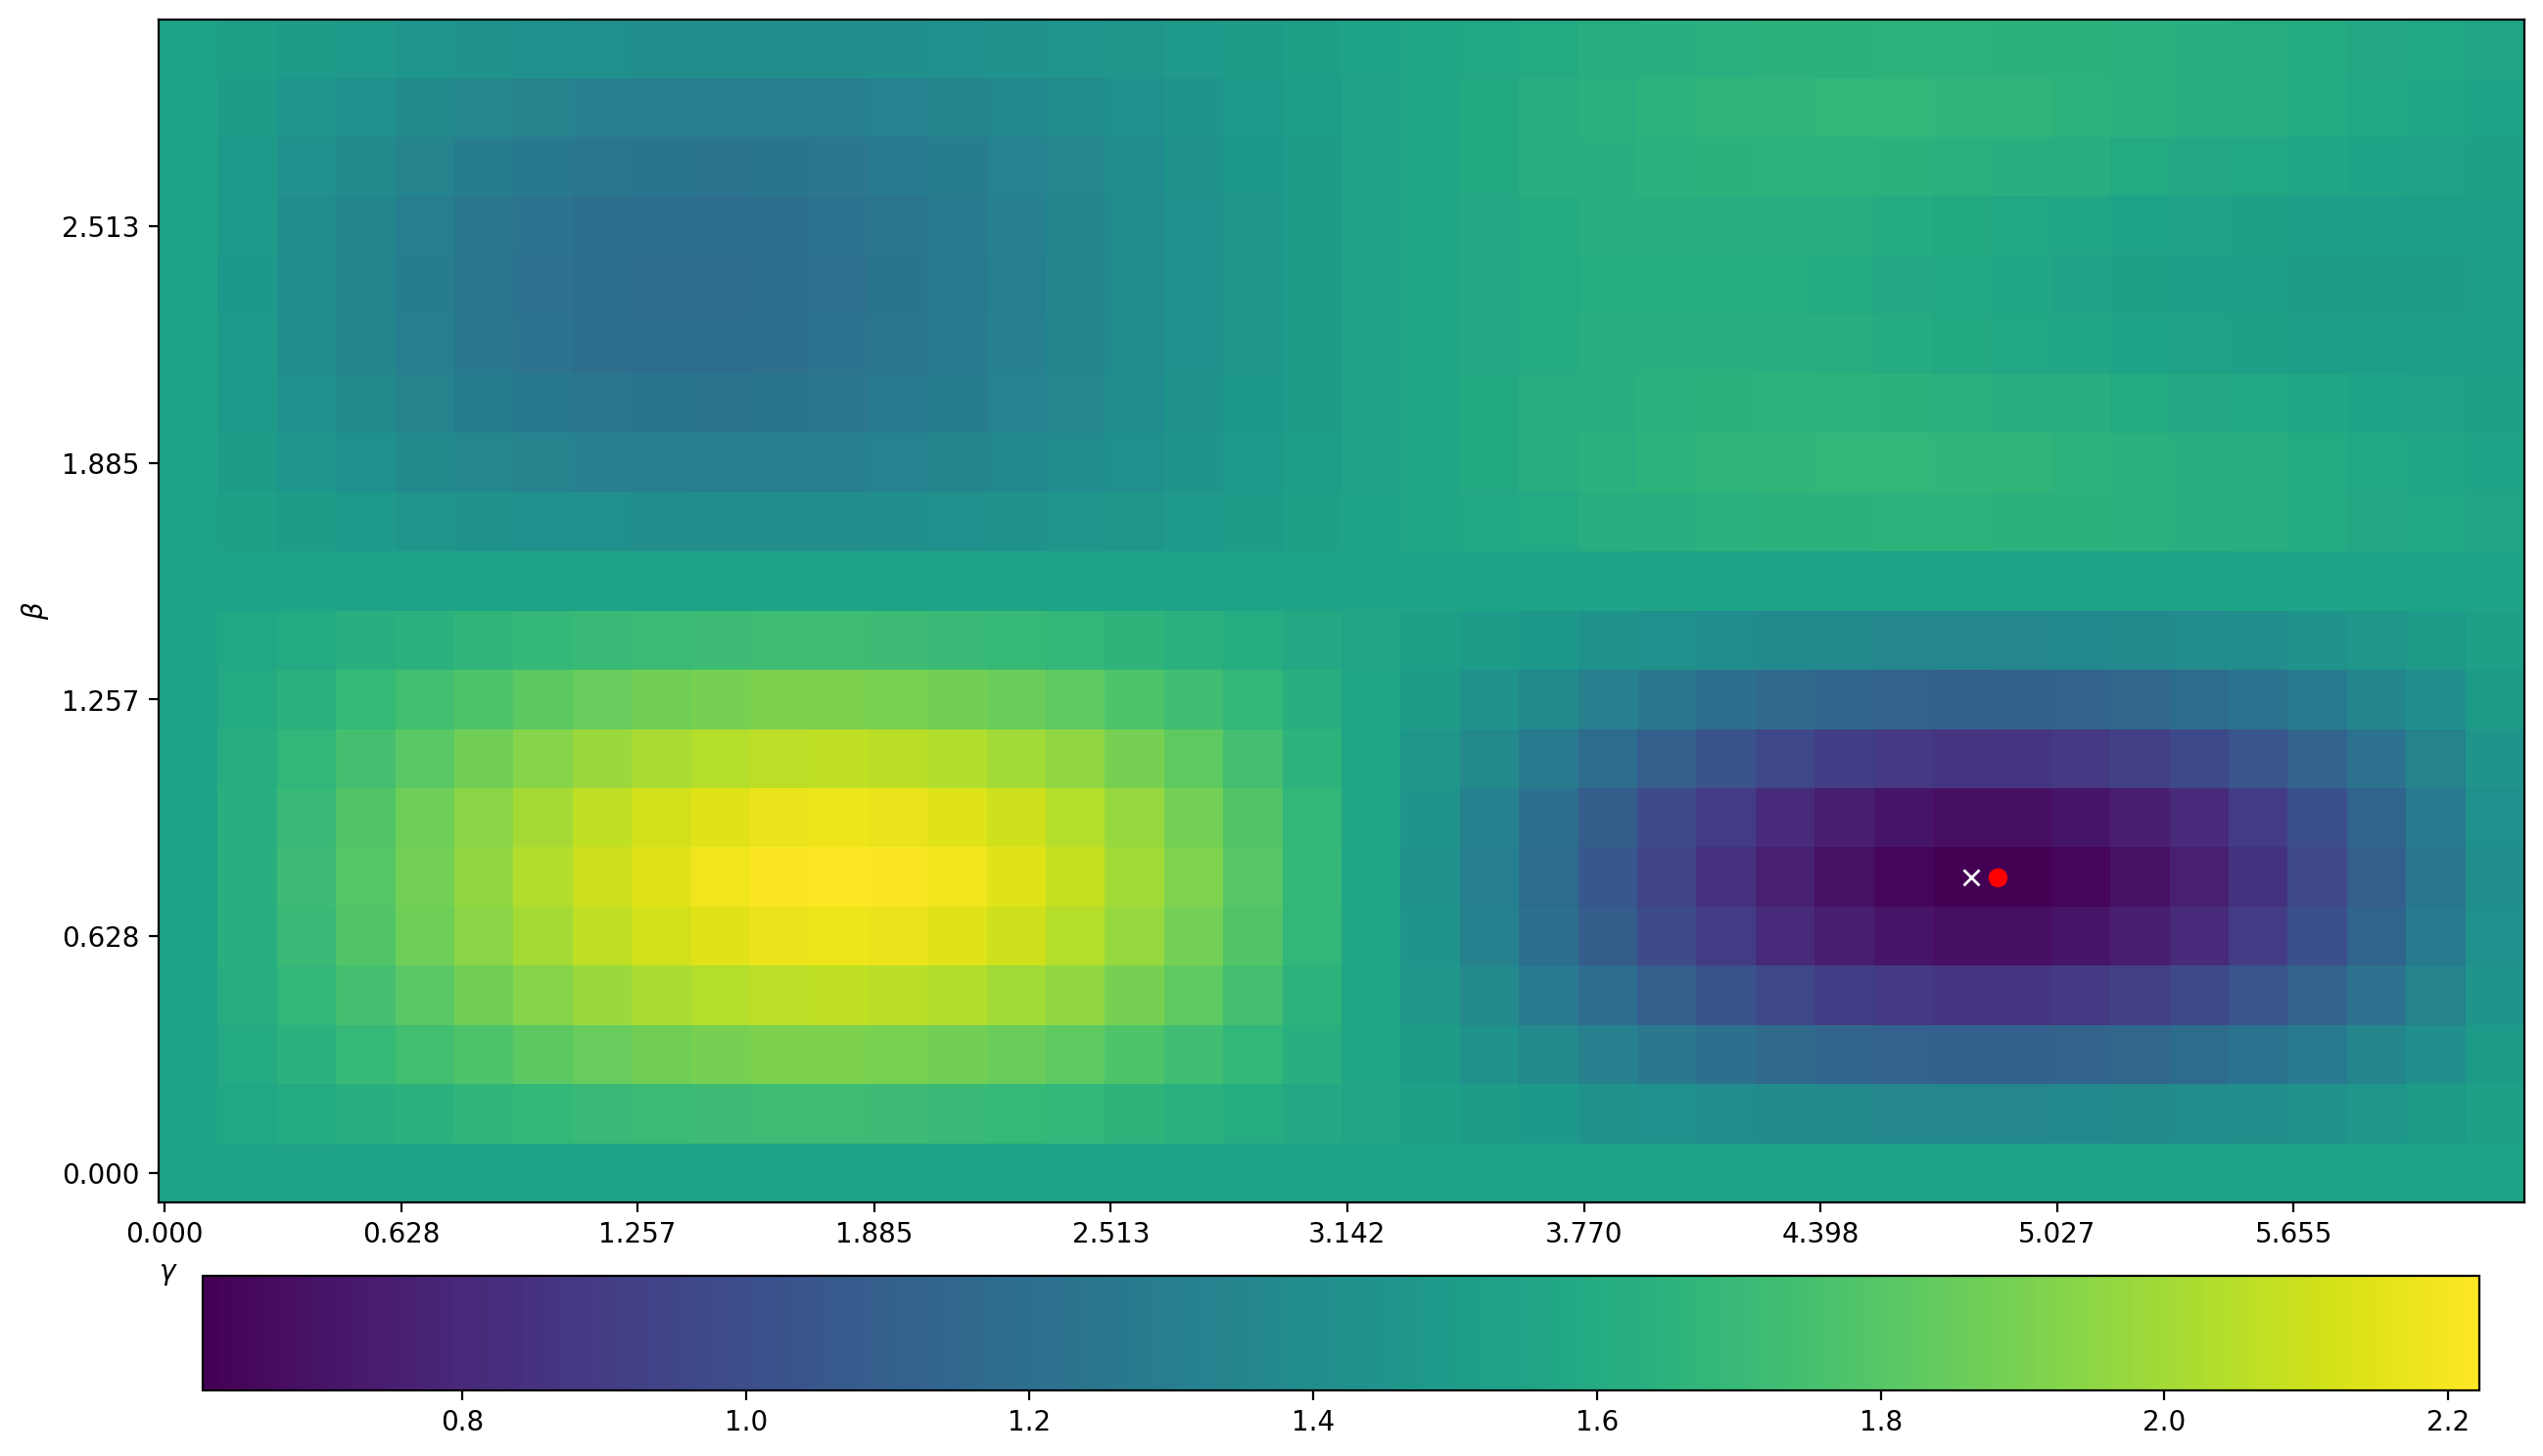

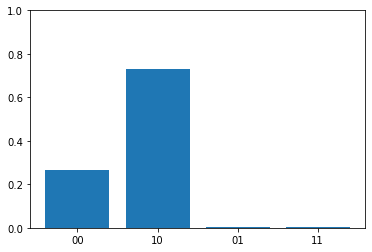

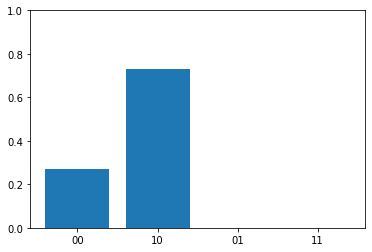

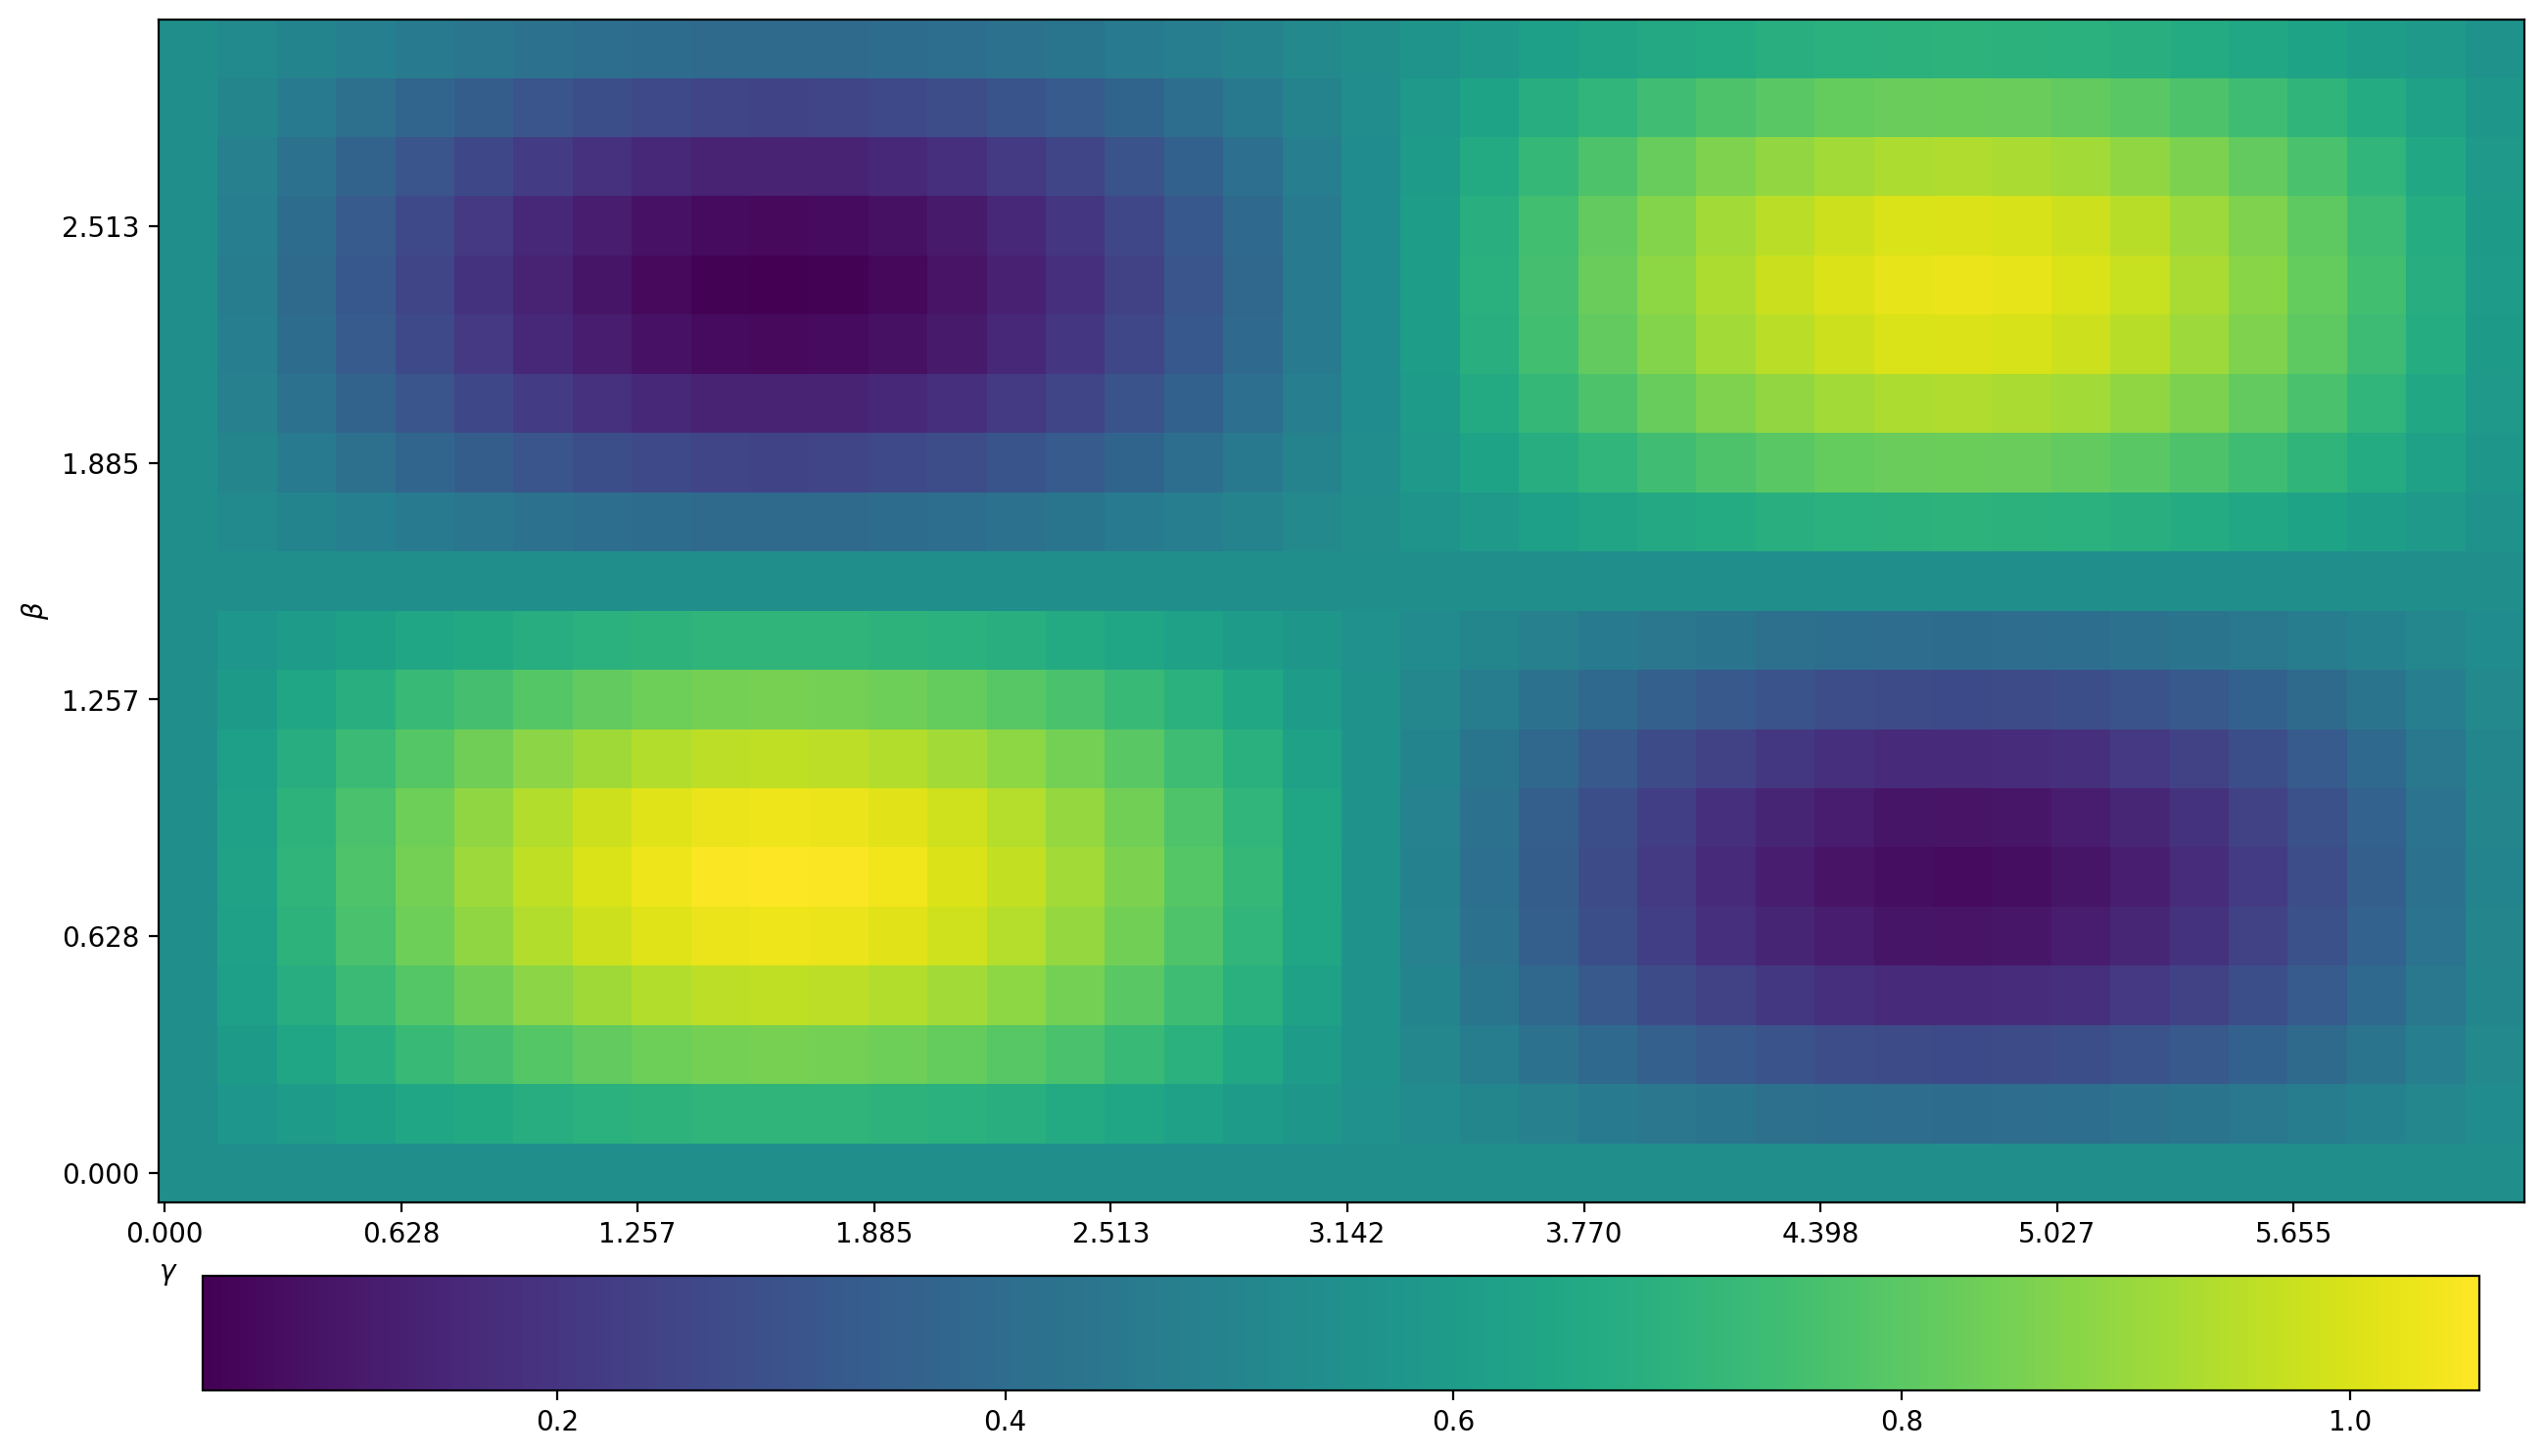

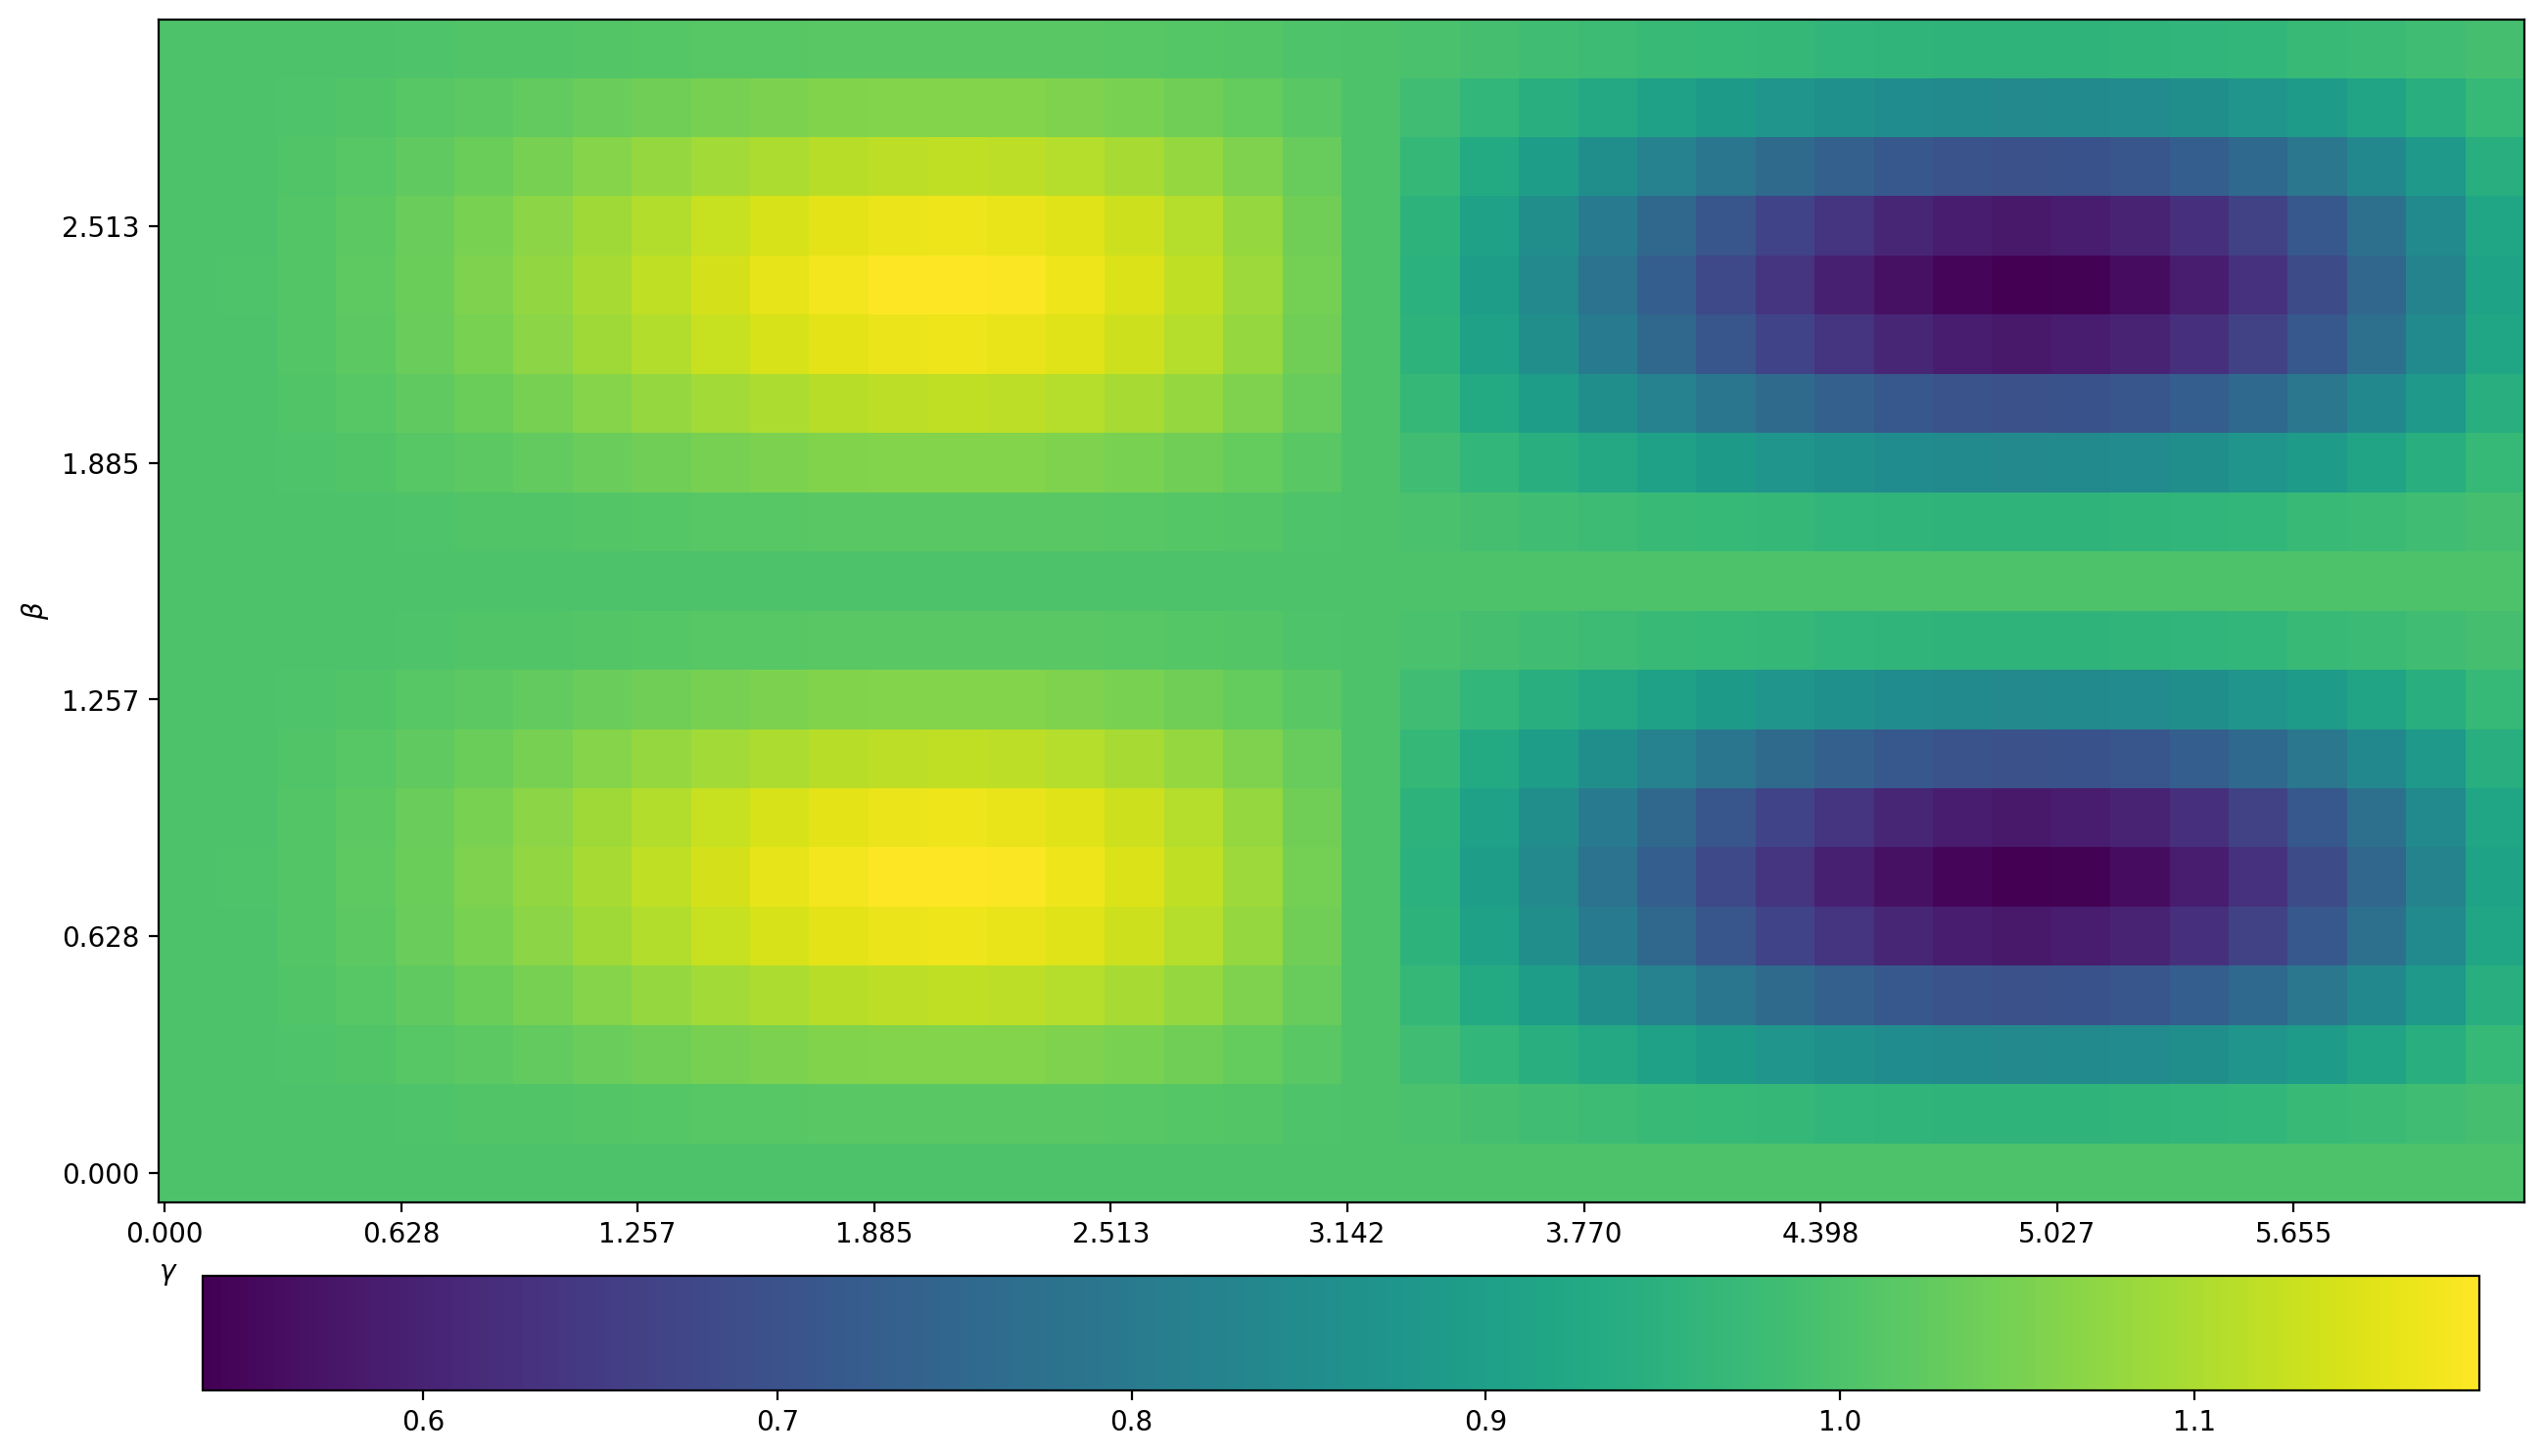

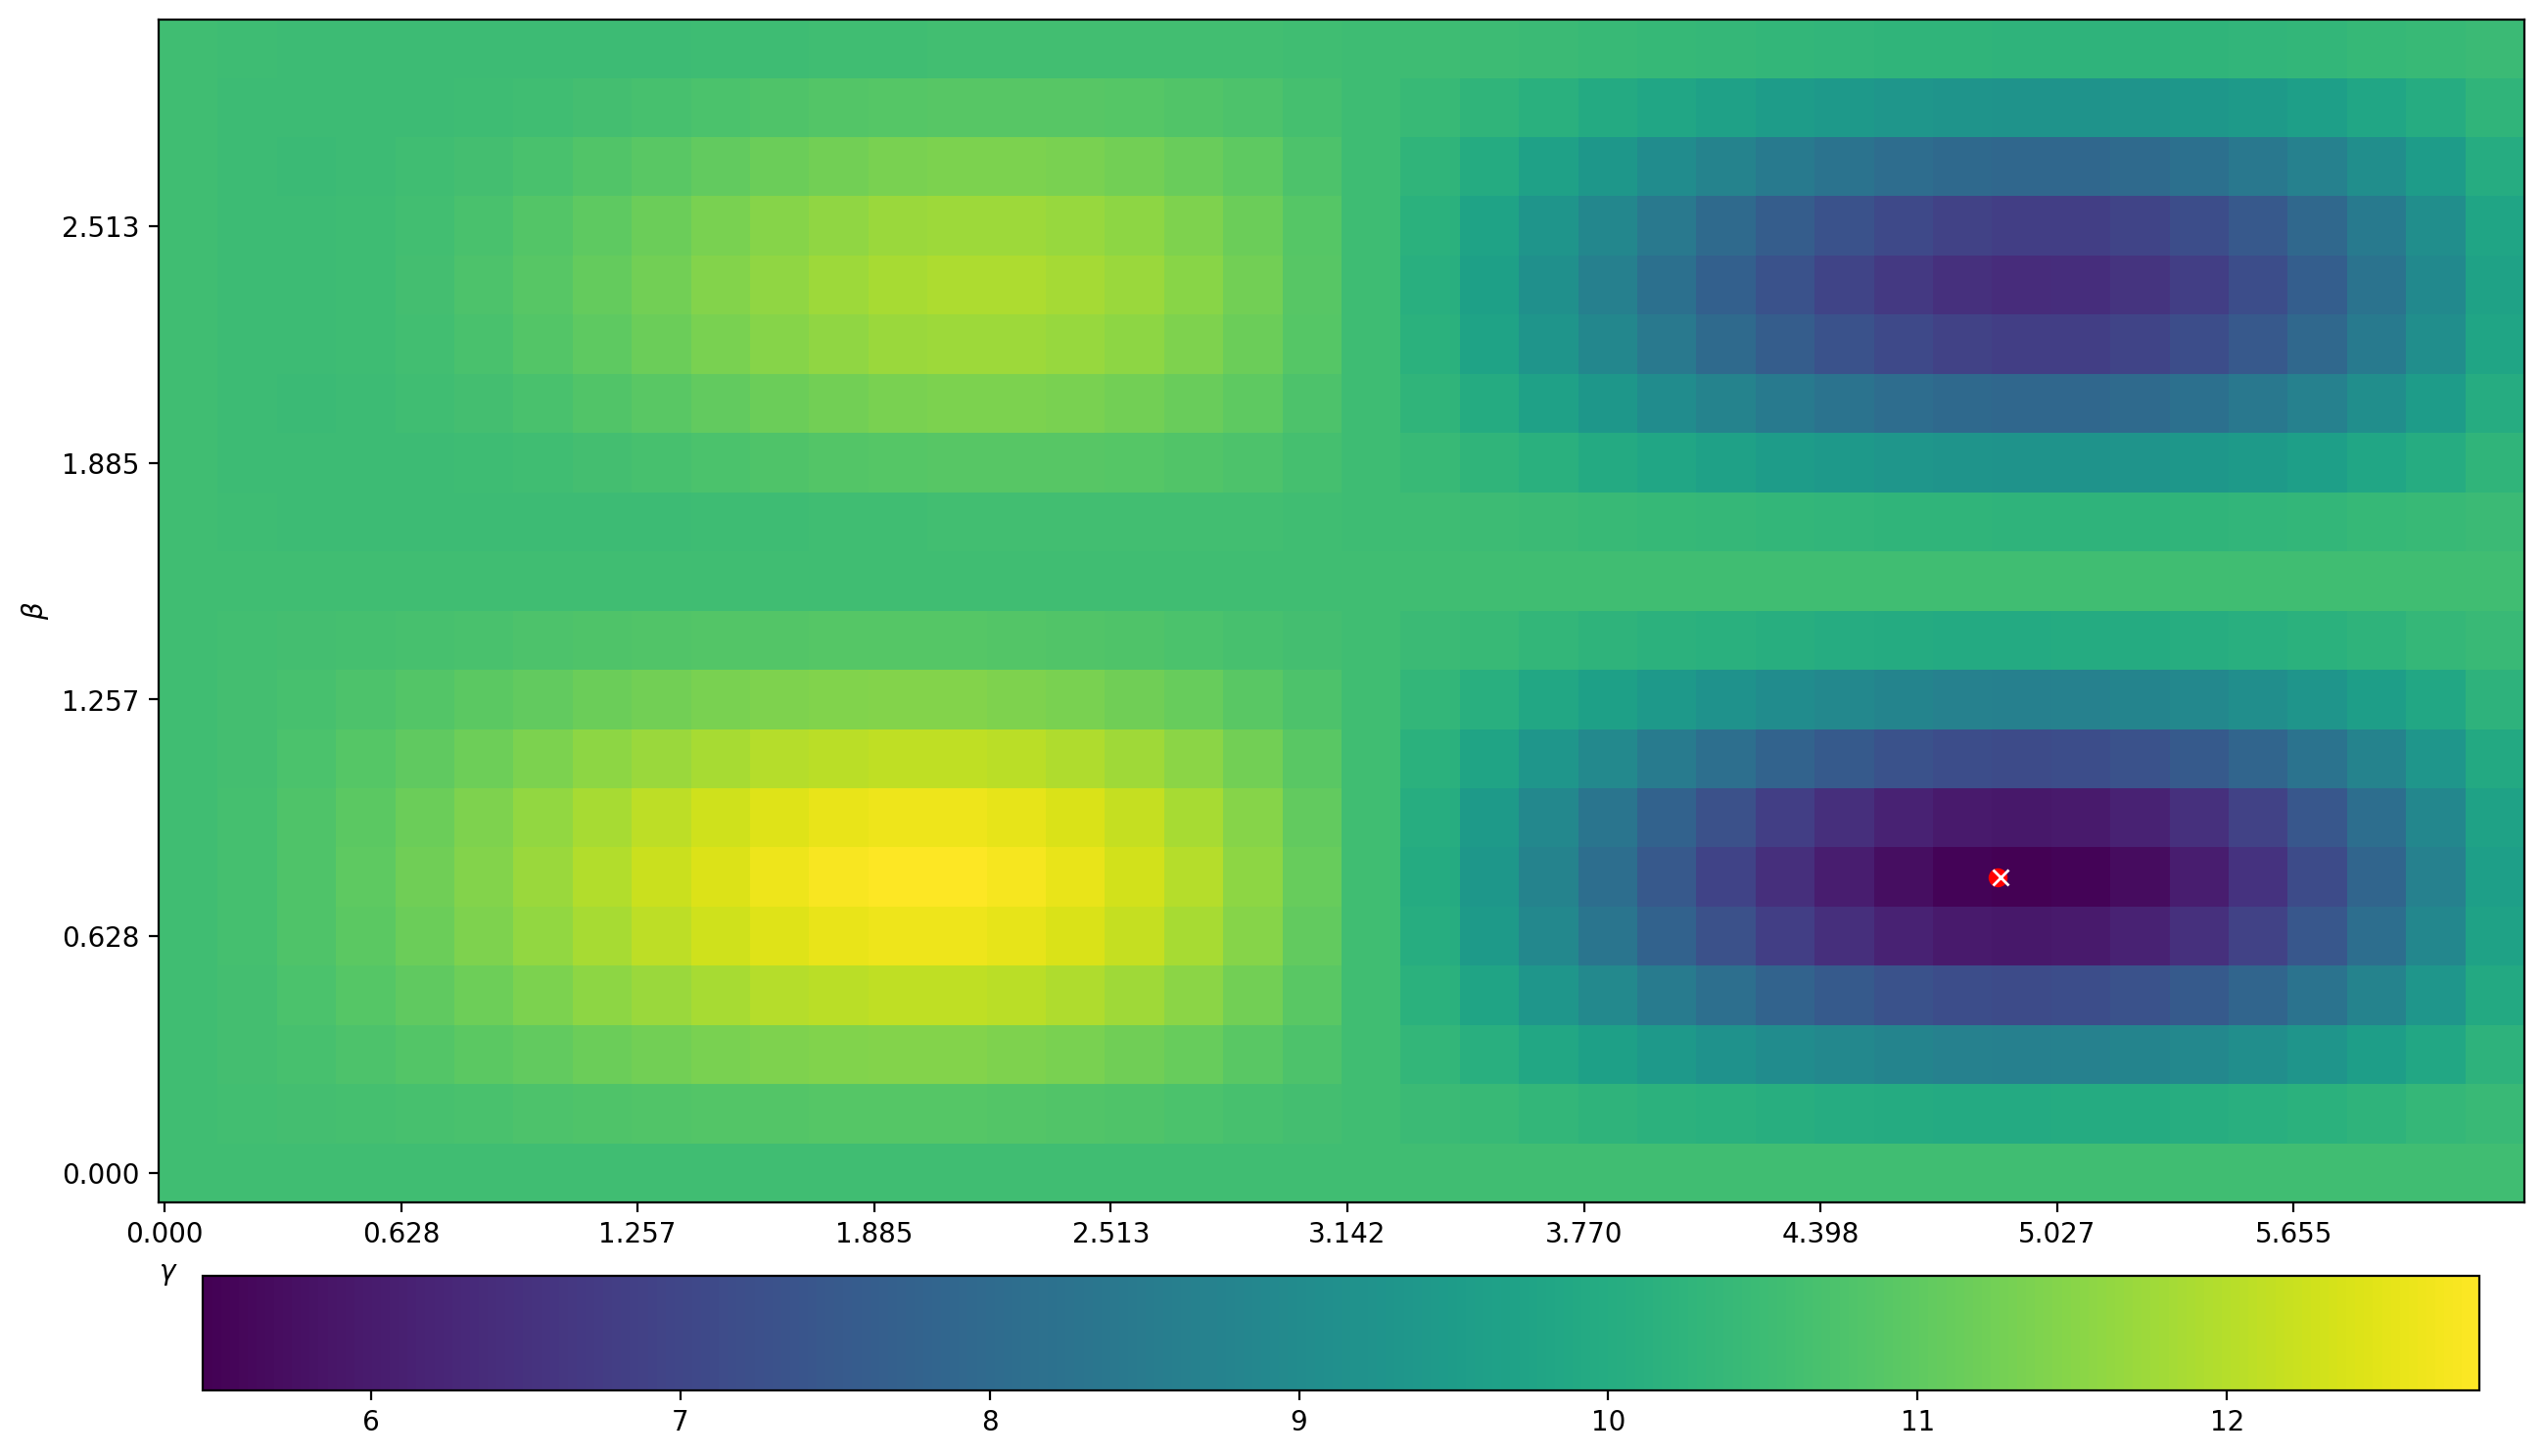

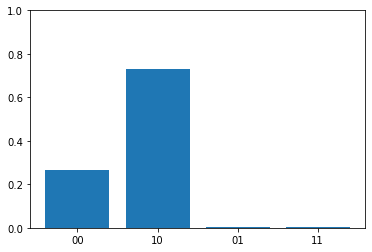

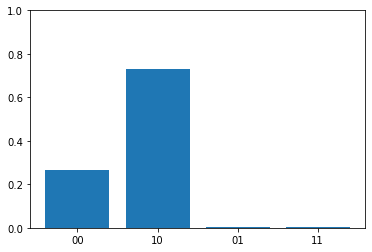

In [13]:
qaoa=QAOAChoose(CR, FR)

for ue in [True, False]:
    for mu in [0.1,0.2,1,10]:
        print("mu=",mu,"useExco=",ue)

        E, Ecost, Eexco, x0, job, ji = qaoa.getElandscape(backend,mu,useExco=[ue])
        out, job_b, xb = qaoa.getlocalmin(x0, backend, mu,useExco=[ue])

        # plot landscape
        _=getfig(Ecost,ng=m)
        # plot landscape
        _=getfig(Eexco,ng=m)
        # plot landscape
        _=getfig(E,ng=m)
        pl.plot(x0[0],x0[1],'ro')
        pl.plot(xb[0],xb[1],'wx')

        # plot histogram
        md=job.result().get_counts()[int(ji)]
        pl.figure()
        pl.bar([k[::-1] for k in md.keys()], md.values())
        pl.ylim([0,1])

        # plot histogram
        md=job_b.result().get_counts()
        pl.figure()
        pl.bar([k[::-1] for k in md.keys()], md.values())
        pl.ylim([0,1])

In [14]:
qaoa=QAOANor(CR, FR)

for mu in [0.1,0.2,1,10]:
    print("mu=",mu)
    E, Ecost, Eexco, x0, job, ji = qaoa.getElandscape(backend,mu)
    out, job_b, xb = qaoa.getlocalmin(x0, backend, mu)

    # plot histogram
    md=job.result().get_counts()[int(ji)]
    pl.figure()
    pl.bar([k[::-1] for k in md.keys()], md.values())
    pl.ylim([0,1])
    
    # plot histogram
    md=job_b.result().get_counts()
    pl.figure()
    pl.bar([k[::-1] for k in md.keys()], md.values())
    pl.ylim([0,1])

mu= 0.1


KeyboardInterrupt: 

In [ ]:
def INTERP_init(params_prev_step):
    """
    Takes the optimal parameters at level p as input and returns the optimal inital guess for
    the optimal paramteres at level p+1. Uses the INTERP formula from the paper by Zhou et. al
    :param params_prev_step: optimal parameters at level p
    :return:
    """
    print("P=",params_prev_step)
    p = params_prev_step.shape[0]
    params_out_list = np.zeros(p+1)
    params_out_list[0] = params_prev_step[0]
    for i in range(2, p + 1):
        # Next line is clunky, but written this way to accommodate the 1-indexing in the paper
        params_out_list[i - 1] = (i - 1) / p * params_prev_step[i-2] + (p - i + 1) / p * params_prev_step[i-1]
    params_out_list[p] = params_prev_step[p-1]
    return params_out_list

In [ ]:
qaoa=QAOAChoose(CR, FR)

mu=1

E, Ecost, Eexco, x0, job, ji = qaoa.getElandscape(backend,mu,useExco=[False])
out, job_b, xb = qaoa.getlocalmin(x0, backend, mu,useExco=[False])

# plot histogram
md=job_b.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])

In [ ]:
qaoa=QAOAChoose(None, FR)

mu=1

E, Ecost, Eexco, x0, job, ji = qaoa.getElandscape(backend,mu,useExco=[True])
out, job_b, xb = qaoa.getlocalmin(x0, backend, mu,useExco=[True])

# plot histogram
md=job_b.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])

In [ ]:
from qiskit.visualization import plot_state_city

sv=job_b.result().results[0].data.statevector
print(sv)
# pl.figure()
# pl.plot(np.abs(sv)**2,'x')
# print(sv)
# sv=np.array((0,1,1.1,0), dtype=complex)
# sv/=np.linalg.norm(sv,2)

plot_state_city(sv)

In [ ]:
qaoa=QAOAChoose(CR, FR)

mu=1

E, Ecost, Eexco, x0, job, ji = qaoa.getElandscape(backend,mu,useExco=[False],sv=sv, mixerbinstring='01<->10')
out, job_b, xb = qaoa.getlocalmin(x0, backend, mu,useExco=[False],sv=sv, mixerbinstring='01<->10')

# plot landscape
_=getfig(Ecost)
# plot landscape
_=getfig(Eexco)
# plot landscape
_=getfig(E)
pl.plot(x0[0],x0[1],'ro')
pl.plot(xb[0],xb[1],'wx')

# plot histogram
md=job_b.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])

In [ ]:
_=getfig(Ecost+.001*Eexco)

In [ ]:
qaoa=QAOASwe(CR, FR)

mu=0.1

E, Ecost, Eexco, x0, job, ji = qaoa.getElandscape(backend,mu,sv=sv)
out, job_b, xb = qaoa.getlocalmin(x0, backend, mu,depth=1,sv=sv)

# plot landscape
_=getfig(Ecost)
# plot landscape
_=getfig(Eexco)
# plot landscape
_=getfig(E)
pl.plot(x0[0],x0[1],'ro')
pl.plot(xb[0],xb[1],'wx')

# plot histogram
md=job_b.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])

In [ ]:
sv=job_b.result().results[0].data.statevector
plot_state_city(sv)

In [ ]:
depth=2
inter0 = INTERP_init(xb[::2])
inter1 = INTERP_init(xb[1::2])
xb_0 = np.zeros((2*depth))
xb_0[::2] = inter0
xb_0[1::2] = inter1
print(inter0)
print(inter1)

In [ ]:
out2, job_b2, xb2 = qaoa.getlocalmin(xb_0, backend, mu,useExco=[True,False])
# plot histogram
md=job_b2.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])

In [ ]:
print(xb2)

In [ ]:
qaoa=QAOASwe(CR, FR)

mu=1
E, Ecost, Eexco, x0, job, ji = qaoa.getElandscape(backend,mu)
out, job_b, xb = qaoa.getlocalmin(x0, backend, mu)

# plot histogram
md=job_b.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])

In [ ]:
depth=2
inter0 = INTERP_init(xb[::2])
inter1 = INTERP_init(xb[1::2])
xb_0 = np.zeros((2*depth))
xb_0[::2] = inter0
xb_0[1::2] = inter1
print(inter0)
print(inter1)

In [ ]:
out2, job_b2, xb2 = qaoa.getlocalmin(xb_0, backend, mu,depth=2)
# plot histogram
md=job_b2.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])